<html>
<body>
<h1 style="background-color: #022851;"><center>
    <br><font size="+3.5">
    <font color=#FFBF00><b>Introduction to Machine Learning</b></font>
   </font>
    <br><font size="+1">
    <font color=#FFBF00><b>WEEK 7 FINAL PROJECT</b></font>
   </font>
    <br><br><font size="+1">
    <font color=#FFBF00><b>&nbsp;Group Members:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</b></font>
    <br><font color=#FFBF00><b>Blue Ferdinand Alday&nbsp;&nbsp;</b></font>
    <br><font color=#FFBF00><b>Riley O'Rourke&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</b></font>
    <br><font color=#FFBF00><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Andrew Philip Richardson</b></font>
    <br>
    <br>
    <font color=#FFBF00><b>Due Date:</b>10/27/2024 </font>
   </font> 
    </center>
</h1>
</body>
</html>

# Predicting College Student Success or Dropping Out

# Project Guidelines

During this week you will have chance to work with what you have learned on a new set of data.

Step 1: Please choose set of data of your choice and build either a classification or a regression model.


Step 2: Complete a "description" of the data. This is a high level description of the dataset, just like we did in class.

Step 3: Complete an "exploration" of the data. This is an indepth exploration of the data, using plots. Just like we did in class.

Step 4:  Build two models on the data. For example, if you chose the classification dataset, build a decision tree, Naive Bayes or Random Forest .  If you chose the regression dataset, build a linear regression and a decision tree regression model.

Step 5: Evaluate the performance of the models using the metrics and diagnostics we used in class.

Step 6: Describe and interpret the model, what features did the model use select via regularization or splitting? (I realize we did not cover methods to determine which features are used in the neural network after applying regularization, so you can skip this if you build a neural network). What does the model tell us about the data? For example: Are students more likely to fail if the drink on the weekend? Do increase amounts of fly ash in concrete increase its compressive strength? (I am not asking you to answer these specific questions, these are just examples of the kinds of questions you will want to answer when describing and interpreting the model.


Grading: This will be weighted the same as a week quiz. Just apply the methods we have learned in class, with effort and understanding and you should be fine.  Use your own words and code (of course you can modify and use code form the course), I can usually tell when someone is copying a definition or pasting in code you found on stack overflow.

### Note: Comments enclosed within 3 single quote blocks are taken from the guidelines as deliverables

<html>
<body>
<h1 style="background-color: #022851;"><left>
    <br><font size="+2.5">
    <font color=#FFBF00><b>Explanation of Dataset and Machine Learning Model Objectives</b></font>
   </font>
    <br><font size="+1">
    <br>
    <font color=#FFBF00><b>1.) The dataset will be used to model and predict student academic success
    </b></font>
    <br><font size="+1">
    <font color=#FFBF00><b>2.) The dataset contains three target outcomes: Dropout, Enrolled, or Graduate</b></font>
    <br><font size="+1">
    <font color=#FFBF00><b>3.) The "Dropout" (academic failure) and "Graduate" (academic success) target outcomes will be used to train and test the Machine Learning (ML) models, as these are definite/known outcomes.</b></font>
    <br><font size="+1">
    <font color=#FFBF00><b>4.) The best (i.e. most accurate) ML model will be used to predict the future outcome of the currently "Enrolled" students.</b></font>

## Step 1: Load The Data Below

In [1]:
# Import data analysis and manipulation tools
import time
import random
import numpy as np
import pandas as pd

# Import plotting tools
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Import Sci-kit Learn tools
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Import to suppress future version warnings
import warnings

In [2]:
# Suppress future version warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
"""
Load the dataset into Jupyter notebook once group selects it
Dataset must contain at least 5 columns and few thousand rows of data
You must ask and answer at least 5 questions about the dataset
"""

# Obtain dataset from https://www.kaggle.com/datasets/syedfaizanalii/predict-students-dropout-and-academic-success/data
# For column mappings see https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
df = pd.read_csv("Predict Student Dropout and Academic Success.csv", sep=";")
df = df.reset_index(drop=True)

## Step 2: Describe The Data Below

### 2a: Basic Information about the data

In [4]:
df.shape

(4424, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime/evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nationality                                   4424 non-null   int64  
 8   Mother's_qualification                        4424 non-null   int64  
 9   Father's_qualification                        4424 non-null   i

#### Note: For detailed information regarding the column mappings, see the formal report (.docx file) submitted with this notebook via Canvas. See also the link provided above.

In [6]:
# Carefully inspect the dataset for invalid and missing data to be cleaned
df.head(20)

Marital_status  Application_mode  Application_order  Course  \
0                1                17                  5     171   
1                1                15                  1    9254   
2                1                 1                  5    9070   
3                1                17                  2    9773   
4                2                39                  1    8014   
5                2                39                  1    9991   
6                1                 1                  1    9500   
7                1                18                  4    9254   
8                1                 1                  3    9238   
9                1                 1                  1    9238   
10               1                 1                  1    9670   
11               1                 1                  1    9500   
12               1                 1                  2    9853   
13               1                53                  1    9254   
14               1                 1                  1    9085   
15               1                 1                  1    9773   
16               1                18                  1    9238   
17               1                17                  2    9500   
18               1                 1                  1    9130   
19               1                 1                  1    9853   

    Daytime/evening_attendance  Previous_qualification  \
0                            1                       1   
1                            1                       1   
2                            1                       1   
3                            1                       1   
4                            0                       1   
5                            0                      19   
6                            1                       1   
7                            1                       1   
8                            1                       1   
9                            1                       1   
10                           1                       1   
11                           1                       1   
12                           1                       1   
13                           1                      42   
14                           1                       1   
15                           1                       1   
16                           1                       1   
17                           1                       1   
18                           1                       1   
19                           1                       1   

    Previous_qualification_grade  Nationality  Mother's_qualification  \
0                          122.0            1                      19   
1                          160.0            1                       1   
2                          122.0            1                      37   
3                          122.0            1                      38   
4                          100.0            1                      37   
5                          133.1            1                      37   
6                          142.0            1                      19   
7                          119.0            1                      37   
8                          137.0           62                       1   
9                          138.0            1                       1   
10                         139.0            1                      38   
11                         136.0            1                      19   
12                         133.0            1                      19   
13                         110.0            1                       1   
14                         149.0            1                      38   
15                         127.0            1                      19   
16                         137.0            1                      19   
17                         135.0            1                  

In [7]:
# Carefully inspect the dataset for invalid types that need conversion
df.dtypes

Marital_status                                    int64
Application_mode                                  int64
Application_order                                 int64
Course                                            int64
Daytime/evening_attendance                        int64
Previous_qualification                            int64
Previous_qualification_grade                    float64
Nationality                                       int64
Mother's_qualification                            int64
Father's_qualification                            int64
Mother's_occupation                               int64
Father's_occupation                               int64
Admission_grade                                 float64
Displaced                                         int64
Educational_special_needs                         int64
Debtor                                            int64
Tuition_fees_up_to_date                           int64
Gender                                          

In [8]:
df.describe()

Marital_status  Application_mode  Application_order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening_attendance  Previous_qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                      1.000000                1.000000   
50%                      1.000000                1.000000   
75%                      1.000000                1.000000   
max                      1.000000               43.000000   

       Previous_qualification_grade  Nationality  Mother's_qualification  \
count                   4424.000000  4424.000000             4424.000000   
mean                     132.613314     1.873192               19.561935   
std                       13.188332     6.914514               15.603186   
min                       95.000000     1.000000                1.000000   
25%                      125.000000     1.000000                2.000000   
50%                      133.100000     1.000000               19.000000   
75%                      140.000000     1.000000               37.000000   
max                      190.000000   109.000000               44.000000   

       Father's_qualification  ...  \
count             4424.000000  ...   
mean                22.275316  ...   
std                 15.343108  ...   
min                  1.000000  ...   
25%                  3.000000  ...   
50%                 19.000000  ...   
75%                 37.000000  ...   
max                 44.000000  ...   

       Curricular_units_1st_sem_without_evaluations  \
count                                   4424.000000   
mean                                       0.137658   
std                                        0.690880   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.000000   
max                                       12.000000   

       Curricular_units_2nd_sem_credited  Curricular_units_2nd_sem_enrolled  \
count                        4424.000000                        4424.000000   
mean                            0.541817                           6.232143   
std                             1.918546                           2.195951   
min                             0.000000                           0.000000   
25%                             0.000000                           5.000000   
50%                             0.000000                           6.000000   
75%                             0.000000                           7.000000   
max                            19.000000                          23.000000   

       Curricular_units_2nd_sem_evaluations  \
count                           4424.000000   
mean                               8.063291   
std                                3.947951   
min                                0.000000   
25%                                6.000000   
50%                                8.000000   
75%                               10.000000   
max                               33.000000   

       Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
count                        4424.000000     

#### Note: Since most data here is categorical, some of the statistical data doesn't have much value. However, there is value in observing numerical data stats for certain columns, such as Unemployment Rate, Inflation Rate, and GDP.

### Making a dictionary of the unique value counts for each column:

In [9]:
# Save column values into variable "column_titles"
column_titles = list(df.columns.values)

# Implement for loop to create a list of unique values for each column
unique_data_pts = []
for i in range(len(column_titles)):
    unique_data_pts.append(df[column_titles[i]].nunique())

# Zip lists together in dictionary
make_dict = dict(zip(column_titles, unique_data_pts))

print(
    f"The following dictionary contains the # of unique values mapped to each column header:\n\n {make_dict}"
)

The following dictionary contains the # of unique values mapped to each column header:

 {'Marital_status': 6, 'Application_mode': 18, 'Application_order': 8, 'Course': 17, 'Daytime/evening_attendance': 2, 'Previous_qualification': 17, 'Previous_qualification_grade': 101, 'Nationality': 21, "Mother's_qualification": 29, "Father's_qualification": 34, "Mother's_occupation": 32, "Father's_occupation": 46, 'Admission_grade': 620, 'Displaced': 2, 'Educational_special_needs': 2, 'Debtor': 2, 'Tuition_fees_up_to_date': 2, 'Gender': 2, 'Scholarship_holder': 2, 'Age_at_enrollment': 46, 'International': 2, 'Curricular_units_1st_sem_credited': 21, 'Curricular_units_1st_sem_enrolled': 23, 'Curricular_units_1st_sem_evaluations': 35, 'Curricular_units_1st_sem_approved': 23, 'Curricular_units_1st_sem_grade': 805, 'Curricular_units_1st_sem_without_evaluations': 11, 'Curricular_units_2nd_sem_credited': 19, 'Curricular_units_2nd_sem_enrolled': 22, 'Curricular_units_2nd_sem_evaluations': 30, 'Curricular_

### Next step: Properly encode "Target" values:

In [10]:
# Save unique 'Target' values into a variable
target = df["Target"].unique()

# Encode target values
le = LabelEncoder()
target_encoded = le.fit_transform(target)

# Store encoding target "codex" in dictionary and return dictionary
target_encoded_dict = dict(zip(target, target_encoded))
print(f"Target values encoded: {target_encoded_dict}")

Target values encoded: {'Dropout': 0, 'Graduate': 2, 'Enrolled': 1}


### Modify DataFrame w/ encoded target values

In [11]:
# Replace "Target" values w/ "Target_encoded" values
df["Target"].replace(to_replace=target_encoded_dict, inplace=True)

# Return df to view updated df
df.head(20)

Marital_status  Application_mode  Application_order  Course  \
0                1                17                  5     171   
1                1                15                  1    9254   
2                1                 1                  5    9070   
3                1                17                  2    9773   
4                2                39                  1    8014   
5                2                39                  1    9991   
6                1                 1                  1    9500   
7                1                18                  4    9254   
8                1                 1                  3    9238   
9                1                 1                  1    9238   
10               1                 1                  1    9670   
11               1                 1                  1    9500   
12               1                 1                  2    9853   
13               1                53                  1    9254   
14               1                 1                  1    9085   
15               1                 1                  1    9773   
16               1                18                  1    9238   
17               1                17                  2    9500   
18               1                 1                  1    9130   
19               1                 1                  1    9853   

    Daytime/evening_attendance  Previous_qualification  \
0                            1                       1   
1                            1                       1   
2                            1                       1   
3                            1                       1   
4                            0                       1   
5                            0                      19   
6                            1                       1   
7                            1                       1   
8                            1                       1   
9                            1                       1   
10                           1                       1   
11                           1                       1   
12                           1                       1   
13                           1                      42   
14                           1                       1   
15                           1                       1   
16                           1                       1   
17                           1                       1   
18                           1                       1   
19                           1                       1   

    Previous_qualification_grade  Nationality  Mother's_qualification  \
0                          122.0            1                      19   
1                          160.0            1                       1   
2                          122.0            1                      37   
3                          122.0            1                      38   
4                          100.0            1                      37   
5                          133.1            1                      37   
6                          142.0            1                      19   
7                          119.0            1                      37   
8                          137.0           62                       1   
9                          138.0            1                       1   
10                         139.0            1                      38   
11                         136.0            1                      19   
12                         133.0            1                      19   
13                         110.0            1                       1   
14                         149.0            1                      38   
15                         127.0            1                      19   
16                         137.0            1                      19   
17                         135.0            1                  

# 5 Questions about the dataset:
+ How is Marital status correlated with success rates?
+ How does an international student correlate with success rates?
+ How are the parents' qualifications correlated with success rates?
+ How unemployment rate correlated with success rates?
+ How are the parents' occupations correlated with success rates?

### 2b: Data Cleaning
Handling missing, incorrect and invalid data

In [12]:
# Check for null values in dataset
df.isnull().values.any()

False

In [13]:
# Check for null values in dataset
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime/evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nationality                                     0
Mother's_qualification                          0
Father's_qualification                          0
Mother's_occupation                             0
Father's_occupation                             0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [14]:
# Check for class imbalance
df["Target"].value_counts(normalize=True)

2    0.499322
0    0.321203
1    0.179476
Name: Target, dtype: float64

In [15]:
# Check for class imbalance
df["Target"].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

In [16]:
# Show correlation of original dataset via a correlation matrix
df.corr()

Marital_status  \
Marital_status                                      1.000000   
Application_mode                                    0.264006   
Application_order                                  -0.125854   
Course                                              0.046365   
Daytime/evening_attendance                         -0.274939   
Previous_qualification                              0.062529   
Previous_qualification_grade                       -0.022406   
Nationality                                        -0.008843   
Mother's_qualification                              0.193163   
Father's_qualification                              0.130353   
Mother's_occupation                                 0.034994   
Father's_occupation                                 0.031609   
Admission_grade                                    -0.004771   
Displaced                                          -0.234886   
Educational_special_needs                          -0.028343   
Debtor                                              0.034304   
Tuition_fees_up_to_date                            -0.087158   
Gender                                             -0.014738   
Scholarship_holder                                 -0.053765   
Age_at_enrollment                                   0.522717   
International                                      -0.027905   
Curricular_units_1st_sem_credited                   0.061209   
Curricular_units_1st_sem_enrolled                   0.052107   
Curricular_units_1st_sem_evaluations                0.058030   
Curricular_units_1st_sem_approved                  -0.031027   
Curricular_units_1st_sem_grade                     -0.059811   
Curricular_units_1st_sem_without_evaluations        0.034711   
Curricular_units_2nd_sem_credited                   0.062831   
Curricular_units_2nd_sem_enrolled                   0.039026   
Curricular_units_2nd_sem_evaluations                0.022784   
Curricular_units_2nd_sem_approved                  -0.043739   
Curricular_units_2nd_sem_grade                     -0.071506   
Curricular_units_2nd_sem_without_evaluations        0.020426   
Unemployment rate                                  -0.020338   
Inflation rate                                      0.008761   
GDP                                                -0.027003   
Target                                             -0.089804   

                                              Application_mode  \
Marital_status                                        0.264006   
Application_mode                                      1.000000   
Application_order                                    -0.286357   
Course                                                0.065385   
Daytime/evening_attendance                           -0.304092   
Previous_qualification                                0.422411   
Previous_qualification_grade                         -0.039020   
Nationality                                          -0.000661   
Mother's_qualification                                0.118974   
Father's_qualification                                0.083276   
Mother's_occupation                                   0.051600   
Father's_occupation                                   0.036707   
Admission_grade                                      -0.013271   
Displaced                                            -0.301197   
Educational_special_needs                            -0.030779   
Debtor                                                0.122818   
Tuition_fees_up_to_date                              -0.136262   
Gender                                                0.160130   
Scholarship_holder                                   -0.163117   
Age_at_enrollment                                     0.516243   
International                                         0.003438   
Curricular_units_1st_sem_credited                     0.247426   
Curricular_units_1st_sem_enrolled                     0.164299   
Curricular_units_1st_sem_eval

### 2c: Data reduction and feature engineering
Perform any additional steps (parsing dates, feature engineering, create additional columns etc.)

In [17]:
# In the following cell, we are dropping the "enrolled" students from the dataset.
# However, we want to keep this data for later so that we can predict their success rate w/ our best trained model.

# Therefore, store enrolled students into df_enrolled for later
df_enrolled = df[df["Target"] == 1]

In [18]:
# Remove the enrolled students from the dataset and make predictions against Graduated or Dropped Out only
# This step reduces the target data to a binomial (vice trinomial) distribution
df = df.drop(df[df["Target"] == 1].index)

#### Note: Here we are dropping the "enrolled" target category, but we use it later during the model prediction stage.

In [19]:
# Use eigenvalues to remove highly correlated features
# The lower the value, the higher the multicollinearity
# Values >= 1 have low multicollinearity

eigenvalues = np.linalg.eigvals(df.corr())
eigenvalues

array([6.66217637, 3.99867016, 2.16269709, 1.95058556, 1.9075628 ,
       1.69528131, 1.57215194, 1.52920311, 1.31601086, 1.24000103,
       1.13190541, 1.00288261, 0.98828172, 0.91696845, 0.86330656,
       0.84111877, 0.7801035 , 0.72582822, 0.666201  , 0.01994503,
       0.03004415, 0.07563629, 0.08507669, 0.11114273, 0.14837043,
       0.1763163 , 0.19718194, 0.22185058, 0.57104934, 0.56666599,
       0.51490892, 0.30698872, 0.32304919, 0.46053329, 0.44429126,
       0.41357046, 0.38244223])

In [20]:
# Create a dataset for features that have at least .78 eigenvalues, to be evaluated for each of the 5 questions
df_eigenvalues = df.iloc[:, :17]
df_eigenvalues

Marital_status  Application_mode  Application_order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening_attendance  Previous_qualification  \
0                              1                       1   
1                              1                       1   
2                              1                       1   
3                              1                       1   
4                              0                       1   
...                          ...                     ...   
4419                           1                       1   
4420                           1                       1   
4421                           1                       1   
4422                           1                       1   
4423                           1                       1   

      Previous_qualification_grade  Nationality  Mother's_qualification  \
0                            122.0            1                      19   
1                            160.0            1                       1   
2                            122.0            1                      37   
3                            122.0            1                      38   
4                            100.0            1                      37   
...                            ...          ...                     ...   
4419                         125.0            1                       1   
4420                         120.0          105                       1   
4421                         154.0            1                      37   
4422                         180.0            1                      37   
4423                         152.0           22                      38   

      Father's_qualification  Mother's_occupation  Father's_occupation  \
0                         12                    5                    9   
1                          3                    3                    3   
2                         37                    9                    9   
3                         37                    5                    3   
4                         38                    9                    9   
...                      ...                  ...                  ...   
4419                       1                    5                    4   
4420                       1                    9                    9   
4421                      37                    9                    9   
4422                      37                    7                    4   
4423                      37                    5                    9   

      Admission_grade  Displaced  Educational_special_needs  Debtor  \
0               127.3          1                          0       0   
1               142.5          1                          0       0   
2               124.8          1                          0       0   
3               119.6          1                          0       0   
4               141.5          0                          0       0   
...               ...        ...                        ...     ...   
4419            122.2          0                          0       0   
4420            119.0          1                          0       1   
4421            149.5      

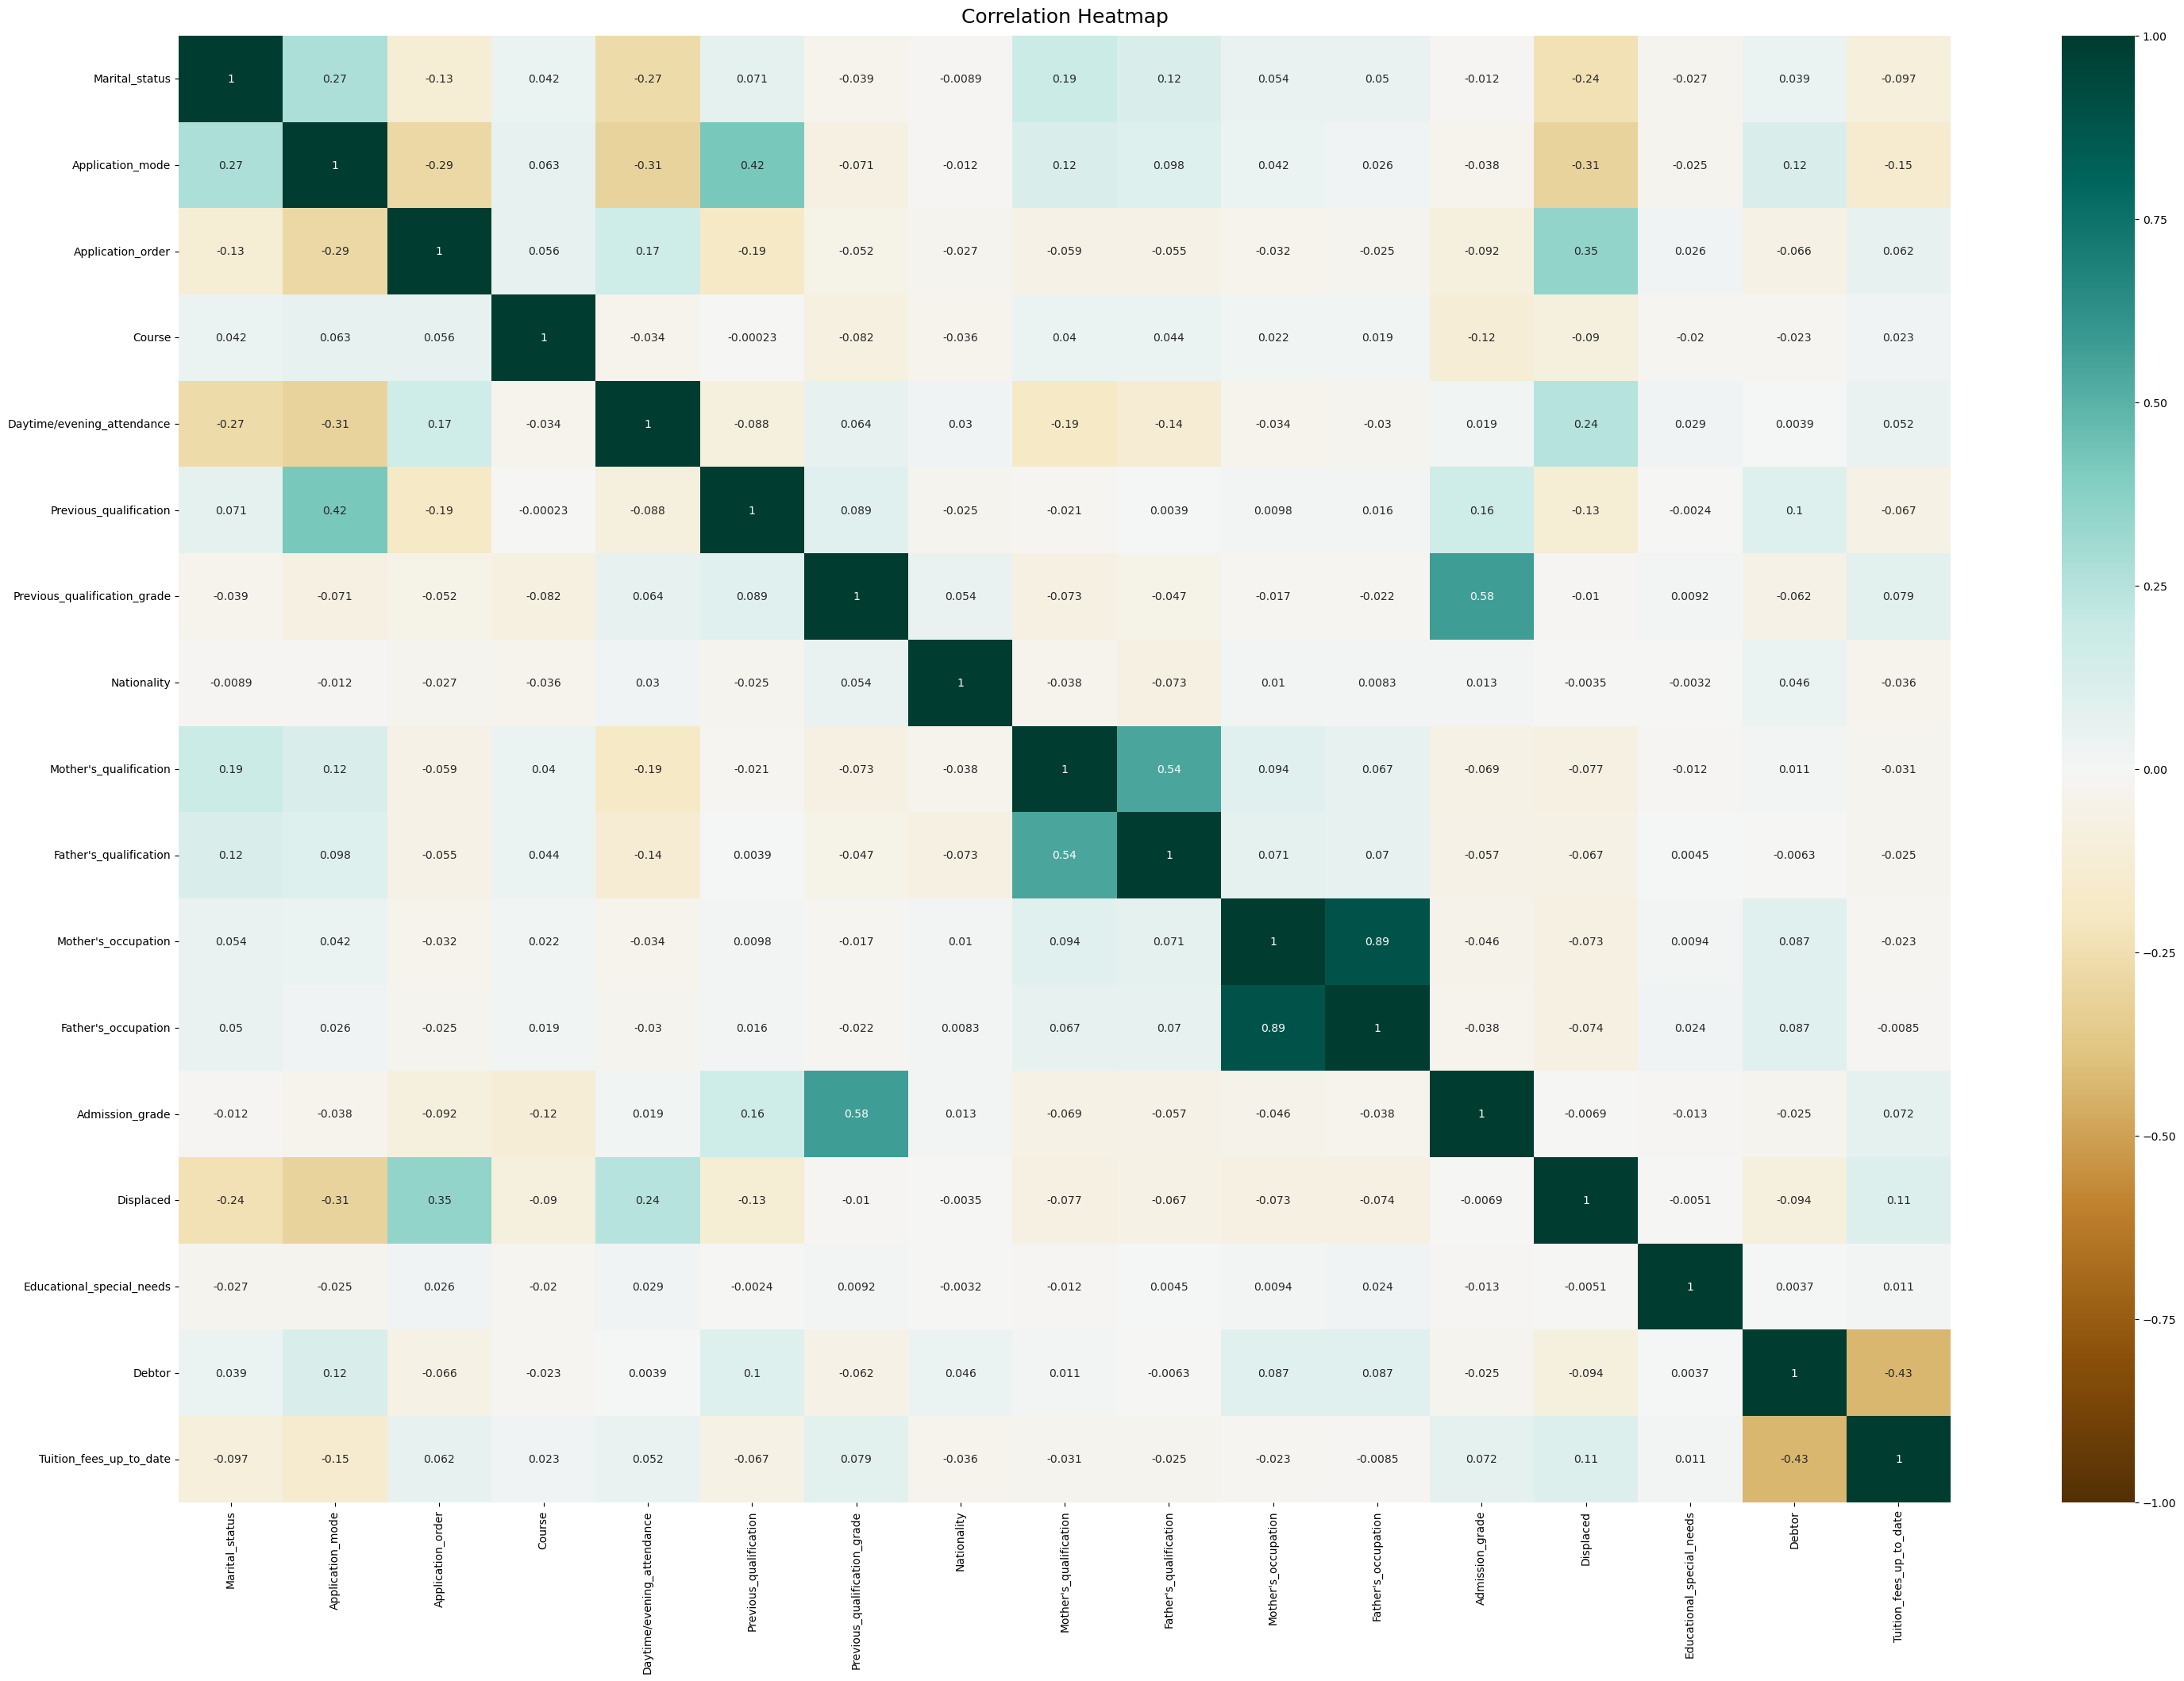

In [21]:
# Create a heatmap visualization for the eigenvalue correlation data
plt.figure(figsize=(36, 24))
heatmap = sns.heatmap(
    df_eigenvalues.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap="BrBG"
)
heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 18}, pad=12);

### For each of the 5 questions and associated DataFrame columns, analyze and remove highly correlated data:

### 1.) Marital Status

In [22]:
# Check for correlations
df_eigenvalues[df_eigenvalues.columns[:]].corr(numeric_only=True)["Marital_status"][
    :
].sort_values(ascending=False)

Marital_status                  1.000000
Application_mode                0.274985
Mother's_qualification          0.185117
Father's_qualification          0.124995
Previous_qualification          0.070984
Mother's_occupation             0.053892
Father's_occupation             0.050499
Course                          0.042012
Debtor                          0.039470
Nationality                    -0.008899
Admission_grade                -0.012440
Educational_special_needs      -0.027434
Previous_qualification_grade   -0.038869
Tuition_fees_up_to_date        -0.096920
Application_order              -0.130370
Displaced                      -0.240544
Daytime/evening_attendance     -0.265823
Name: Marital_status, dtype: float64

In [23]:
# Since there are no highly correlated values, make a copy of the subset as is and add target column back in the DataFrame
df_marital_status_correlation = pd.concat(
    [df_eigenvalues, df["Target"].rename("Target")], axis=1
)
df_marital_status_correlation[df_marital_status_correlation.columns[:]].corr(
    numeric_only=True
)["Marital_status"][:].sort_values(ascending=False)

Marital_status                  1.000000
Application_mode                0.274985
Mother's_qualification          0.185117
Father's_qualification          0.124995
Previous_qualification          0.070984
Mother's_occupation             0.053892
Father's_occupation             0.050499
Course                          0.042012
Debtor                          0.039470
Nationality                    -0.008899
Admission_grade                -0.012440
Educational_special_needs      -0.027434
Previous_qualification_grade   -0.038869
Tuition_fees_up_to_date        -0.096920
Target                         -0.100479
Application_order              -0.130370
Displaced                      -0.240544
Daytime/evening_attendance     -0.265823
Name: Marital_status, dtype: float64

### 2.) International

In [24]:
# Check for correlations
df_international_correlation = pd.concat(
    [df_eigenvalues, df["International"].rename("International")], axis=1
)
df_international_correlation[df_international_correlation.columns[:]].corr(
    numeric_only=True
)["International"][:].sort_values(ascending=False)

International                   1.000000
Nationality                     0.797387
Debtor                          0.069682
Previous_qualification_grade    0.055494
Daytime/evening_attendance      0.032494
Admission_grade                 0.024341
Mother's_occupation             0.004125
Educational_special_needs       0.000908
Displaced                      -0.000790
Father's_occupation            -0.001078
Application_mode               -0.004620
Mother's_qualification         -0.020669
Previous_qualification         -0.023995
Course                         -0.024819
Marital_status                 -0.026153
Application_order              -0.030576
Tuition_fees_up_to_date        -0.055777
Father's_qualification         -0.069160
Name: International, dtype: float64

In [25]:
# Drop highly correlated features for International and add Target column back in the DataFrame
df_international_correlation = df_international_correlation.drop(
    ["Nationality"], axis=1
)
df_international_correlation = pd.concat(
    [df_international_correlation, df["Target"].rename("Target")], axis=1
)

df_international_correlation

Marital_status  Application_mode  Application_order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening_attendance  Previous_qualification  \
0                              1                       1   
1                              1                       1   
2                              1                       1   
3                              1                       1   
4                              0                       1   
...                          ...                     ...   
4419                           1                       1   
4420                           1                       1   
4421                           1                       1   
4422                           1                       1   
4423                           1                       1   

      Previous_qualification_grade  Mother's_qualification  \
0                            122.0                      19   
1                            160.0                       1   
2                            122.0                      37   
3                            122.0                      38   
4                            100.0                      37   
...                            ...                     ...   
4419                         125.0                       1   
4420                         120.0                       1   
4421                         154.0                      37   
4422                         180.0                      37   
4423                         152.0                      38   

      Father's_qualification  Mother's_occupation  Father's_occupation  \
0                         12                    5                    9   
1                          3                    3                    3   
2                         37                    9                    9   
3                         37                    5                    3   
4                         38                    9                    9   
...                      ...                  ...                  ...   
4419                       1                    5                    4   
4420                       1                    9                    9   
4421                      37                    9                    9   
4422                      37                    7                    4   
4423                      37                    5                    9   

      Admission_grade  Displaced  Educational_special_needs  Debtor  \
0               127.3          1                          0       0   
1               142.5          1                          0       0   
2               124.8          1                          0       0   
3               119.6          1                          0       0   
4               141.5          0                          0       0   
...               ...        ...                        ...     ...   
4419            122.2          0                          0       0   
4420            119.0          1                          0       1   
4421            149.5          1                          0       0   
4422            153.8          1                          0       0   
4423            152.0          1         

### 3.) Father/Mother's Qualifications

In [26]:
# Check for correlations - Mother's Qualifications
df_eigenvalues[df_eigenvalues.columns[:]].corr(numeric_only=True)[
    "Mother's_qualification"
][:].sort_values(ascending=False)

Mother's_qualification          1.000000
Father's_qualification          0.543890
Marital_status                  0.185117
Application_mode                0.122697
Mother's_occupation             0.093654
Father's_occupation             0.067471
Course                          0.039976
Debtor                          0.011229
Educational_special_needs      -0.011930
Previous_qualification         -0.021399
Tuition_fees_up_to_date        -0.031185
Nationality                    -0.038168
Application_order              -0.058649
Admission_grade                -0.068855
Previous_qualification_grade   -0.073035
Displaced                      -0.077115
Daytime/evening_attendance     -0.188876
Name: Mother's_qualification, dtype: float64

In [27]:
# Check for correlations - Father's Qualifications
df_eigenvalues[df_eigenvalues.columns[:]].corr(numeric_only=True)[
    "Father's_qualification"
][:].sort_values(ascending=False)

Father's_qualification          1.000000
Mother's_qualification          0.543890
Marital_status                  0.124995
Application_mode                0.098216
Mother's_occupation             0.070684
Father's_occupation             0.069976
Course                          0.043931
Educational_special_needs       0.004516
Previous_qualification          0.003865
Debtor                         -0.006253
Tuition_fees_up_to_date        -0.024534
Previous_qualification_grade   -0.047147
Application_order              -0.055254
Admission_grade                -0.057358
Displaced                      -0.066561
Nationality                    -0.073033
Daytime/evening_attendance     -0.135725
Name: Father's_qualification, dtype: float64

In [28]:
# Parents' qualifications have exact correlations of 0.534140 so selcting the Father's qualification and adding Target column back in
df_parent_qualifications_correlation = pd.concat(
    [df_eigenvalues, df["Target"].rename("Target")], axis=1
)
df_parent_qualifications_correlation[
    df_parent_qualifications_correlation.columns[:]
].corr(numeric_only=True)["Father's_qualification"][:].sort_values(ascending=False)

Father's_qualification          1.000000
Mother's_qualification          0.543890
Marital_status                  0.124995
Application_mode                0.098216
Mother's_occupation             0.070684
Father's_occupation             0.069976
Course                          0.043931
Educational_special_needs       0.004516
Previous_qualification          0.003865
Target                         -0.005865
Debtor                         -0.006253
Tuition_fees_up_to_date        -0.024534
Previous_qualification_grade   -0.047147
Application_order              -0.055254
Admission_grade                -0.057358
Displaced                      -0.066561
Nationality                    -0.073033
Daytime/evening_attendance     -0.135725
Name: Father's_qualification, dtype: float64

### 4.) Unemployment Rate

In [29]:
# Check for correlations
df_unemployment_rate_correlation = pd.concat(
    [df_eigenvalues, df["Unemployment rate"].rename("Unemployment rate")], axis=1
)
df_unemployment_rate_correlation[df_unemployment_rate_correlation.columns[:]].corr(
    numeric_only=True
)["Unemployment rate"][:].sort_values(ascending=False)

Unemployment rate               1.000000
Previous_qualification          0.102451
Application_mode                0.072870
Daytime/evening_attendance      0.067192
Educational_special_needs       0.043913
Previous_qualification_grade    0.043345
Debtor                          0.042792
Admission_grade                 0.037429
Course                          0.010375
Tuition_fees_up_to_date         0.009479
Nationality                     0.003110
Marital_status                 -0.018959
Father's_qualification         -0.075372
Application_order              -0.099767
Mother's_occupation            -0.110053
Displaced                      -0.120367
Father's_occupation            -0.120888
Mother's_qualification         -0.122171
Name: Unemployment rate, dtype: float64

In [30]:
# Since there are no highly correlated values, make a copy of the subset as is and add target column back in DataFrame
df_unemployment_rate_correlation = pd.concat(
    [df_unemployment_rate_correlation, df["Target"].rename("Target")], axis=1
)
df_unemployment_rate_correlation[df_unemployment_rate_correlation.columns[:]].corr(
    numeric_only=True
)["Unemployment rate"][:].sort_values(ascending=False)

Unemployment rate               1.000000
Previous_qualification          0.102451
Application_mode                0.072870
Daytime/evening_attendance      0.067192
Educational_special_needs       0.043913
Previous_qualification_grade    0.043345
Debtor                          0.042792
Admission_grade                 0.037429
Course                          0.010375
Tuition_fees_up_to_date         0.009479
Target                          0.004198
Nationality                     0.003110
Marital_status                 -0.018959
Father's_qualification         -0.075372
Application_order              -0.099767
Mother's_occupation            -0.110053
Displaced                      -0.120367
Father's_occupation            -0.120888
Mother's_qualification         -0.122171
Name: Unemployment rate, dtype: float64

### 5.) Father's/Mother's Occupations

In [31]:
# Check for correlations - Father's Occupation
df_eigenvalues[df_eigenvalues.columns[:]].corr(numeric_only=True)[
    "Father's_occupation"
][:].sort_values(ascending=False)

Father's_occupation             1.000000
Mother's_occupation             0.886568
Debtor                          0.086841
Father's_qualification          0.069976
Mother's_qualification          0.067471
Marital_status                  0.050499
Application_mode                0.025629
Educational_special_needs       0.023643
Course                          0.019156
Previous_qualification          0.015577
Nationality                     0.008297
Tuition_fees_up_to_date        -0.008505
Previous_qualification_grade   -0.022169
Application_order              -0.025308
Daytime/evening_attendance     -0.030082
Admission_grade                -0.038096
Displaced                      -0.073873
Name: Father's_occupation, dtype: float64

In [32]:
# Check for correlations - Mothers's Occupation
df_eigenvalues[df_eigenvalues.columns[:]].corr(numeric_only=True)[
    "Mother's_occupation"
][:].sort_values(ascending=False)

Mother's_occupation             1.000000
Father's_occupation             0.886568
Mother's_qualification          0.093654
Debtor                          0.086701
Father's_qualification          0.070684
Marital_status                  0.053892
Application_mode                0.041650
Course                          0.021518
Nationality                     0.010331
Previous_qualification          0.009810
Educational_special_needs       0.009447
Previous_qualification_grade   -0.017383
Tuition_fees_up_to_date        -0.022718
Application_order              -0.032459
Daytime/evening_attendance     -0.034175
Admission_grade                -0.045505
Displaced                      -0.073006
Name: Mother's_occupation, dtype: float64

In [33]:
# Parents' occupations are highly correlated with correlations of 0.919472 so selecting the Father's occupation
# Drop highly correlated features and add Target column back in DataFrame
df_parent_occupations_correlation = df_eigenvalues.drop(["Mother's_occupation"], axis=1)
df_parent_occupations_correlation = pd.concat(
    [df_parent_occupations_correlation, df["Target"].rename("Target")], axis=1
)

df_parent_occupations_correlation[df_parent_occupations_correlation.columns[:]].corr(
    numeric_only=True
)["Father's_occupation"][:].sort_values(ascending=False)

Father's_occupation             1.000000
Debtor                          0.086841
Father's_qualification          0.069976
Mother's_qualification          0.067471
Marital_status                  0.050499
Application_mode                0.025629
Educational_special_needs       0.023643
Course                          0.019156
Previous_qualification          0.015577
Nationality                     0.008297
Target                          0.005066
Tuition_fees_up_to_date        -0.008505
Previous_qualification_grade   -0.022169
Application_order              -0.025308
Daytime/evening_attendance     -0.030082
Admission_grade                -0.038096
Displaced                      -0.073873
Name: Father's_occupation, dtype: float64

## Step 3: Explore The Data Below

In [34]:
# Guidelines from Week 2: Lecture 9 Data Processing Techniques
# If column is categorical, use bar plot, bar charts, frequency table, count of each category, relative frequency
# If column is continuous, use histogram, min/max, box plot
"""
Compute statistics for numeric columns
Explore distribution of numeric columns using histograms etc.
Explore relationship between various columns
Make a note of interesting insights from the exploratory analysis

"""

'\nCompute statistics for numeric columns\nExplore distribution of numeric columns using histograms etc.\nExplore relationship between various columns\nMake a note of interesting insights from the exploratory analysis\n\n'

### 1.) Marital Status Data Exploration and Plot

### Making a new DataFrame for plotting Marital_status category data related to target outcomes

In [35]:
# Make a copy of dataframe for plotting manipulations
plot_df = df.copy()

# Make a new dataframe containing/isolation Marital_status & Target data:

# Marital status keys, empty lists for data entry
keys = ["Single", "Married", "Widower", "Divorced", "Facto_Union", "Legally_Separated"]
values = []
success_rate = []

# For loop to iterate through combinations of key:value pairs (i.e. marital status vs. target value)
for i in range(len(keys)):

    # Count number of graduates for marital status and append values list
    x = plot_df.loc[
        (plot_df["Marital_status"] == i + 1) & (plot_df["Target"] == 2), "Target"
    ].count()
    values.append(x)

    # Count number of dropouts for marital status and append values list
    x1 = plot_df.loc[
        (plot_df["Marital_status"] == i + 1) & (plot_df["Target"] == 0), "Target"
    ].count()
    values.append(x1)

    # Calculate success rate for marital status category (# of graduates/total count)
    success_rate.append(round((x / (x + x1)), 2))


# Make new lists for new dictionary
graduate_counts = [values[0], values[2], values[4], values[6], values[8], values[10]]
dropout_counts = [values[1], values[3], values[5], values[7], values[9], values[11]]

# Create new dictionary for later dataframe transformation
temp_dictionary = {
    "Marital_status": keys,
    "Graduate_Count": graduate_counts,
    "Dropout_Count": dropout_counts,
    "Success_Rate": success_rate,
}

# Create and return dataframe from dictionary
marital_status_df = pd.DataFrame(data=temp_dictionary)
marital_status_df

Marital_status  Graduate_Count  Dropout_Count  Success_Rate
0             Single            2015           1184          0.63
1            Married             148            179          0.45
2            Widower               1              1          0.50
3           Divorced              33             42          0.44
4        Facto_Union              11             11          0.50
5  Legally_Separated               1              4          0.20

In [36]:
# Create Marital Status vs. Success Rate Plot
fig = px.bar(
    marital_status_df,
    x="Marital_status",
    y=["Graduate_Count", "Dropout_Count"],
    title="Student Marital Status and Success Rates",
    hover_data=["Success_Rate"],
    labels={
        "value": "Student Count",
        "variable": "Graduate vs. Dropout Count",
        "Marital_status": "Student Marital Status",
    },
    color_discrete_map={"Graduate_Count": "green", "Dropout_Count": "orange"},
)

fig.show()

### 2.) Student International Status Data Exploration and Plot

In [37]:
# Make a new dataframe containing/isolation International & Target data:

# International keys, empty lists for data entry
keys_inter = ["Domestic", "International"]
values_inter = []
success_rate_inter = []

# For loop to iterate through combinations of key:value pairs (i.e. international status vs. target value)
for i in range(len(keys_inter)):

    # Count number of graduates for international status and append values_inter list
    x = plot_df.loc[
        (plot_df["International"] == i) & (plot_df["Target"] == 2), "Target"
    ].count()
    values_inter.append(x)

    # Count number of dropouts for international status and append values_inter list
    x1 = plot_df.loc[
        (plot_df["International"] == i) & (plot_df["Target"] == 0), "Target"
    ].count()
    values_inter.append(x1)

    # Calculate success rate for international status category (# of graduates/total count)
    success_rate_inter.append(round((x / (x + x1)), 2))

# Make new lists for new dictionary
inter_grads = [values_inter[0], values_inter[2]]
inter_drops = [values_inter[1], values_inter[3]]

# Create new dictionary for later dataframe transformation
international_dictionary = {
    "Domestic v. International": keys_inter,
    "Graduates": inter_grads,
    "Dropouts": inter_drops,
    "Success_Rate": success_rate_inter,
}

# Create and return dataframe from dictionary
international_df = pd.DataFrame(data=international_dictionary)
international_df

Domestic v. International  Graduates  Dropouts  Success_Rate
0                  Domestic       2155      1389          0.61
1             International         54        32          0.63

In [38]:
# Create International Status vs. Success Rate Plot
fig = px.bar(
    international_df,
    x="Domestic v. International",
    y=["Graduates", "Dropouts"],
    title="Domestic vs. International Students' Success Rates",
    hover_data=["Success_Rate"],
    labels={"value": "Studen Count", "variable": "Graduate vs. Dropout Count"},
    color_discrete_map={"Graduates": "green", "Dropouts": "orange"},
)

fig.show()

### 3.) Parental Qualification Data Exploration and Plot

### 3a.) Parental Qualification HeatMaps

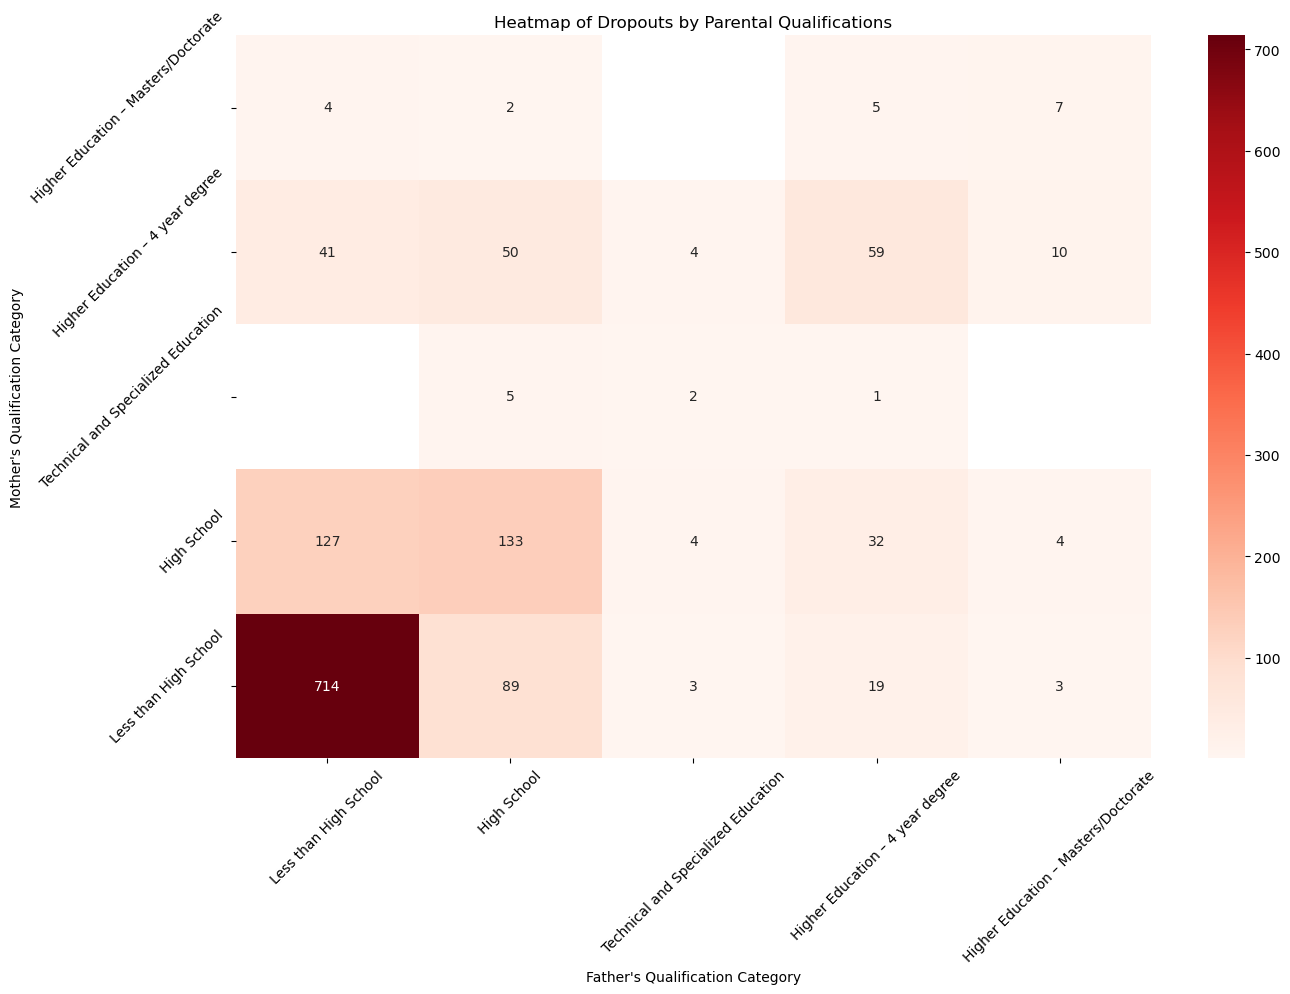

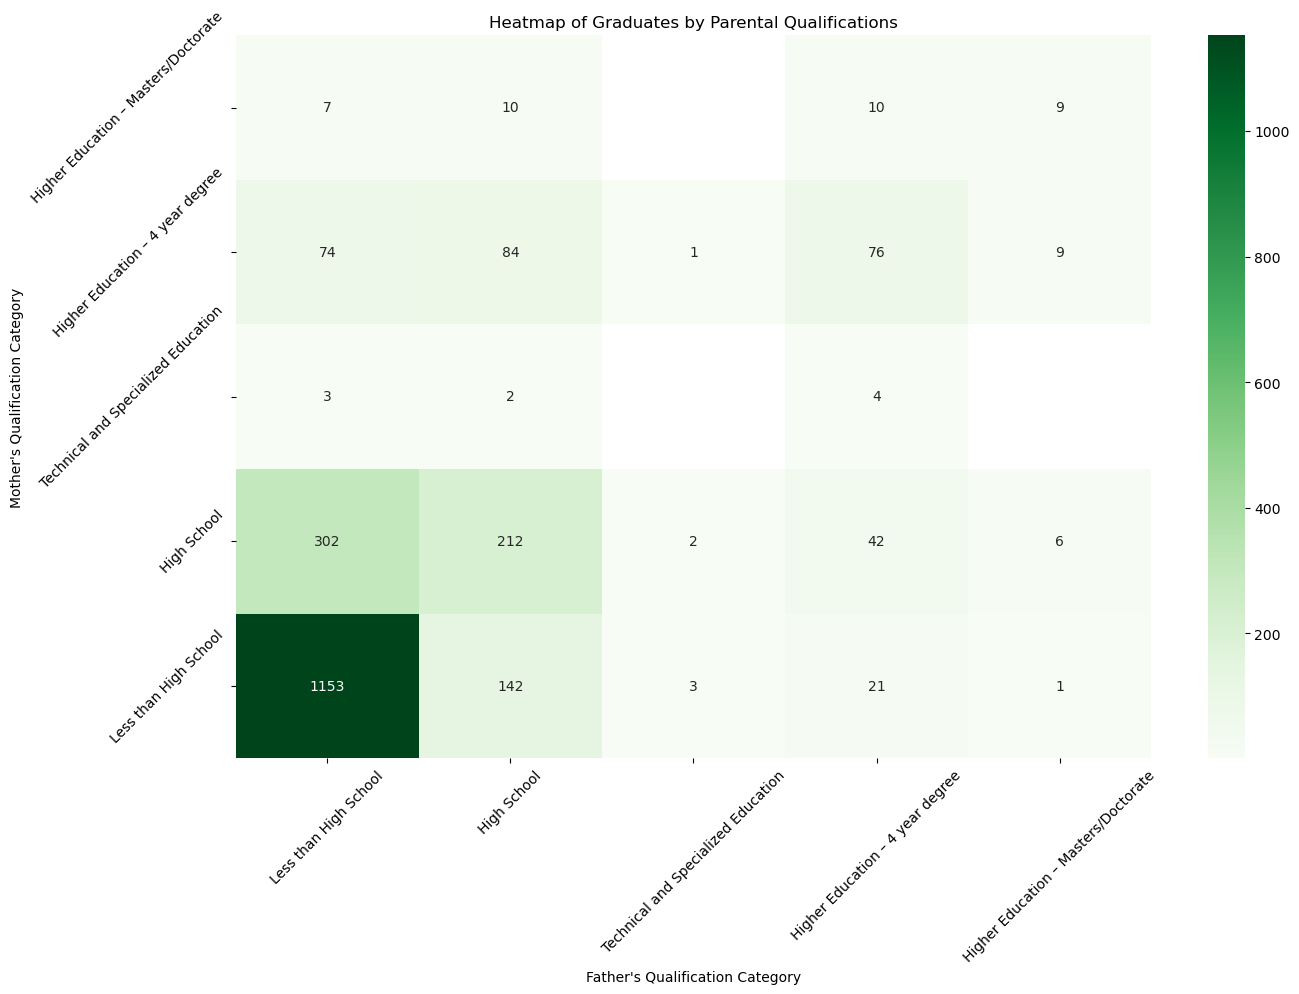

In [39]:
# Fill NaN values with 'Unknown'
plot_df["Mother's_qualification"].fillna("Unknown", inplace=True)
plot_df["Father's_qualification"].fillna("Unknown", inplace=True)

# Updated categories with numeric values for mapping
qualification_map = {
    "High School": [1, 31, 33],
    "Higher Education – 4 year degree": [2, 3, 6, 40],
    "Higher Education – Masters/Doctorate": [4, 5, 43, 44],
    "Less than High School": [
        9,
        10,
        11,
        12,
        13,
        14,
        18,
        19,
        20,
        25,
        26,
        27,
        37,
        38,
        29,
        30,
        35,
        36,
    ],
    "Technical and Specialized Education": [22, 39, 41, 42],
}

# Grouping order
qual_order_x = [
    "Less than High School",
    "High School",
    "Technical and Specialized Education",
    "Higher Education – 4 year degree",
    "Higher Education – Masters/Doctorate",
]
qual_order_y = list(reversed(qual_order_x))


# Function to map qualifications to categories
def map_qualification(value):
    for category, codes in qualification_map.items():
        if value in codes:
            return category
    return "Unknown"


# Apply the mapping to the dataset
plot_df["Mother_qual_cat"] = plot_df["Mother's_qualification"].apply(map_qualification)
plot_df["Father_qual_cat"] = plot_df["Father's_qualification"].apply(map_qualification)

# Filter out rows that fall into the "Unknown" category
plot_df = plot_df[~plot_df["Mother_qual_cat"].isin(["Unknown"])]
plot_df = plot_df[~plot_df["Father_qual_cat"].isin(["Unknown"])]

# Creating a pivot table for heatmap of dropouts
pivot_table_dropouts = pd.pivot_table(
    plot_df[plot_df["Target"] == 0],
    values="Target",
    index="Mother_qual_cat",
    columns="Father_qual_cat",
    aggfunc="count",
).reindex(index=qual_order_y, columns=qual_order_x)

# Creating a pivot table for heatmap of graduates
pivot_table_graduates = pd.pivot_table(
    plot_df[plot_df["Target"] == 2],
    values="Target",
    index="Mother_qual_cat",
    columns="Father_qual_cat",
    aggfunc="count",
).reindex(index=qual_order_y, columns=qual_order_x)

# Plotting the heatmap for dropouts
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table_dropouts, annot=True, cmap="Reds", fmt=".0f")
plt.title("Heatmap of Dropouts by Parental Qualifications")
plt.xlabel("Father's Qualification Category")
plt.ylabel("Mother's Qualification Category")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the heatmap for graduates
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table_graduates, annot=True, cmap="Greens", fmt=".0f")
plt.title("Heatmap of Graduates by Parental Qualifications")
plt.xlabel("Father's Qualification Category")
plt.ylabel("Mother's Qualification Category")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

### 3b.) Combined Parental Qualification BarCharts

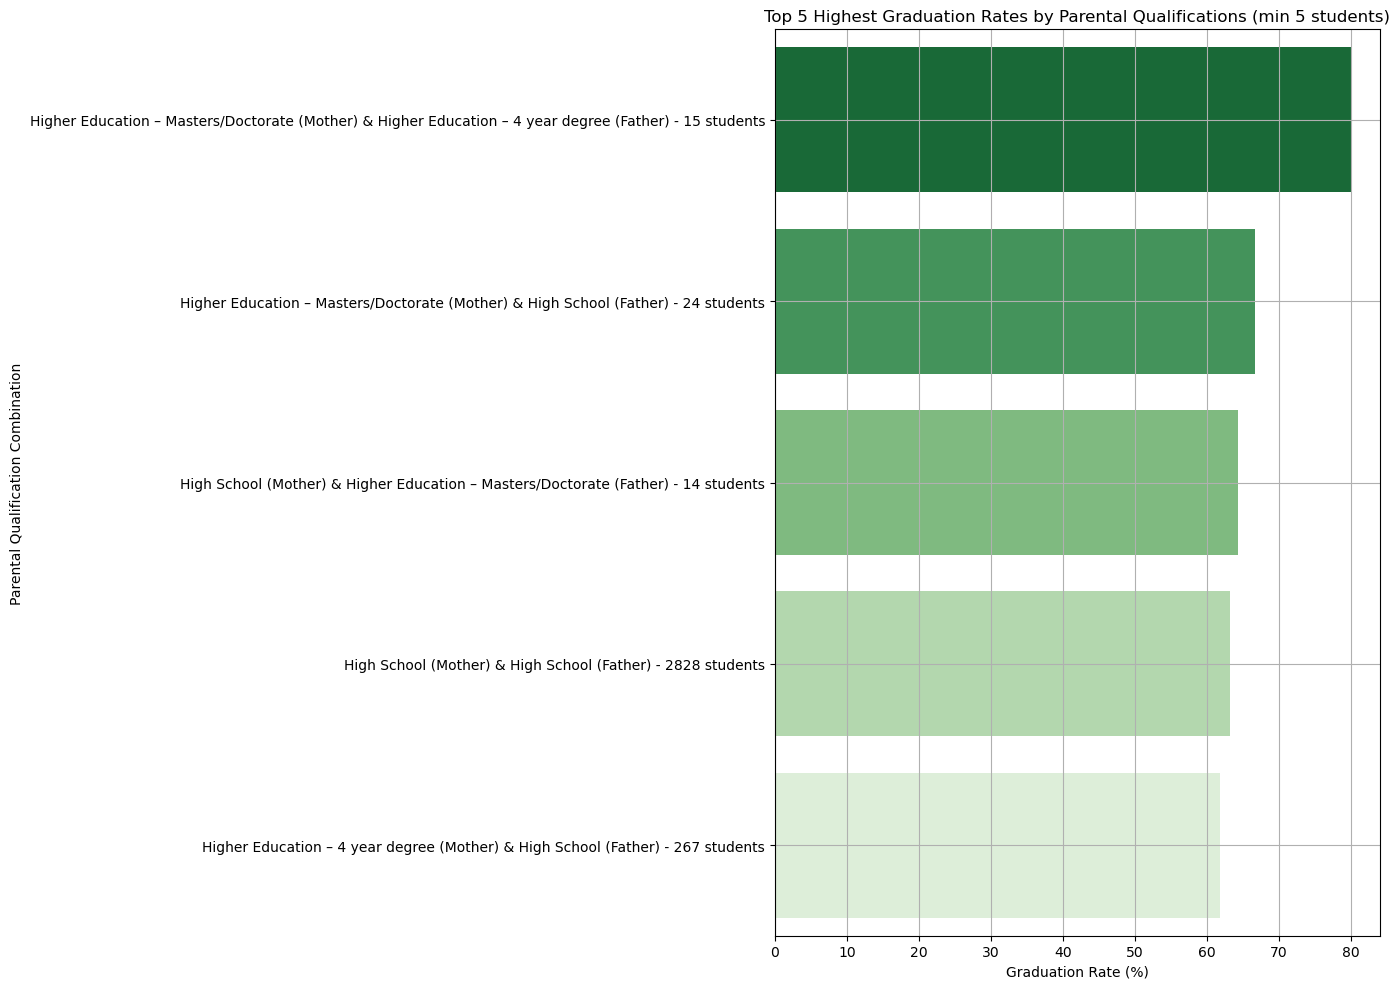

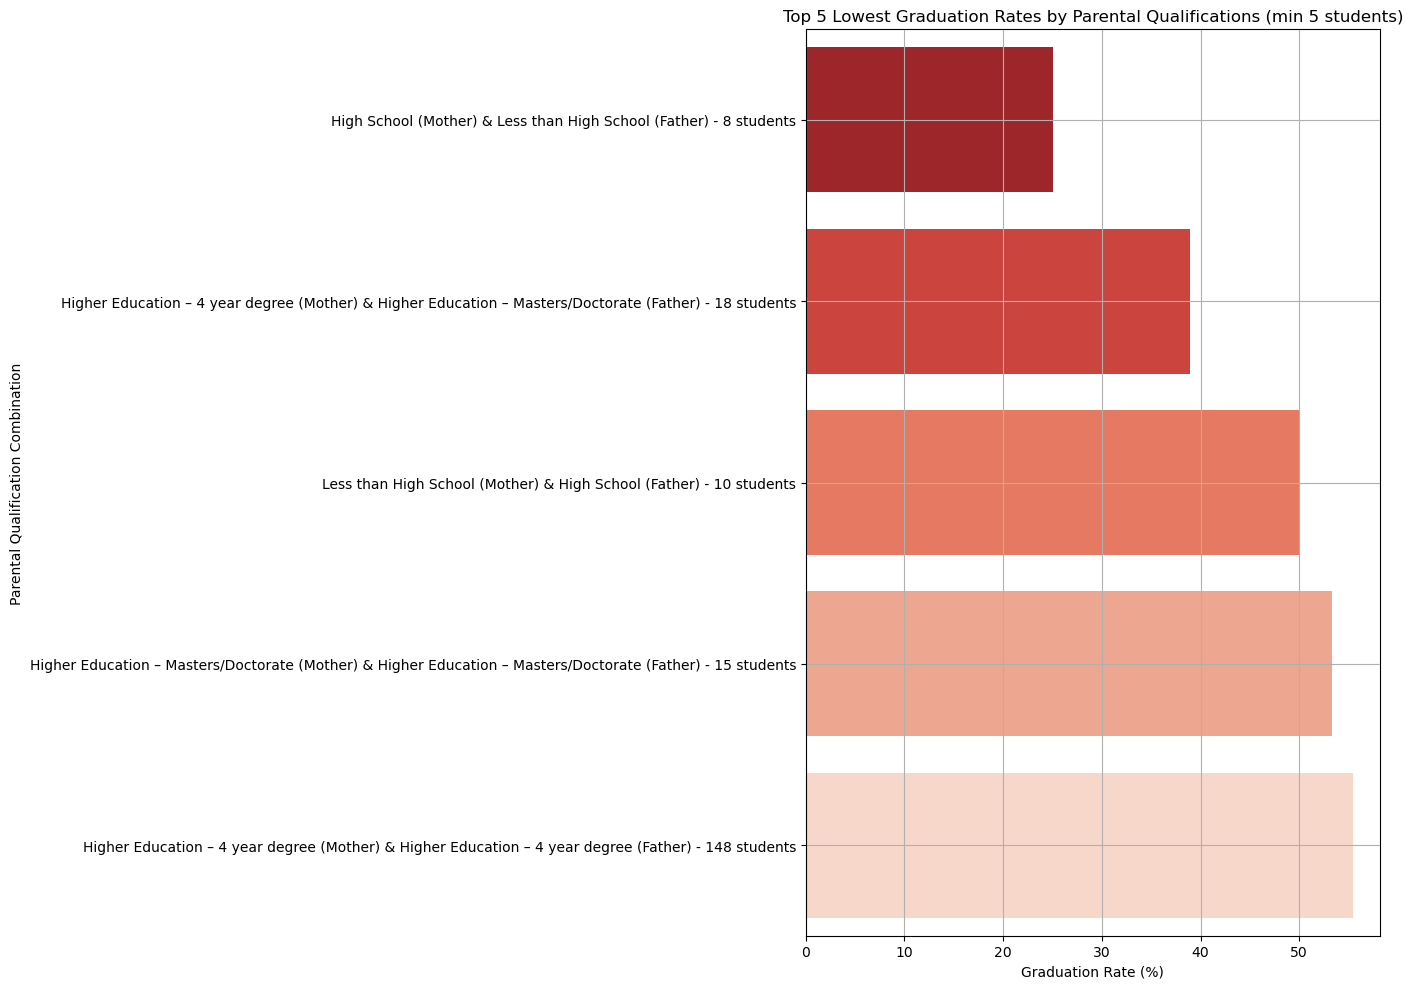

In [40]:
# Fill NaN values with 'Unknown'
plot_df["Mother's_qualification"].fillna("Unknown", inplace=True)
plot_df["Father's_qualification"].fillna("Unknown", inplace=True)

# Updated categories with numeric values for mapping
qualification_map = {
    "High School": [
        19,
        1,
        37,
        38,
        39,
        35,
        36,
        14,
        30,
        43,
        26,
        11,
        27,
        6,
        40,
        13,
        18,
        22,
        44,
    ],
    "Higher Education – 4 year degree": [2, 3, 40, 12],
    "Higher Education – Masters/Doctorate": [4, 5, 44, 42],
    "Less than High School": [7, 8, 9, 10, 20, 29, 31, 33],
    "Technical and Specialized Education": [25, 39],
    "Unknown": [34],
}

# Grouping order
qual_order_x = [
    "Unknown",
    "Less than High School",
    "High School",
    "Technical and Specialized Education",
    "Higher Education – 4 year degree",
    "Higher Education – Masters/Doctorate",
]
qual_order_y = list(reversed(qual_order_x))


# Function to map qualifications to categories
def map_qualification(value):
    for category, codes in qualification_map.items():
        if value in codes:
            return category
    return "Unknown"


# Apply the mapping to the dataset
plot_df["Mother_qual_cat"] = plot_df["Mother's_qualification"].apply(map_qualification)
plot_df["Father_qual_cat"] = plot_df["Father's_qualification"].apply(map_qualification)

# Calculate the number of students and the percentage of graduates for each qualification combination
pivot_table_counts = pd.pivot_table(
    plot_df,
    values="Target",
    index="Mother_qual_cat",
    columns="Father_qual_cat",
    aggfunc="count",
)
pivot_table_percent = pd.pivot_table(
    plot_df,
    values="Target",
    index="Mother_qual_cat",
    columns="Father_qual_cat",
    aggfunc=lambda x: (x == 2).mean() * 100,
)

# Create a dataframe to store both counts and percentages
combo_data = pivot_table_counts.stack().reset_index(name="count")
combo_data["percent"] = pivot_table_percent.stack().reset_index(name="percent")[
    "percent"
]

# Filter for combinations with a minimum of 5 students
combo_data = combo_data[combo_data["count"] >= 5]

# Get the top 5 highest and lowest pass rate combinations
top_5_highest = combo_data.nlargest(5, "percent")
top_5_lowest = combo_data.nsmallest(5, "percent")

# Annotate each entry with the number of students
top_5_highest["annotation"] = top_5_highest.apply(
    lambda x: f"{x['Mother_qual_cat']} (Mother) & {x['Father_qual_cat']} (Father) - {int(x['count'])} students",
    axis=1,
)
top_5_lowest["annotation"] = top_5_lowest.apply(
    lambda x: f"{x['Mother_qual_cat']} (Mother) & {x['Father_qual_cat']} (Father) - {int(x['count'])} students",
    axis=1,
)

# Plotting the top 5 highest pass rate combinations with the correct order and darkest color for highest rate
plt.figure(figsize=(14, 10))
sns.barplot(
    data=top_5_highest.sort_values("percent", ascending=False),
    x="percent",
    y="annotation",
    palette="Greens_r",
)
plt.title("Top 5 Highest Graduation Rates by Parental Qualifications (min 5 students)")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Parental Qualification Combination")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the top 5 lowest pass rate combinations with the correct order and darkest color for lowest rate
plt.figure(figsize=(14, 10))
sns.barplot(
    data=top_5_lowest.sort_values("percent"),
    x="percent",
    y="annotation",
    palette="Reds_r",
)
plt.title("Top 5 Lowest Graduation Rates by Parental Qualifications (min 5 students)")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Parental Qualification Combination")
plt.grid(True)
plt.tight_layout()
plt.show()

### 4.) Unemployment Rate Data Exploration and Plot

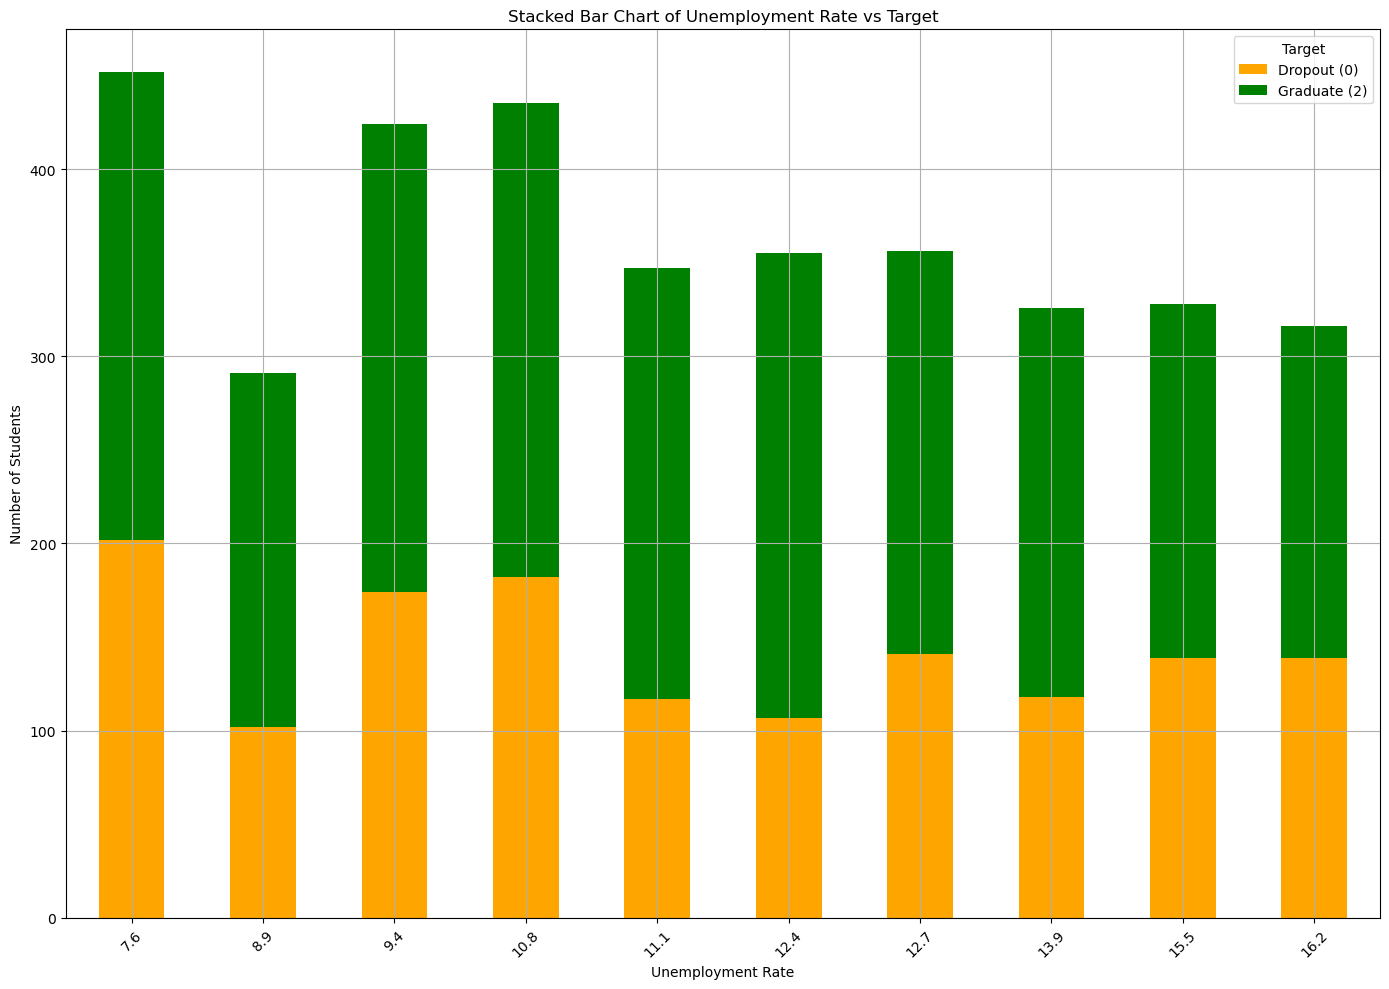

In [41]:
# Make copy of DataFrame from original
plot_df = df.copy()

# Ensure 'Unemployment rate' is treated as numeric
plot_df["Unemployment rate"] = pd.to_numeric(
    plot_df["Unemployment rate"], errors="coerce"
)

# Filter out "Enrolled" from the Target column
df_filtered = plot_df[plot_df["Target"].isin(["Dropout", "Graduate"])].copy()

# Create a new dataframe to count the number of dropouts and graduates at each unemployment rate
count_data = (
    plot_df.groupby(["Unemployment rate", "Target"]).size().unstack(fill_value=0)
)

# Plotting the stacked bar chart with dropouts at the bottom and graduates on top
if 0 in count_data.columns and 2 in count_data.columns:
    count_data = count_data[[0, 2]]  # Reorder columns to put dropouts at the bottom
elif 0 in count_data.columns:
    count_data = count_data[[0]]
elif 2 in count_data.columns:
    count_data = count_data[[2]]

count_data.plot(kind="bar", stacked=True, figsize=(14, 10), color=["orange", "green"])
plt.title("Stacked Bar Chart of Unemployment Rate vs Target")
plt.xlabel("Unemployment Rate")
plt.ylabel("Number of Students")
plt.legend(title="Target", labels=["Dropout (0)", "Graduate (2)"])
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5.) Parental Occupation Data Exploration and Plot

### 5a.) Parental Occupation HeatMap

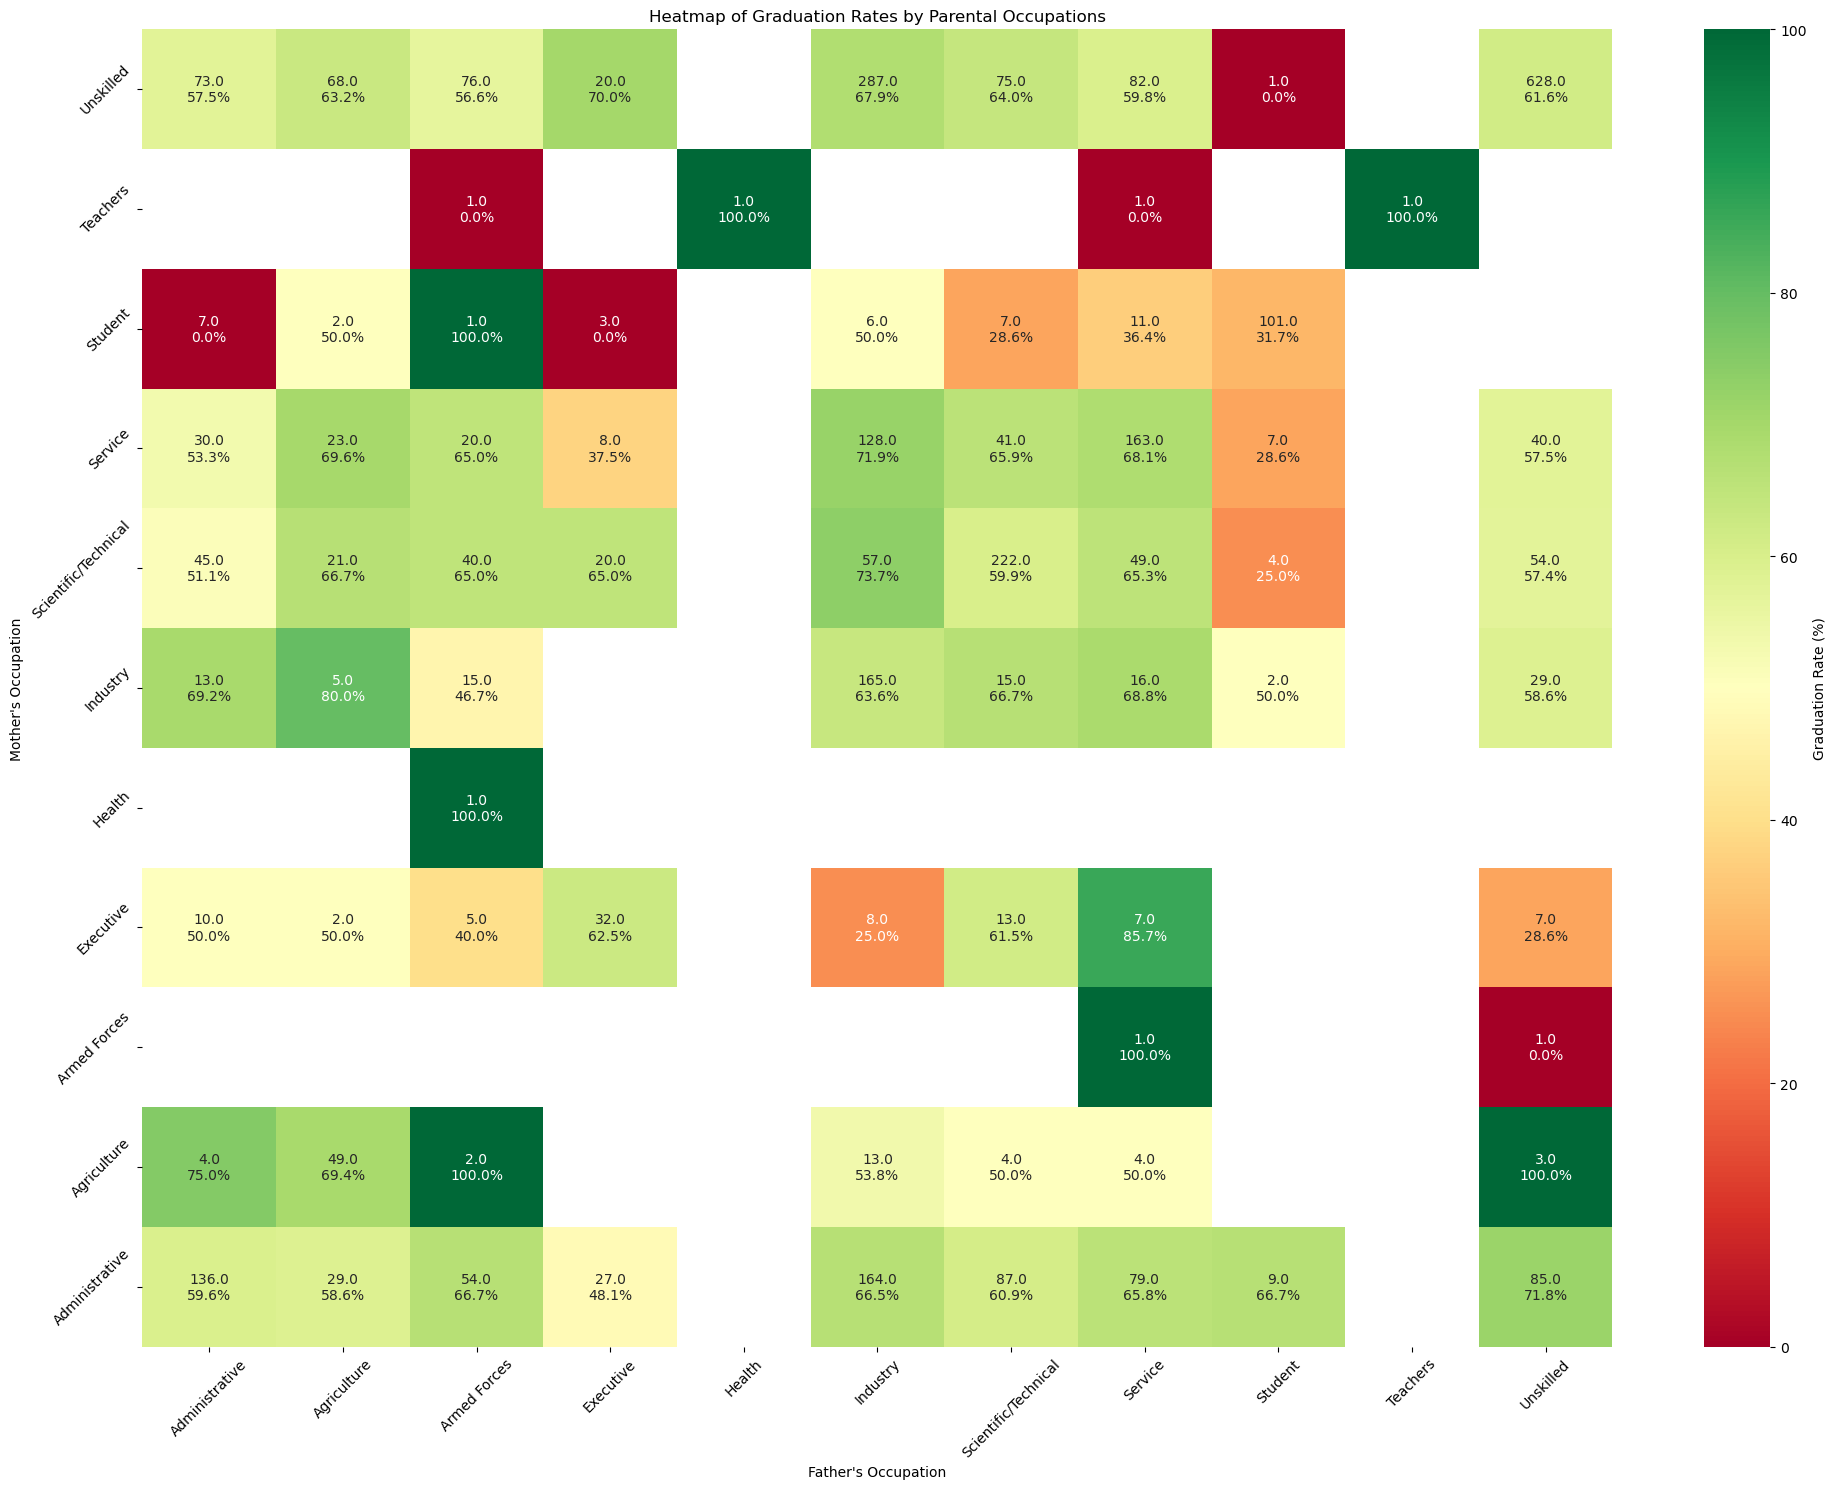

In [42]:
# Map occupations to condensed categories
occupation_map = {
    0: "Student",
    1: "Executive",
    2: "Scientific/Technical",
    3: "Scientific/Technical",
    4: "Administrative",
    5: "Service",
    6: "Agriculture",
    7: "Industry",
    8: "Industry",
    9: "Unskilled",
    10: "Armed Forces",
    101: "Armed Forces",
    102: "Armed Forces",
    103: "Armed Forces",
    112: "Administrative",
    114: "Service",
    121: "Scientific/Technical",
    122: "Health",
    123: "Teachers",
    124: "Finance",
    131: "Scientific/Technical",
    132: "Health",
    134: "Service",
    141: "Administrative",
    143: "Administrative",
    144: "Administrative",
    151: "Service",
    152: "Service",
    153: "Service",
    154: "Service",
    161: "Agriculture",
    163: "Agriculture",
    171: "Industry",
    172: "Industry",
    173: "Industry",
    174: "Industry",
    175: "Industry",
    181: "Industry",
    182: "Industry",
    183: "Industry",
    191: "Service",
    192: "Agriculture",
    193: "Industry",
    194: "Service",
    195: "Service",
}

# Apply the mapping to the dataset
plot_df["Mother_occupation"] = plot_df["Mother's_occupation"].map(occupation_map)
plot_df["Father_occupation"] = plot_df["Father's_occupation"].map(occupation_map)

# Remove "Other" and "Blank" categories
plot_df = plot_df[~plot_df["Mother_occupation"].isin(["Other", "Blank"])]
plot_df = plot_df[~plot_df["Father_occupation"].isin(["Other", "Blank"])]

# Create an ordered list of all occupations present in the dataset
occupation_order = sorted(plot_df["Mother_occupation"].dropna().unique())

# Calculate the number of students and the percentage of graduates for each occupation combination
pivot_table_counts = pd.pivot_table(
    plot_df,
    values="Target",
    index="Mother_occupation",
    columns="Father_occupation",
    aggfunc="count",
).reindex(index=reversed(occupation_order), columns=occupation_order)
pivot_table_percent = pd.pivot_table(
    plot_df,
    values="Target",
    index="Mother_occupation",
    columns="Father_occupation",
    aggfunc=lambda x: (x == 2).mean() * 100,
).reindex(index=reversed(occupation_order), columns=occupation_order)

# Remove rows and columns with no data
pivot_table_counts = pivot_table_counts.loc[
    (pivot_table_counts != 0).any(axis=1), (pivot_table_counts != 0).any(axis=0)
]
pivot_table_percent = pivot_table_percent.reindex(
    index=pivot_table_counts.index, columns=pivot_table_counts.columns
)

# Combine the counts and percentages for annotation
annotation_data = (
    pivot_table_counts.astype(str)
    + "\n"
    + pivot_table_percent.round(1).astype(str)
    + "%"
)

# Plotting the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(
    pivot_table_percent,
    annot=annotation_data,
    fmt="",
    cmap="RdYlGn",
    cbar_kws={"label": "Graduation Rate (%)"},
)
plt.title("Heatmap of Graduation Rates by Parental Occupations")
plt.xlabel("Father's Occupation")
plt.ylabel("Mother's Occupation")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

### 5b.) Parental Combined Occupation BarCharts

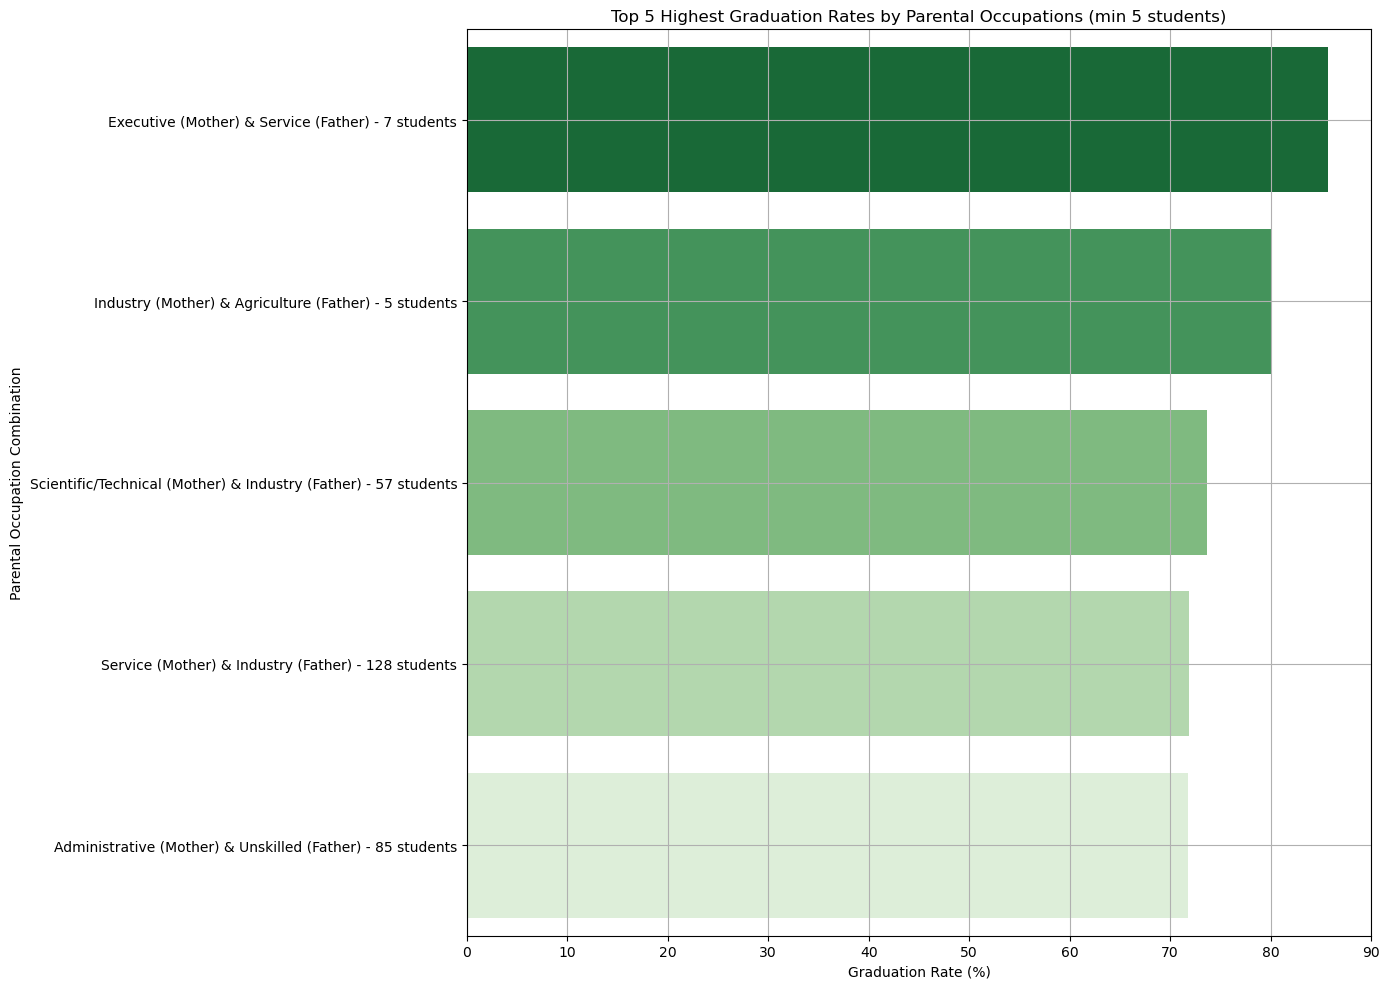

In [43]:
# Map occupations to condensed categories
occupation_map = {
    0: "Student",
    1: "Executive",
    2: "Scientific/Technical",
    3: "Scientific/Technical",
    4: "Administrative",
    5: "Service",
    6: "Agriculture",
    7: "Industry",
    8: "Industry",
    9: "Unskilled",
    10: "Armed Forces",
    101: "Armed Forces",
    102: "Armed Forces",
    103: "Armed Forces",
    112: "Administrative",
    114: "Service",
    121: "Scientific/Technical",
    122: "Health",
    123: "Teachers",
    124: "Finance",
    131: "Scientific/Technical",
    132: "Health",
    134: "Service",
    141: "Administrative",
    143: "Administrative",
    144: "Administrative",
    151: "Service",
    152: "Service",
    153: "Service",
    154: "Service",
    161: "Agriculture",
    163: "Agriculture",
    171: "Industry",
    172: "Industry",
    173: "Industry",
    174: "Industry",
    175: "Industry",
    181: "Industry",
    182: "Industry",
    183: "Industry",
    191: "Service",
    192: "Agriculture",
    193: "Industry",
    194: "Service",
    195: "Service",
}

# Apply the mapping to the dataset
plot_df["Mother_occupation"] = plot_df["Mother's_occupation"].map(occupation_map)
plot_df["Father_occupation"] = plot_df["Father's_occupation"].map(occupation_map)

# Remove "Other" and "Blank" categories
plot_df = plot_df[~plot_df["Mother_occupation"].isin(["Other", "Blank"])]
plot_df = plot_df[~plot_df["Father_occupation"].isin(["Other", "Blank"])]

# Create an ordered list of all occupations present in the dataset
occupation_order = sorted(plot_df["Mother_occupation"].dropna().unique())

# Calculate the number of students and the percentage of graduates for each occupation combination
pivot_table_counts = pd.pivot_table(
    plot_df,
    values="Target",
    index="Mother_occupation",
    columns="Father_occupation",
    aggfunc="count",
)
pivot_table_percent = pd.pivot_table(
    plot_df,
    values="Target",
    index="Mother_occupation",
    columns="Father_occupation",
    aggfunc=lambda x: (x == 2).mean() * 100,
)

# Remove rows and columns with no data
pivot_table_counts = pivot_table_counts.loc[
    (pivot_table_counts != 0).any(axis=1), (pivot_table_counts != 0).any(axis=0)
]
pivot_table_percent = pivot_table_percent.reindex(
    index=pivot_table_counts.index, columns=pivot_table_counts.columns
)

# Create a dataframe to store both counts and percentages
combo_data = pivot_table_counts.stack().reset_index(name="count")
combo_data["percent"] = pivot_table_percent.stack().reset_index(name="percent")[
    "percent"
]

# Filter for combinations with a minimum of 5 students
combo_data = combo_data[combo_data["count"] >= 5]

# Get the top 5 highest pass rate combinations
top_5_highest = combo_data.nlargest(5, "percent")

# Annotate each entry with the number of students
top_5_highest["annotation"] = top_5_highest.apply(
    lambda x: f"{x['Mother_occupation']} (Mother) & {x['Father_occupation']} (Father) - {int(x['count'])} students",
    axis=1,
)

# Plotting the top 5 highest pass rate combinations
plt.figure(figsize=(14, 10))
sns.barplot(
    data=top_5_highest.sort_values("percent", ascending=False),
    x="percent",
    y="annotation",
    palette="Greens_r",
)
plt.title("Top 5 Highest Graduation Rates by Parental Occupations (min 5 students)")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Parental Occupation Combination")
plt.grid(True)
plt.tight_layout()
plt.show()

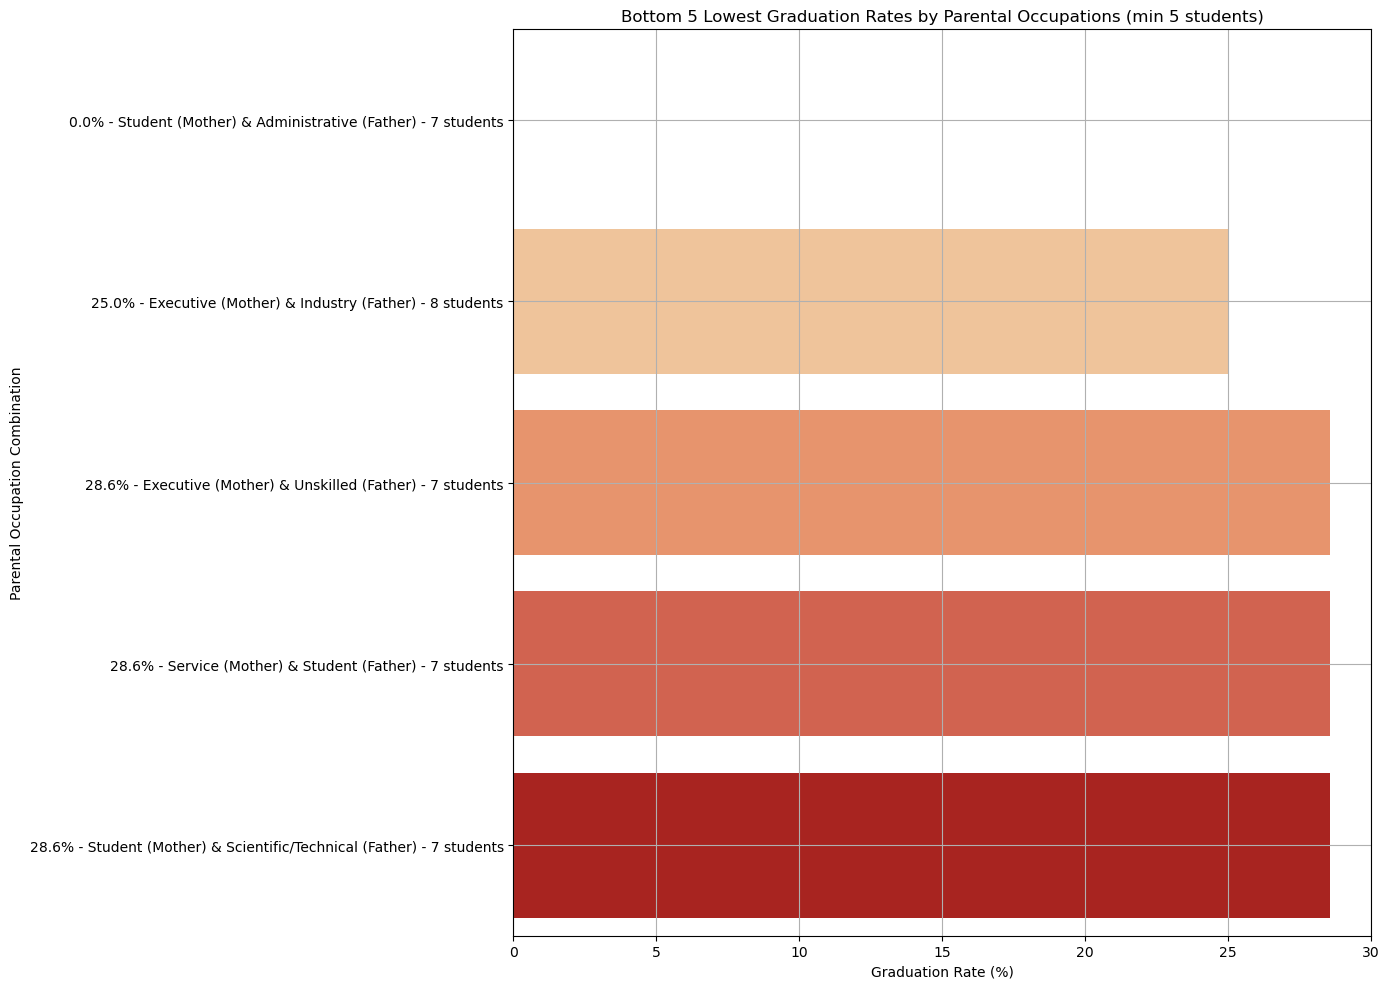

In [44]:
# Map occupations to condensed categories
occupation_map = {
    0: "Student",
    1: "Executive",
    2: "Scientific/Technical",
    3: "Scientific/Technical",
    4: "Administrative",
    5: "Service",
    6: "Agriculture",
    7: "Industry",
    8: "Industry",
    9: "Unskilled",
    10: "Armed Forces",
    101: "Armed Forces",
    102: "Armed Forces",
    103: "Armed Forces",
    112: "Administrative",
    114: "Service",
    121: "Scientific/Technical",
    122: "Health",
    123: "Teachers",
    124: "Finance",
    131: "Scientific/Technical",
    132: "Health",
    134: "Service",
    141: "Administrative",
    143: "Administrative",
    144: "Administrative",
    151: "Service",
    152: "Service",
    153: "Service",
    154: "Service",
    161: "Agriculture",
    163: "Agriculture",
    171: "Industry",
    172: "Industry",
    173: "Industry",
    174: "Industry",
    175: "Industry",
    181: "Industry",
    182: "Industry",
    183: "Industry",
    191: "Service",
    192: "Agriculture",
    193: "Industry",
    194: "Service",
    195: "Service",
}

# Apply the mapping to the dataset
plot_df["Mother_occupation"] = plot_df["Mother's_occupation"].map(occupation_map)
plot_df["Father_occupation"] = plot_df["Father's_occupation"].map(occupation_map)

# Remove "Other" and "Blank" categories
plot_df = plot_df[~plot_df["Mother_occupation"].isin(["Other", "Blank"])]
plot_df = plot_df[~plot_df["Father_occupation"].isin(["Other", "Blank"])]

# Create an ordered list of all occupations present in the dataset
occupation_order = sorted(plot_df["Mother_occupation"].dropna().unique())

# Calculate the number of students and the percentage of graduates for each occupation combination
pivot_table_counts = pd.pivot_table(
    plot_df,
    values="Target",
    index="Mother_occupation",
    columns="Father_occupation",
    aggfunc="count",
)
pivot_table_percent = pd.pivot_table(
    plot_df,
    values="Target",
    index="Mother_occupation",
    columns="Father_occupation",
    aggfunc=lambda x: (x == 2).mean() * 100,
)

# Remove rows and columns with no data
pivot_table_counts = pivot_table_counts.loc[
    (pivot_table_counts != 0).any(axis=1), (pivot_table_counts != 0).any(axis=0)
]
pivot_table_percent = pivot_table_percent.reindex(
    index=pivot_table_counts.index, columns=pivot_table_counts.columns
)

# Create a dataframe to store both counts and percentages
combo_data = pivot_table_counts.stack().reset_index(name="count")
combo_data["percent"] = pivot_table_percent.stack().reset_index(name="percent")[
    "percent"
]

# Filter for combinations with a minimum of 5 students
combo_data = combo_data[combo_data["count"] >= 5]

# Get the bottom 5 lowest pass rate combinations
bottom_5_lowest = combo_data.nsmallest(5, "percent")

# Annotate each entry with the percentage and the number of students
bottom_5_lowest["annotation"] = bottom_5_lowest.apply(
    lambda x: f"{x['percent']:.1f}% - {x['Mother_occupation']} (Mother) & {x['Father_occupation']} (Father) - {int(x['count'])} students",
    axis=1,
)

# Plotting the bottom 5 lowest pass rate combinations with a brighter red
plt.figure(figsize=(14, 10))
sns.barplot(
    data=bottom_5_lowest.sort_values("percent"),
    x="percent",
    y="annotation",
    palette="OrRd",
)
plt.title("Bottom 5 Lowest Graduation Rates by Parental Occupations (min 5 students)")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Parental Occupation Combination")
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 4: Build The Models Below

+ Each of the 5 questions will have their corresponding Decision Tree and Random Forest model classifiers

+ Each model's accuracy will be measured by 3 visualizations each using
    + Default parameters
    + Feature impoortance / dropping columns
        + If feature importance improves the accuracy it will be optimized with a grid search 
        + If feature importance does not improve accuracy, the grid search will use the original dataset
    + Gridsearch
+ The random_state parameter will be used on each of the 5 DT and RF sets using the same value for each set during tuning
    + Q1 DT and RF models will use random_state=1 for default parameters, feature importance, and GridSearch
    + Q2 DT and RF models will use random_state=2 for default parameters, feature importance, and GridSearch
    + and so forth
    
+ Some of the code in this section was taken and modified from the class lectures

In [45]:
"""
Train and evaluate two machine learning models, tune hyperparameters and reduce the overfitting to improve the model.  
Evaluate the performance of the models using the metrics and diagnostics we used in class. 
"""

# In this section, build (two) models per the guidelines
# Since Decision Trees and Random Forests are needed, refer to Week 5's Random_Forest-1 and DT_Iris-1 notebooks
# Fine tune hyper parameters as described in the Week 5 assignment

'\nTrain and evaluate two machine learning models, tune hyperparameters and reduce the overfitting to improve the model.  \nEvaluate the performance of the models using the metrics and diagnostics we used in class. \n'

### Functions were written to help render confusion matrix accuracy heat maps and feature importance based on class lectures to improve code readability

In [46]:
def create_confusion_matrix_visual(
    target_test,
    target_prediction,
    model,
    model_label,
    features,
    color=None,
    figure=None,
):
    """
    Creates a confusion matrix that measures accuracy

    Required Parameters:
    target_test: Test data for y
    target prediction: y prediction result
    model: model used to calculate accuracy
    model_label: Used as part of the heatmap label
    features: Test data for X

    Optional Parameters:
    color: color map for confusion matrix
    figure: Figure number
    Returns:
    None
    """

    cm = confusion_matrix(target_test, target_prediction)
    plt.figure(figsize=(10, 10))

    if color == None:
        color = "Blues"

    sns.heatmap(data=cm, linewidths=0.5, annot=True, square=True, cmap=color, fmt=".0f")
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
    all_sample_title = (
        model_label + ": {:.2f}".format(model.score(features, target_test) * 100) + "%"
    )
    plt.title(figure + all_sample_title, size=12)

    # return the list of products that should be re-called
    return None

In [47]:
def display_feature_importance(model, features_train):
    """
    Calculates built in feature importance from pandas

    Required Parameters:
    model: model used to calculate importance
    features_train: Training data for X


    Returns:
    dataframe of feature importance
    """

    fi_dataframe = pd.DataFrame(
        model.feature_importances_, index=features_train.columns, columns=["importance"]
    ).sort_values("importance", ascending=False)
    return fi_dataframe

### Modeling for Q1: Marital status

In [48]:
# Preparing the data for Question 1: Marital Status
target_marital_status = df_marital_status_correlation["Target"]
df_marital_status_X = df_marital_status_correlation
df_marital_status_X = df_marital_status_X.drop("Target", axis=1)

X = df_marital_status_X
y = target_marital_status

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (2904, 17)
Testing split input-  (726, 17)


In [49]:
# Create the decision tree with default parameters
DT_marital_status = DecisionTreeClassifier(random_state=1)
DT_marital_status.fit(X_train, y_train)

# Run the predictions
y_pred_marital_status = DT_marital_status.predict(X_test)
print(
    "Classification report (Marital Status) - \n",
    classification_report(y_test, y_pred_marital_status),
)

Classification report (Marital Status) - 
               precision    recall  f1-score   support

           0       0.60      0.66      0.63       278
           2       0.77      0.73      0.75       448

    accuracy                           0.70       726
   macro avg       0.69      0.69      0.69       726
weighted avg       0.71      0.70      0.70       726



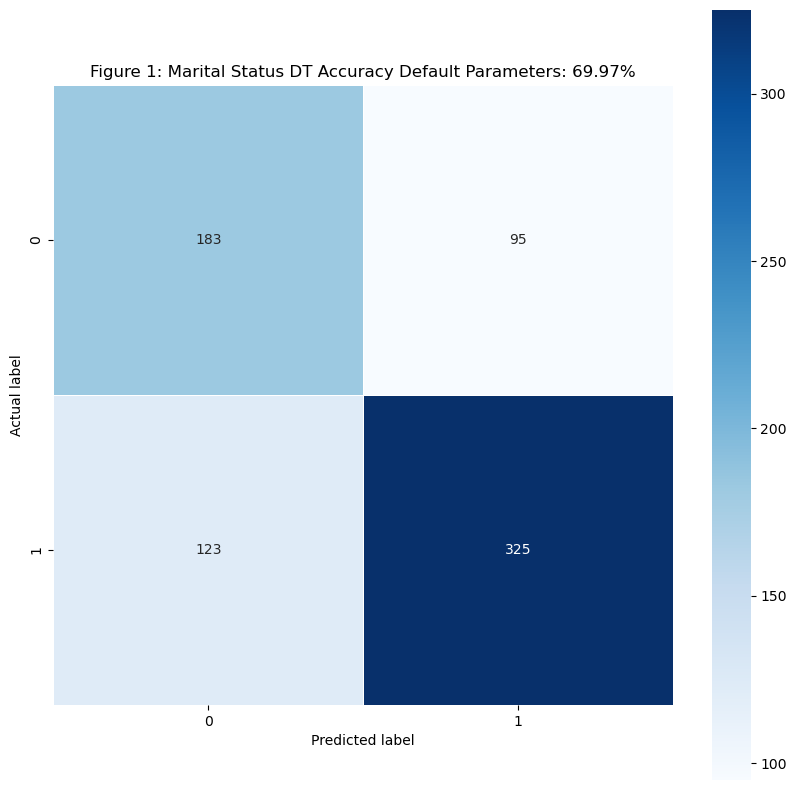

In [50]:
# Create a Marital Status heatmap with default Decision Tree parameters
create_confusion_matrix_visual(
    y_test,
    y_pred_marital_status,
    DT_marital_status,
    "Marital Status DT Accuracy Default Parameters",
    X_test,
    color="Blues",
    figure="Figure 1: ",
)

In [51]:
# Create a Random forest classifier based on lecture's from Week 5
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)  # with default settings
y_pred_marital_status_rf = rf.predict(X_test)

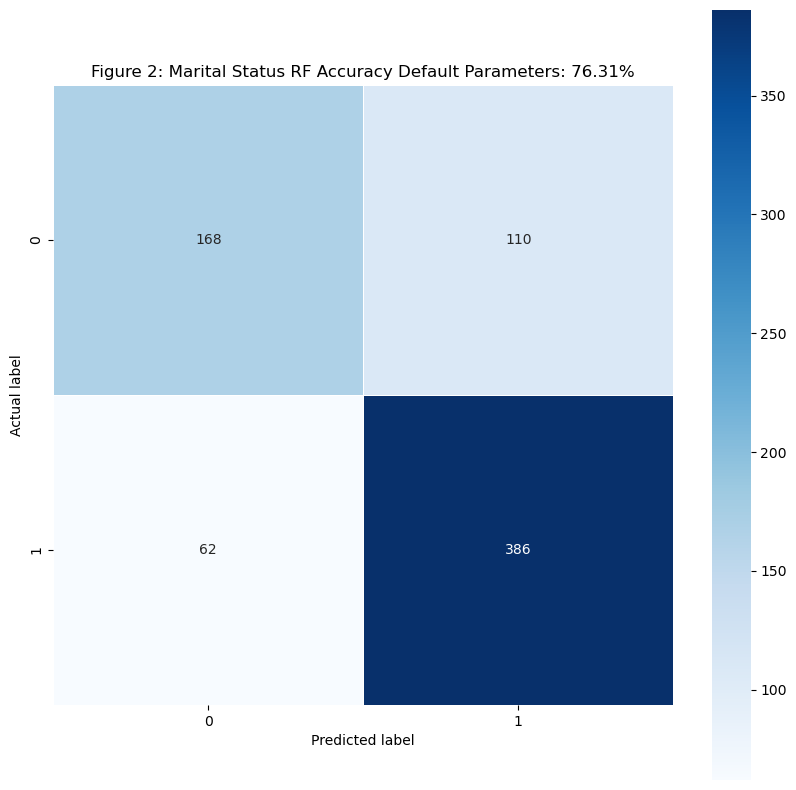

In [52]:
# Create a Marital Status heatmap with default Random Forest parameters
create_confusion_matrix_visual(
    y_test,
    y_pred_marital_status_rf,
    rf,
    "Marital Status RF Accuracy Default Parameters",
    X_test,
    color="Blues",
    figure="Figure 2: ",
)

In [53]:
# Tune the marital Status decision tree using feature importance
feature_importances = display_feature_importance(DT_marital_status, X_train)
feature_importances

importance
Tuition_fees_up_to_date         0.192076
Admission_grade                 0.181101
Course                          0.102428
Previous_qualification_grade    0.098210
Father's_occupation             0.096194
Application_mode                0.068204
Mother's_qualification          0.055118
Mother's_occupation             0.050056
Father's_qualification          0.041150
Application_order               0.039025
Previous_qualification          0.028340
Displaced                       0.016714
Debtor                          0.015299
Marital_status                  0.007448
Daytime/evening_attendance      0.005074
Nationality                     0.002620
Educational_special_needs       0.000942

In [54]:
# Removing any of the coulumns for DT lowered the accuracy
df_dt_marital_status_X_feature_importance = df_marital_status_X.loc[
    :,
    df_marital_status_X.columns.drop(
        [
            "Educational_special_needs",
            "Nationality",
            "Daytime/evening_attendance",
            "Previous_qualification",
        ]
    ),
]
df_dt_marital_status_X_feature_importance

Marital_status  Application_mode  Application_order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Previous_qualification_grade  Mother's_qualification  \
0                            122.0                      19   
1                            160.0                       1   
2                            122.0                      37   
3                            122.0                      38   
4                            100.0                      37   
...                            ...                     ...   
4419                         125.0                       1   
4420                         120.0                       1   
4421                         154.0                      37   
4422                         180.0                      37   
4423                         152.0                      38   

      Father's_qualification  Mother's_occupation  Father's_occupation  \
0                         12                    5                    9   
1                          3                    3                    3   
2                         37                    9                    9   
3                         37                    5                    3   
4                         38                    9                    9   
...                      ...                  ...                  ...   
4419                       1                    5                    4   
4420                       1                    9                    9   
4421                      37                    9                    9   
4422                      37                    7                    4   
4423                      37                    5                    9   

      Admission_grade  Displaced  Debtor  Tuition_fees_up_to_date  
0               127.3          1       0                        1  
1               142.5          1       0                        0  
2               124.8          1       0                        0  
3               119.6          1       0                        1  
4               141.5          0       0                        1  
...               ...        ...     ...                      ...  
4419            122.2          0       0                        1  
4420            119.0          1       1                        0  
4421            149.5          1       0                        1  
4422            153.8          1       0                        1  
4423            152.0          1       0                        1  

[3630 rows x 13 columns]

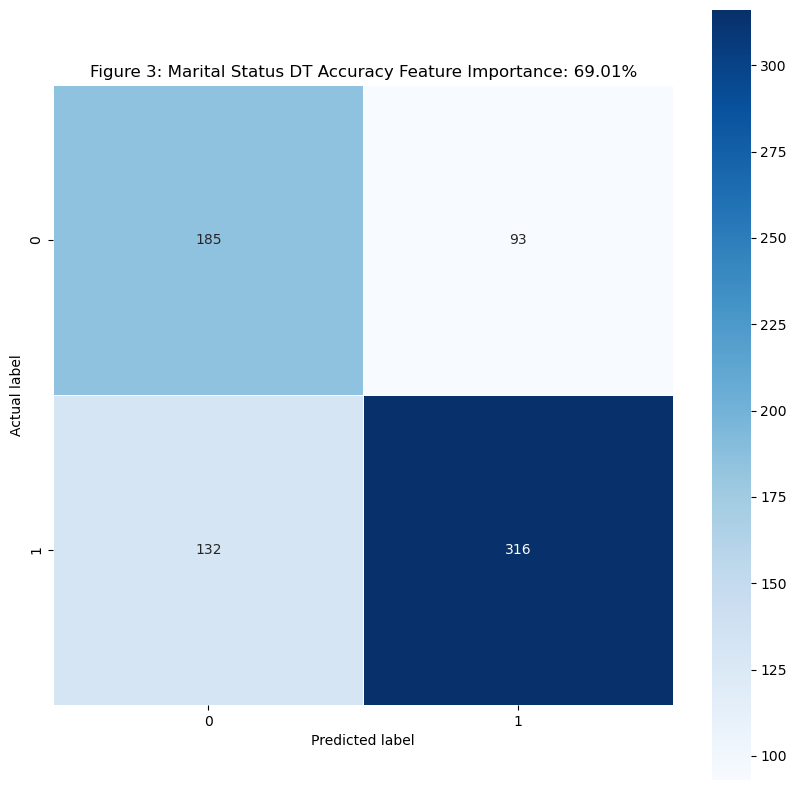

In [55]:
# Get the reduced data based on feature importance for training and testing
# DID NOT IMPROVE ACCURACY
X_dt_reduced = df_dt_marital_status_X_feature_importance
X_train_dt_reduced, X_test_dt_reduced, y_train_dt_reduced, y_test_dt_reduced = (
    train_test_split(X_dt_reduced, y, test_size=0.2, random_state=1)
)

# train the model
DT_marital_status.fit(X_train_dt_reduced, y_train_dt_reduced)
y_pred_marital_status_dt2 = DT_marital_status.predict(X_test_dt_reduced)

# create a Marital Status heatmap with Decision Tree Feature Importance parameters
create_confusion_matrix_visual(
    y_test_dt_reduced,
    y_pred_marital_status_dt2,
    DT_marital_status,
    "Marital Status DT Accuracy Feature Importance",
    X_test_dt_reduced,
    color="Blues",
    figure="Figure 3: ",
)

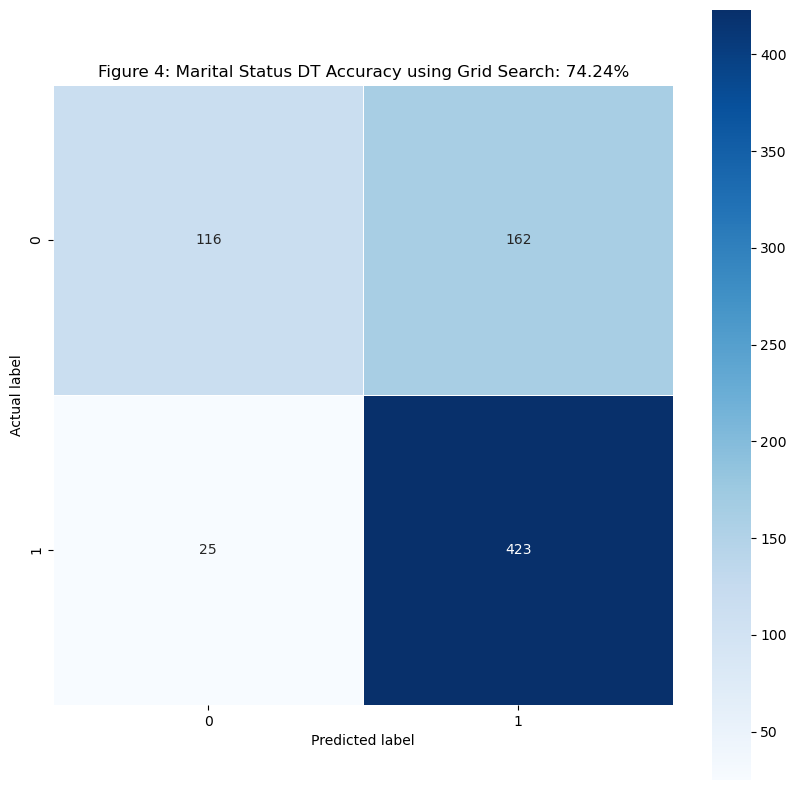

In [56]:
#  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2}

# Hyperparameter Tuning improved DT accuracy
# GRID SEARCH parameters found by executing function in lecture materials then using some of the values above which yielded the following:

dt_grid = DecisionTreeClassifier(
    random_state=1,
    criterion="entropy",
    max_depth=4,
    max_features="sqrt",
    min_samples_leaf=5,
    min_samples_split=2,
)
dt_grid.fit(X_train, y_train)
y_pred_marital_status_dt3 = dt_grid.predict(X_test)

# create a Marital Status heatmap with Decision Tree Hyperparameter Tuning
create_confusion_matrix_visual(
    y_test,
    y_pred_marital_status_dt3,
    dt_grid,
    "Marital Status DT Accuracy using Grid Search",
    X_test,
    color="Blues",
    figure="Figure 4: ",
)

In [57]:
# Tune Marital status random forest using feature importance
feature_importances = display_feature_importance(rf, X_train)
feature_importances

importance
Admission_grade                 0.142706
Tuition_fees_up_to_date         0.142460
Previous_qualification_grade    0.112794
Course                          0.107915
Father's_occupation             0.081211
Application_mode                0.076170
Mother's_occupation             0.070834
Mother's_qualification          0.057701
Father's_qualification          0.055741
Application_order               0.035260
Debtor                          0.034617
Previous_qualification          0.026641
Displaced                       0.022658
Marital_status                  0.017064
Daytime/evening_attendance      0.009008
Nationality                     0.004669
Educational_special_needs       0.002551

In [58]:
# Found the optimum RF colunns to keep using trial and error with the lowest importance values
df_marital_status_X_feature_importance = df_marital_status_X.loc[
    :,
    df_marital_status_X.columns.drop(
        [
            "Educational_special_needs",
            "Nationality",
            "Daytime/evening_attendance",
            "Previous_qualification",
        ]
    ),
]
df_marital_status_X_feature_importance

Marital_status  Application_mode  Application_order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Previous_qualification_grade  Mother's_qualification  \
0                            122.0                      19   
1                            160.0                       1   
2                            122.0                      37   
3                            122.0                      38   
4                            100.0                      37   
...                            ...                     ...   
4419                         125.0                       1   
4420                         120.0                       1   
4421                         154.0                      37   
4422                         180.0                      37   
4423                         152.0                      38   

      Father's_qualification  Mother's_occupation  Father's_occupation  \
0                         12                    5                    9   
1                          3                    3                    3   
2                         37                    9                    9   
3                         37                    5                    3   
4                         38                    9                    9   
...                      ...                  ...                  ...   
4419                       1                    5                    4   
4420                       1                    9                    9   
4421                      37                    9                    9   
4422                      37                    7                    4   
4423                      37                    5                    9   

      Admission_grade  Displaced  Debtor  Tuition_fees_up_to_date  
0               127.3          1       0                        1  
1               142.5          1       0                        0  
2               124.8          1       0                        0  
3               119.6          1       0                        1  
4               141.5          0       0                        1  
...               ...        ...     ...                      ...  
4419            122.2          0       0                        1  
4420            119.0          1       1                        0  
4421            149.5          1       0                        1  
4422            153.8          1       0                        1  
4423            152.0          1       0                        1  

[3630 rows x 13 columns]

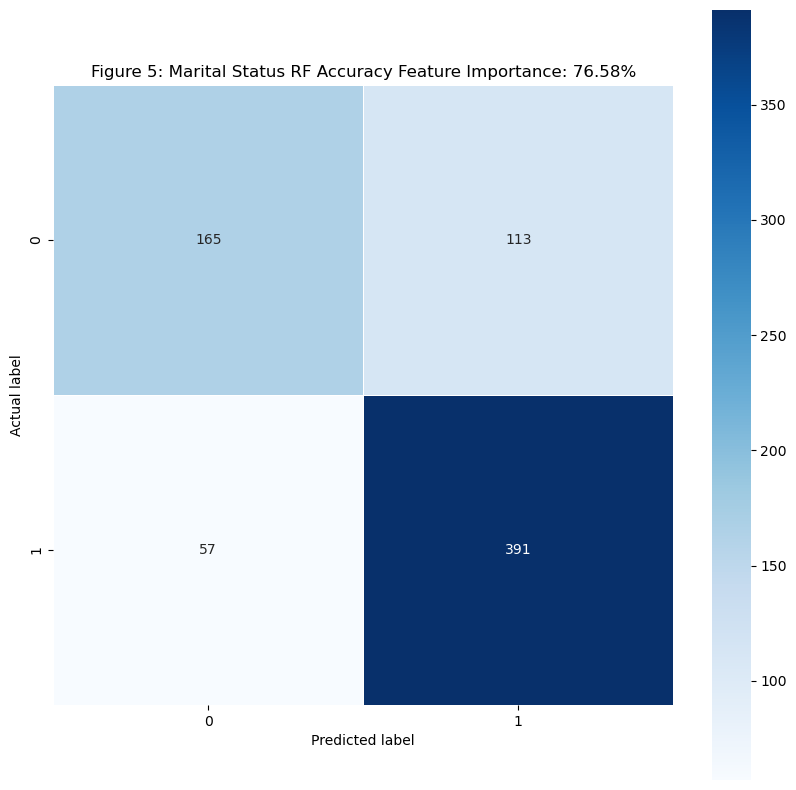

In [59]:
# get the reduced data based on feature importance for training and testing since it improved the accuracy
X_rf_reduced = df_marital_status_X_feature_importance
X_train_rf_reduced, X_test_rf_reduced, y_train_rf_reduced, y_test_rf_reduced = (
    train_test_split(X_rf_reduced, y, test_size=0.2, random_state=1)
)

# train the model
rf.fit(X_train_rf_reduced, y_train_rf_reduced)  # with default settings
y_pred_marital_status_rf2 = rf.predict(X_test_rf_reduced)

# create a Marital Status heatmap with Random Forest Feature Importance parameters
create_confusion_matrix_visual(
    y_test_rf_reduced,
    y_pred_marital_status_rf2,
    rf,
    "Marital Status RF Accuracy Feature Importance",
    X_test_rf_reduced,
    color="Blues",
    figure="Figure 5: ",
)

## Use n_estimators, max_depth, max_features for grid search for the Random Forests
Modified code described in class to help tune the models to establish baseline parameters for Grid Searches

Text(0.5, 0, 'Figure 6a: n_estimators vs Accuracy for the Random Forest model')

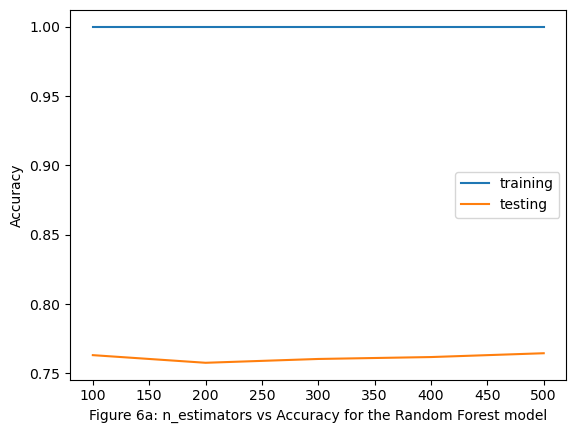

In [60]:
# Estimate the optimal n_estimators
# code is taken from class lectures with a slight modification of adding the pos_label to correspond to graduating
n_estimators = [100, 200, 300, 400, 500]
tr_accuracy = []
tst_accuracy = []

tr_auc = []
tst_auc = []

for est in n_estimators:
    rf = RandomForestClassifier(n_estimators=est, random_state=1)
    rf.fit(X_train, y_train)
    tr_pred = rf.predict(X_train)
    tr_accuracy.append(accuracy_score(y_train, tr_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(
        y_train, tr_pred, pos_label=2
    )
    roc_auc_tr = auc(false_positive_rate, true_positive_rate)
    tr_auc.append(roc_auc_tr)

    tst_pred = rf.predict(X_test)
    tst_accuracy.append(accuracy_score(y_test, tst_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(
        y_test, tst_pred, pos_label=2
    )
    roc_auc_tst = auc(false_positive_rate, true_positive_rate)
    tst_auc.append(roc_auc_tst)

(line_1,) = plt.plot(n_estimators, tr_accuracy, label="training")
(line_2,) = plt.plot(n_estimators, tst_accuracy, label="testing")
plt.legend(handles=[line_1, line_2])
plt.ylabel("Accuracy")
plt.xlabel("Figure 6a: n_estimators vs Accuracy for the Random Forest model")

Text(0.5, 0, 'Figure 6b: n_estimators vs AUC for the Random Forest model')

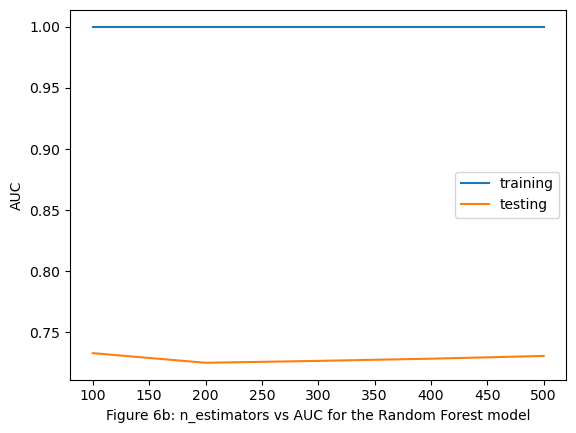

In [61]:
# code is taken from class lectures with a slight modification of adding the pos_label to correspond to graduating
(line_1,) = plt.plot(n_estimators, tr_auc, label="training")
(line_2,) = plt.plot(n_estimators, tst_auc, label="testing")
plt.legend(handles=[line_1, line_2])
plt.ylabel("AUC")
plt.xlabel("Figure 6b: n_estimators vs AUC for the Random Forest model")

Text(0.5, 0, 'Figure 7: Tree Depth vs Accuracy for the Random Forest model')

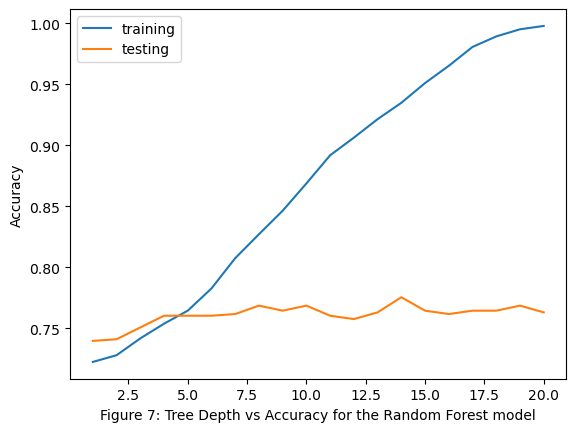

In [62]:
# code is taken from class lectures with a slight modification of adding the pos_label to correspond to graduating
max_depths = np.linspace(1, 20, 20, endpoint=True).astype(int)

tr_accuracy = []
tst_accuracy = []

tr_auc = []
tst_auc = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth)
    rf.fit(X_train, y_train)
    tr_pred = rf.predict(X_train)
    tr_accuracy.append(accuracy_score(y_train, tr_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(
        y_train, tr_pred, pos_label=2
    )
    roc_auc_tr = auc(false_positive_rate, true_positive_rate)
    tr_auc.append(roc_auc_tr)

    tst_pred = rf.predict(X_test)
    tst_accuracy.append(accuracy_score(y_test, tst_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(
        y_test, tst_pred, pos_label=2
    )
    roc_auc_tst = auc(false_positive_rate, true_positive_rate)
    tst_auc.append(roc_auc_tst)

(line_1,) = plt.plot(max_depths, tr_accuracy, label="training")
(line_2,) = plt.plot(max_depths, tst_accuracy, label="testing")
plt.legend(handles=[line_1, line_2])
plt.ylabel("Accuracy")
plt.xlabel("Figure 7: Tree Depth vs Accuracy for the Random Forest model")

Text(0.5, 0, 'Figure 8: Max Features vs Accuracy for the Random Forest model')

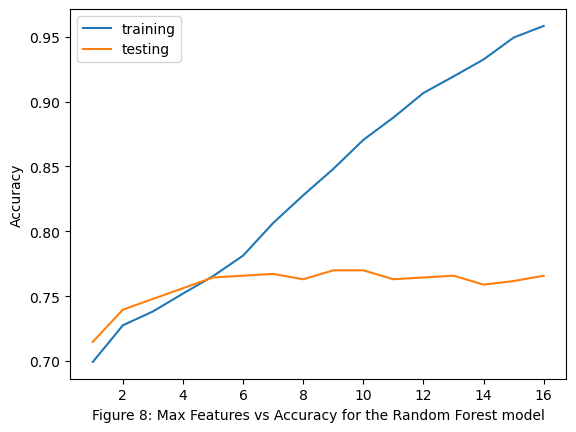

In [63]:
# code is taken from class lectures with a slight modification of adding the pos_label to correspond to graduating
max_features = list(range(1, X_train.shape[1]))

tr_accuracy = []
tst_accuracy = []

tr_auc = []
tst_auc = []
for i in max_features:
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(X_train, y_train)
    tr_pred = rf.predict(X_train)
    tr_accuracy.append(accuracy_score(y_train, tr_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(
        y_train, tr_pred, pos_label=2
    )
    roc_auc_tr = auc(false_positive_rate, true_positive_rate)
    tr_auc.append(roc_auc_tr)

    tst_pred = rf.predict(X_test)
    tst_accuracy.append(accuracy_score(y_test, tst_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(
        y_test, tst_pred, pos_label=2
    )
    roc_auc_tst = auc(false_positive_rate, true_positive_rate)
    tst_auc.append(roc_auc_tst)

(line_1,) = plt.plot(max_features, tr_accuracy, label="training")
(line_2,) = plt.plot(max_features, tst_accuracy, label="testing")
plt.legend(handles=[line_1, line_2])
plt.ylabel("Accuracy")
plt.xlabel("Figure 8: Max Features vs Accuracy for the Random Forest model")

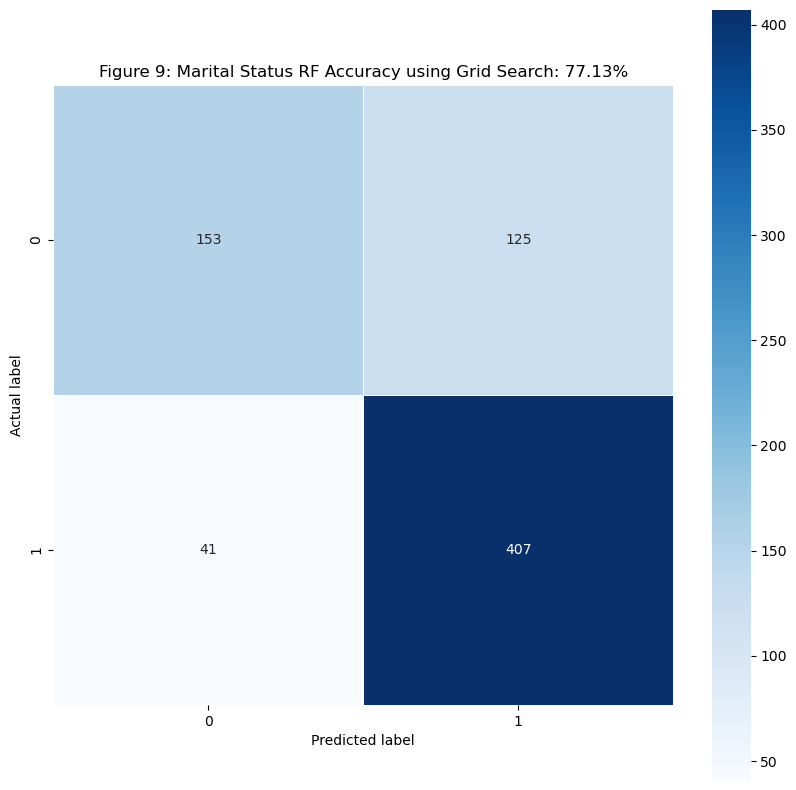

In [64]:
# Hyperparameter Tuning  helped the accuracy very little
# GRID SEARCH parameters found by executing function in lecture materials then using some of the values above which yielded the following:

rf_grid = RandomForestClassifier(
    random_state=1,
    bootstrap=True,
    criterion="entropy",
    max_depth=11,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=500,
)
rf_grid.fit(X_train_rf_reduced, y_train_rf_reduced)
y_pred_marital_status_rf3 = rf_grid.predict(X_test_rf_reduced)

# create a Marital Status heatmap with Random Forest Hyperparameter Tuning
create_confusion_matrix_visual(
    y_test_rf_reduced,
    y_pred_marital_status_rf3,
    rf_grid,
    "Marital Status RF Accuracy using Grid Search",
    X_test_rf_reduced,
    color="Blues",
    figure="Figure 9: ",
)

#### Q1 Highest Accuracy Decision Tree Variable Set

In [65]:
q1_dt_accuracy = "74.24%"
q1_dt_title = "Martial Status Decision Tree model with accuracy " + q1_dt_accuracy
q1_dt_x_test = X_test
q1_dt_y_test = y_test
q1_dt_y_pred = y_pred_marital_status_dt3
q1_dt = dt_grid
q1_dt_x = df_dt_marital_status_X_feature_importance
q1_dt_y = target_marital_status

#### Q1 Highest Accuracy Random Forest Variable Set

In [66]:
q1_rf_accuracy = "77.13%"
q1_rf_title = "Marital Status Random Forest model with accuracy " + q1_rf_accuracy
q1_rf_x_test = X_test_rf_reduced
q1_rf_y_test = y_test_rf_reduced
q1_rf_y_pred = y_pred_marital_status_rf3
q1_rf = rf_grid
q1_rf_x = df_marital_status_X_feature_importance
q1_rf_y = target_marital_status

### Modeling for Q2: International or Domestic Students

In [67]:
# Preparing the data for Question 2: International
target_international = df_international_correlation["Target"]
df_international_X = df_international_correlation.copy()
df_international_X = df_international_X.drop("Target", axis=1)

X = df_international_X
y = target_international

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (2904, 17)
Testing split input-  (726, 17)


In [68]:
# Create the tree with default parameters
DT_international = DecisionTreeClassifier(random_state=2)
DT_international.fit(X_train, y_train)

# Run the predictions
y_pred_international = DT_international.predict(X_test)
print(
    "Classification report (International) - \n",
    classification_report(y_test, y_pred_international),
)

Classification report (International) - 
               precision    recall  f1-score   support

           0       0.56      0.60      0.58       285
           2       0.73      0.70      0.72       441

    accuracy                           0.66       726
   macro avg       0.65      0.65      0.65       726
weighted avg       0.67      0.66      0.66       726



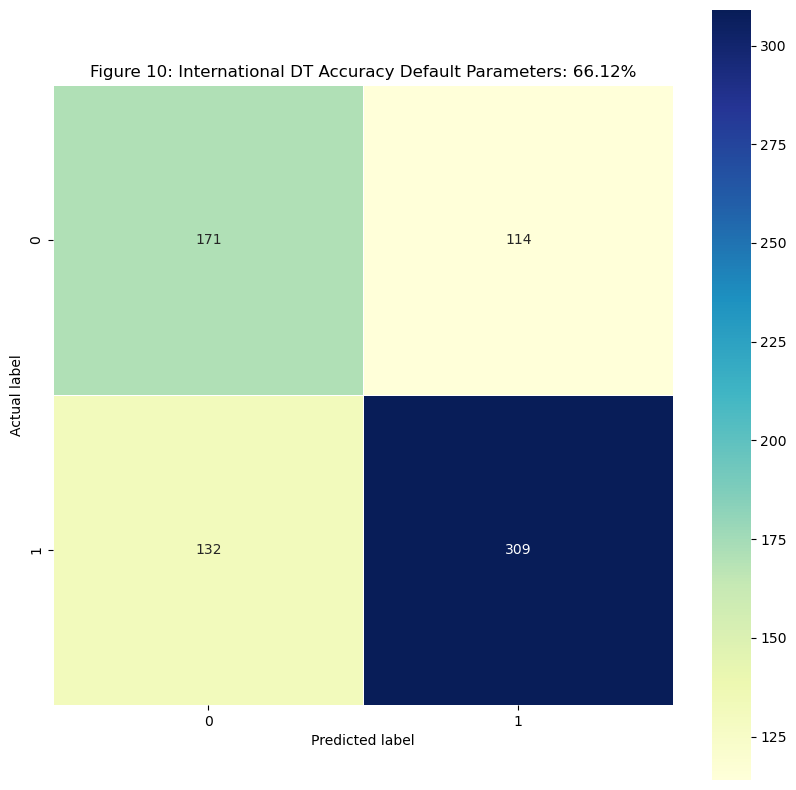

In [69]:
# create an Internatinal Student heatmap with default Decision Tree parameters
create_confusion_matrix_visual(
    y_test,
    y_pred_international,
    DT_international,
    "International DT Accuracy Default Parameters",
    X_test,
    color="YlGnBu",
    figure="Figure 10: ",
)

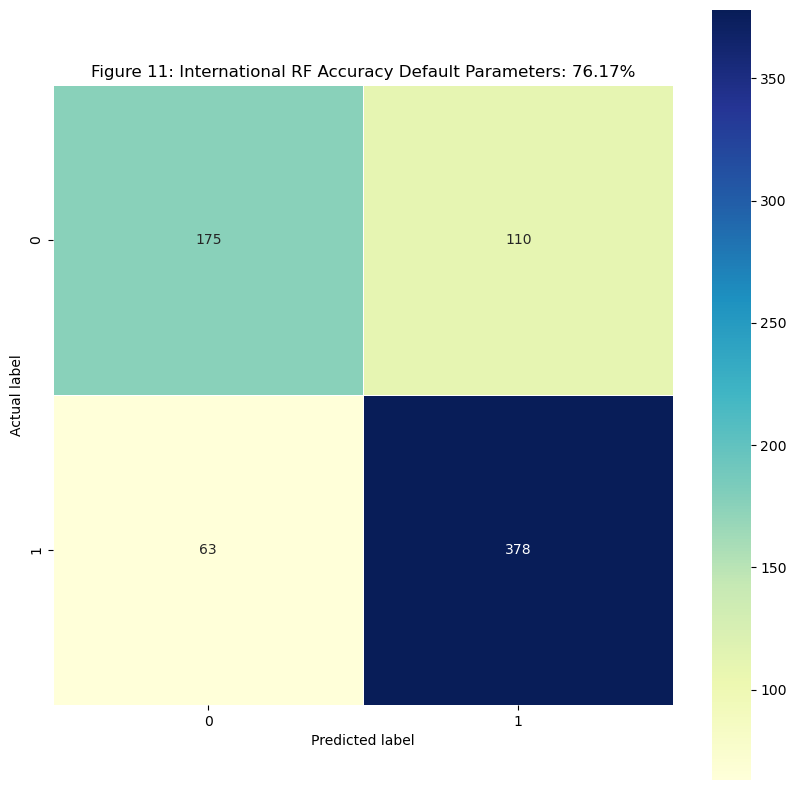

In [70]:
# Create an International Student Random forest classifier

rf_international = RandomForestClassifier(random_state=2)
rf_international.fit(X_train, y_train)  # with default settings
y_pred_international_rf = rf_international.predict(X_test)

# create an International Student heatmap with default Random Forest parameters
create_confusion_matrix_visual(
    y_test,
    y_pred_international_rf,
    rf_international,
    "International RF Accuracy Default Parameters",
    X_test,
    color="YlGnBu",
    figure="Figure 11: ",
)

In [71]:
# tune the International Student decision tree using feature importance
feature_importances = display_feature_importance(DT_international, X_train)
feature_importances

importance
Tuition_fees_up_to_date         0.192833
Admission_grade                 0.175394
Course                          0.098600
Previous_qualification_grade    0.093753
Application_mode                0.077847
Mother's_occupation             0.070720
Father's_occupation             0.062809
Mother's_qualification          0.062484
Father's_qualification          0.052754
Application_order               0.034494
Marital_status                  0.021311
Previous_qualification          0.018908
Displaced                       0.016385
Debtor                          0.013185
Daytime/evening_attendance      0.004990
International                   0.002240
Educational_special_needs       0.001293

In [72]:
# Removing any of the coulumns for DT improved the accuracy
df_dt_international_X_feature_importance = df_international_X.loc[
    :,
    df_international_X.columns.drop(
        [
            "Educational_special_needs",
            "Daytime/evening_attendance",
            "Previous_qualification",
        ]
    ),
]
df_dt_international_X_feature_importance

Marital_status  Application_mode  Application_order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Previous_qualification_grade  Mother's_qualification  \
0                            122.0                      19   
1                            160.0                       1   
2                            122.0                      37   
3                            122.0                      38   
4                            100.0                      37   
...                            ...                     ...   
4419                         125.0                       1   
4420                         120.0                       1   
4421                         154.0                      37   
4422                         180.0                      37   
4423                         152.0                      38   

      Father's_qualification  Mother's_occupation  Father's_occupation  \
0                         12                    5                    9   
1                          3                    3                    3   
2                         37                    9                    9   
3                         37                    5                    3   
4                         38                    9                    9   
...                      ...                  ...                  ...   
4419                       1                    5                    4   
4420                       1                    9                    9   
4421                      37                    9                    9   
4422                      37                    7                    4   
4423                      37                    5                    9   

      Admission_grade  Displaced  Debtor  Tuition_fees_up_to_date  \
0               127.3          1       0                        1   
1               142.5          1       0                        0   
2               124.8          1       0                        0   
3               119.6          1       0                        1   
4               141.5          0       0                        1   
...               ...        ...     ...                      ...   
4419            122.2          0       0                        1   
4420            119.0          1       1                        0   
4421            149.5          1       0                        1   
4422            153.8          1       0                        1   
4423            152.0          1       0                        1   

      International  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
4419              0  
4420              1  
4421              0  
4422              0  
4423              1  

[3630 rows x 14 columns]

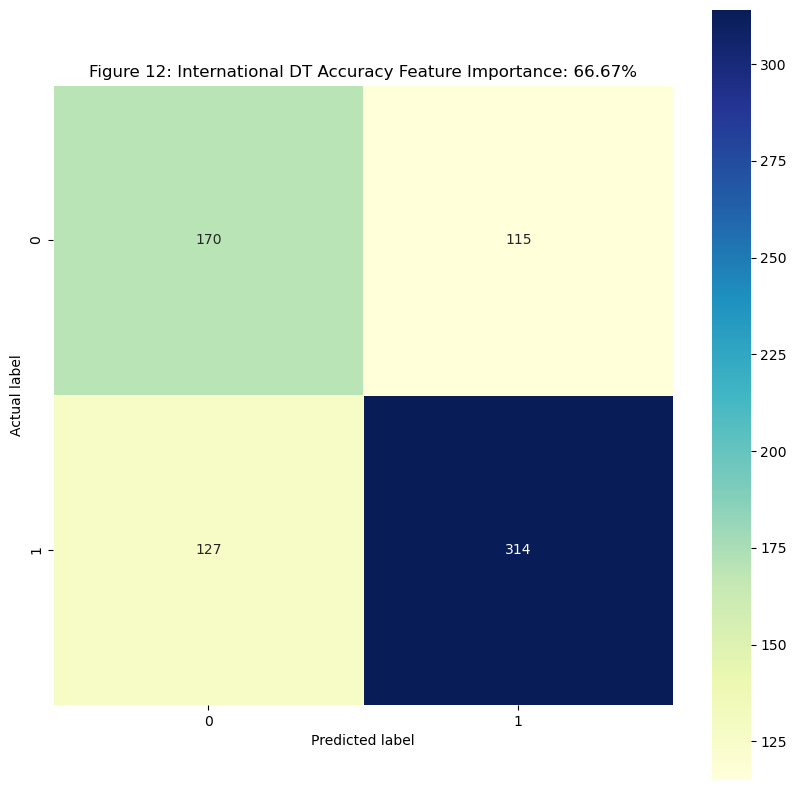

In [73]:
# get the reduced data based on feature importance for training and testing
X_dt_reduced = df_dt_international_X_feature_importance
X_train_dt_reduced, X_test_dt_reduced, y_train_dt_reduced, y_test_dt_reduced = (
    train_test_split(X_dt_reduced, y, test_size=0.2, random_state=2)
)

# train the model
DT_international.fit(X_train_dt_reduced, y_train_dt_reduced)
y_pred_international_dt2 = DT_international.predict(X_test_dt_reduced)

# create an International student heatmap with Decision Tree Feature Importance parameters
create_confusion_matrix_visual(
    y_test_dt_reduced,
    y_pred_international_dt2,
    DT_international,
    "International DT Accuracy Feature Importance",
    X_test_dt_reduced,
    color="YlGnBu",
    figure="Figure 12: ",
)

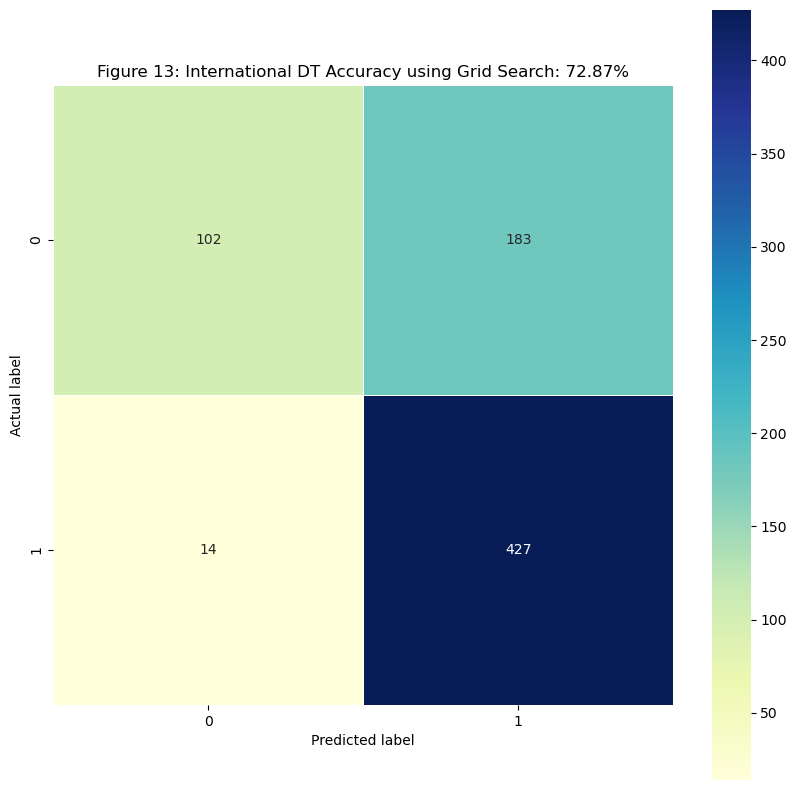

In [74]:
# Hyperparameter Tuning improved DT accuracy
# GRID SEARCH parameters found by executing function in lecture materials then using some of the values above which yielded the following:

dt_grid = DecisionTreeClassifier(
    random_state=2,
    criterion="gini",
    max_depth=4,
    max_features="sqrt",
    min_samples_leaf=5,
    min_samples_split=2,
)
dt_grid.fit(X_train_dt_reduced, y_train_dt_reduced)
y_pred_international_dt3 = dt_grid.predict(X_test_dt_reduced)

# create a Marital Status heatmap with Decision Tree Hyperparameter Tuning
create_confusion_matrix_visual(
    y_test_dt_reduced,
    y_pred_international_dt3,
    dt_grid,
    "International DT Accuracy using Grid Search",
    X_test_dt_reduced,
    color="YlGnBu",
    figure="Figure 13: ",
)

In [75]:
# Tune International random forest using feature importance
feature_importances = display_feature_importance(rf_international, X_train)
feature_importances

importance
Admission_grade                 0.141228
Tuition_fees_up_to_date         0.137731
Previous_qualification_grade    0.112620
Course                          0.108656
Father's_occupation             0.081301
Application_mode                0.079695
Mother's_occupation             0.070975
Mother's_qualification          0.057929
Father's_qualification          0.056398
Debtor                          0.037063
Application_order               0.035626
Previous_qualification          0.026746
Displaced                       0.021311
Marital_status                  0.016025
Daytime/evening_attendance      0.009283
International                   0.004234
Educational_special_needs       0.003178

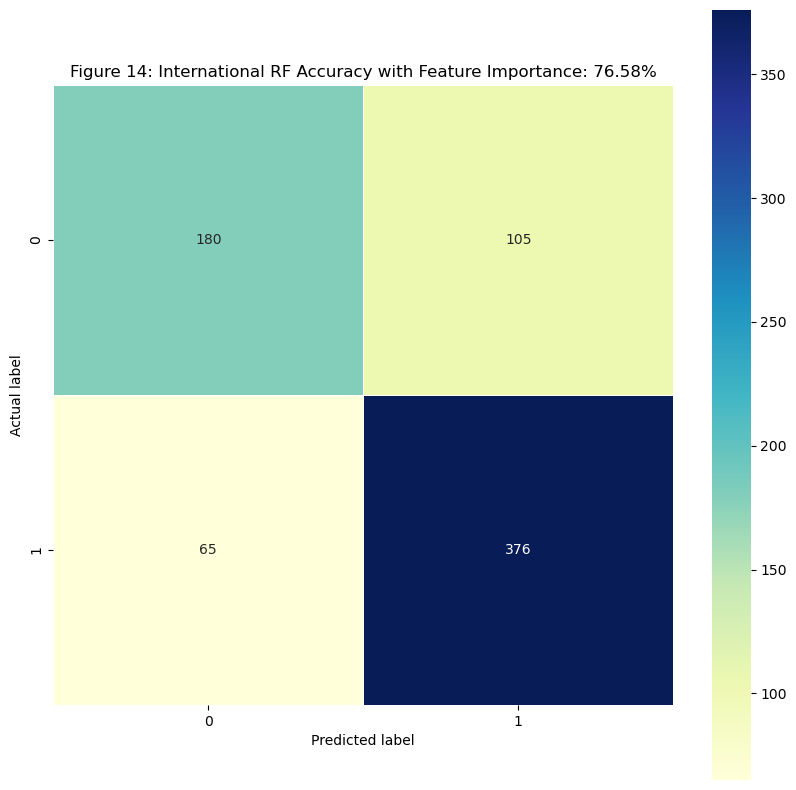

In [76]:
# Found the optimum colunns to keep using trial and error with the lowest importance values improve accuracy

df_international_X_feature_importance = df_international_X.loc[
    :, df_international_X.columns.drop(["Application_order", "Mother's_occupation"])
]
df_international_X_feature_importance

# get the reduced data based on feature importance for training and testing
X_rf_reduced = df_international_X_feature_importance
X_train_rf_reduced, X_test_rf_reduced, y_train_rf_reduced, y_test_rf_reduced = (
    train_test_split(X_rf_reduced, y, test_size=0.2, random_state=2)
)

# train the model
rf_international.fit(X_train_rf_reduced, y_train_rf_reduced)
y_pred_international_rf2 = rf_international.predict(X_test_rf_reduced)

# create an International student heatmap with Random Forest Feature Importance parameters
create_confusion_matrix_visual(
    y_test_rf_reduced,
    y_pred_international_rf2,
    rf_international,
    "International RF Accuracy with Feature Importance",
    X_test_rf_reduced,
    color="YlGnBu",
    figure="Figure 14: ",
)

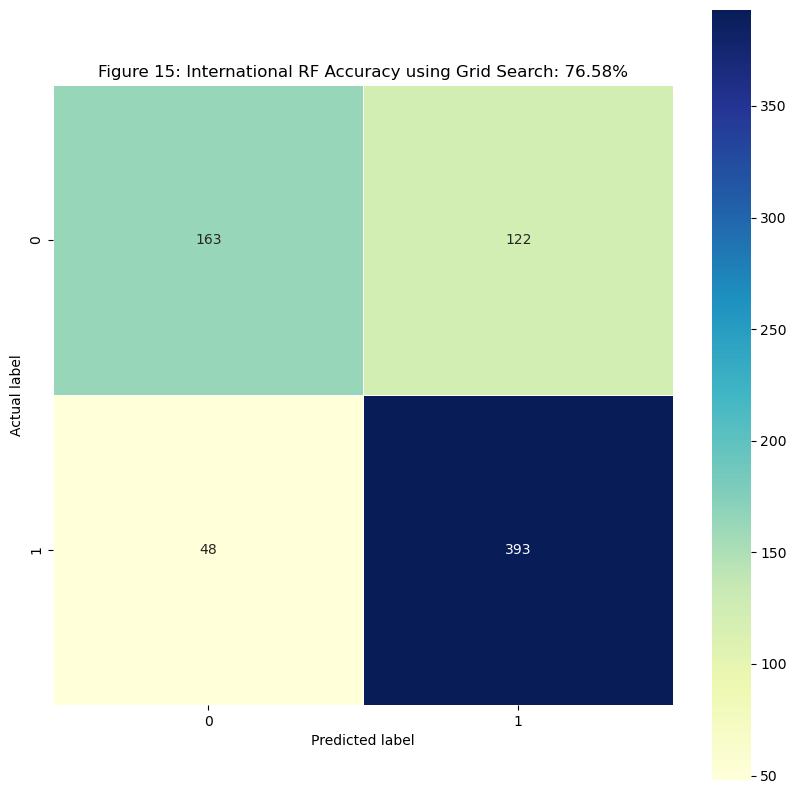

In [77]:
# DID NOT IMPROVE ACCURACY
# GRID SEARCH parameters found by executing function in lecture materials then using some of the values above which yielded the following:

rf_grid = RandomForestClassifier(
    random_state=2,
    bootstrap=True,
    criterion="entropy",
    max_depth=15,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=500,
)
rf_grid.fit(X_train_rf_reduced, y_train_rf_reduced)
y_pred_international_rf3 = rf_grid.predict(X_test_rf_reduced)

# create a International Student heatmap with Random Forest Hyperparameter Tuning
create_confusion_matrix_visual(
    y_test_rf_reduced,
    y_pred_international_rf3,
    rf_grid,
    "International RF Accuracy using Grid Search",
    X_test_rf_reduced,
    color="YlGnBu",
    figure="Figure 15: ",
)

#### Q2 Highest Accuracy Decision Tree Variable Set

In [78]:
q2_dt_accuracy = "72.87%"
q2_dt_title = (
    "International Student Decision Tree model with accuracy " + q2_dt_accuracy
)
q2_dt_x_test = X_test_dt_reduced
q2_dt_y_test = y_test_dt_reduced
q2_dt_y_pred = y_pred_international_dt3
q2_dt = dt_grid
q2_dt_x = df_dt_international_X_feature_importance
q2_dt_y = target_international

#### Q2 Highest Accuracy Random Forest Variable Set

In [79]:
q2_rf_accuracy = "76.58%"
q2_rf_title = (
    "International Student Random Forest model with accuracy " + q2_rf_accuracy
)
q2_rf_x_test = X_test_rf_reduced
q2_rf_y_test = y_test_rf_reduced
q2_rf_y_pred = y_pred_international_rf3
q2_rf = rf_grid
q2_rf_x = df_international_X_feature_importance
q2_rf_y = target_international

### Modeling for Q3: Father's Qualifications

In [80]:
# Preparing the data for Question 3: Father's Qualitifications

target_parent_qualification = df_parent_qualifications_correlation["Target"]
df_parent_qualification_X = df_parent_qualifications_correlation.copy()
df_parent_qualification_X = df_parent_qualification_X.drop("Target", axis=1)

X = df_parent_qualification_X
y = target_parent_qualification

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (2904, 17)
Testing split input-  (726, 17)


In [81]:
# Create the tree with default parameters
DT_parent_qualifications = DecisionTreeClassifier(random_state=3)
DT_parent_qualifications.fit(X_train, y_train)

# Run the predictions
y_pred_parent_qualifications = DT_parent_qualifications.predict(X_test)
print(
    "Classification report (Parent Qualification) - \n",
    classification_report(y_test, y_pred_parent_qualifications),
)

Classification report (Parent Qualification) - 
               precision    recall  f1-score   support

           0       0.61      0.59      0.60       296
           2       0.72      0.74      0.73       430

    accuracy                           0.68       726
   macro avg       0.66      0.66      0.66       726
weighted avg       0.67      0.68      0.68       726



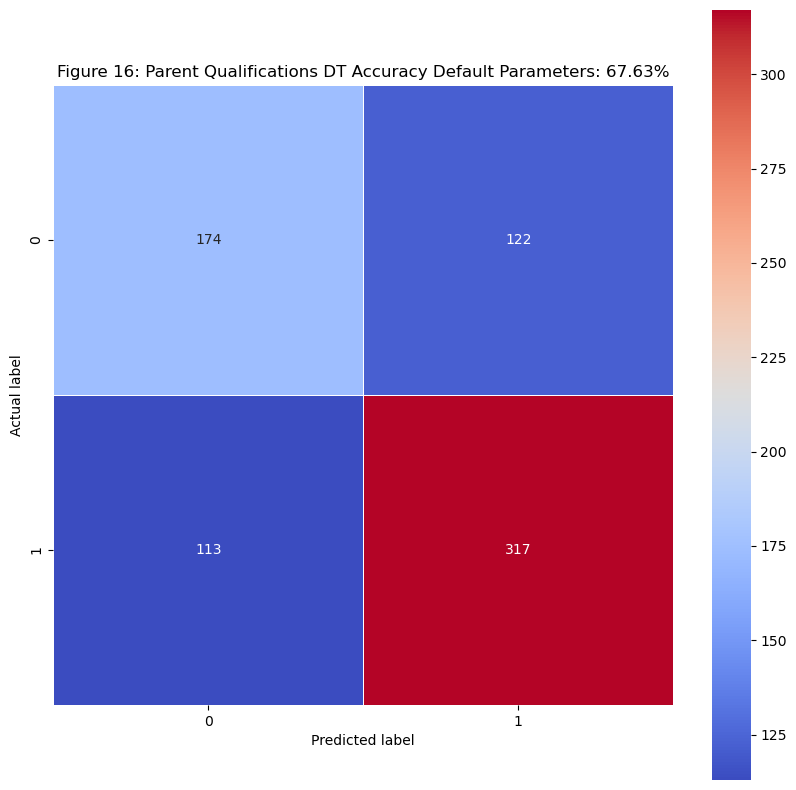

In [82]:
# create an Internatinal Student heatmap with default Decision Tree parameters
create_confusion_matrix_visual(
    y_test,
    y_pred_parent_qualifications,
    DT_parent_qualifications,
    "Parent Qualifications DT Accuracy Default Parameters",
    X_test,
    color="coolwarm",
    figure="Figure 16: ",
)

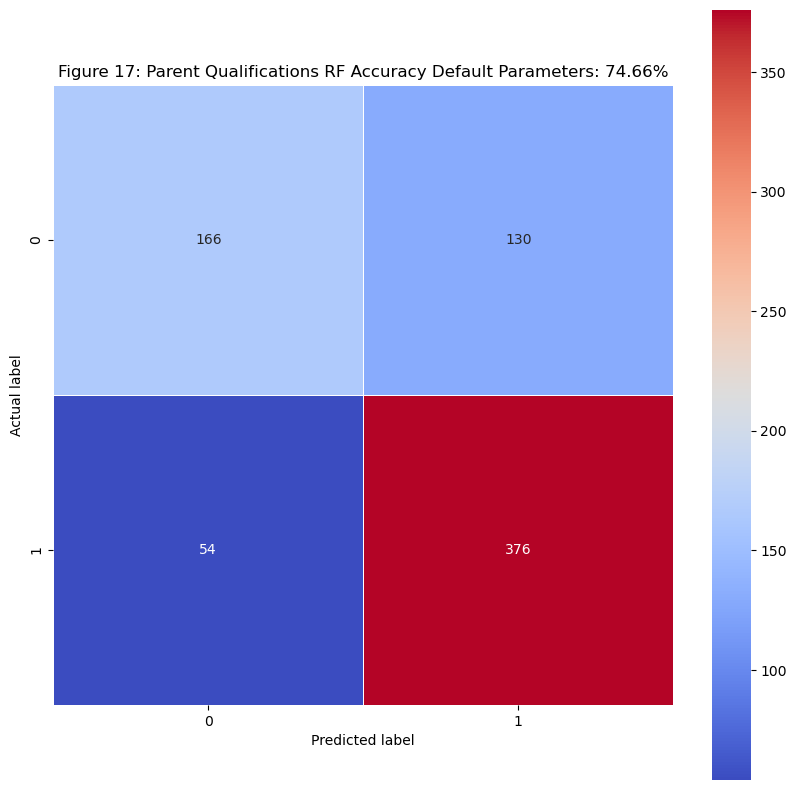

In [83]:
# Create a Parent Qualification Random forest classifier based on lecture's from Week 5

rf_parent_qualifications = RandomForestClassifier(random_state=3)
rf_parent_qualifications.fit(X_train, y_train)
y_pred_parent_qualifications_rf = rf_parent_qualifications.predict(X_test)

# create an International Student heatmap with default Random Forest parameters
create_confusion_matrix_visual(
    y_test,
    y_pred_parent_qualifications_rf,
    rf_parent_qualifications,
    "Parent Qualifications RF Accuracy Default Parameters",
    X_test,
    color="coolwarm",
    figure="Figure 17: ",
)

In [84]:
# tune the Parent Qualification decision tree using feature importance
feature_importances = display_feature_importance(DT_parent_qualifications, X_train)
feature_importances

importance
Tuition_fees_up_to_date         0.205744
Admission_grade                 0.157241
Previous_qualification_grade    0.118572
Course                          0.093904
Application_mode                0.076871
Father's_occupation             0.072622
Mother's_occupation             0.064933
Mother's_qualification          0.061069
Application_order               0.046867
Father's_qualification          0.031945
Previous_qualification          0.020580
Displaced                       0.017183
Marital_status                  0.014179
Debtor                          0.013002
Nationality                     0.002738
Educational_special_needs       0.001843
Daytime/evening_attendance      0.000707

In [85]:
# Removing any of the coulumns for DT improved the accuracy

df_dt_parent_qualification_X_feature_importance = df_parent_qualification_X.loc[
    :, df_parent_qualification_X.columns.drop(["Educational_special_needs"])
]
df_dt_parent_qualification_X_feature_importance
# "Daytime/evening_attendance", 'Educational_special_needs',

Marital_status  Application_mode  Application_order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening_attendance  Previous_qualification  \
0                              1                       1   
1                              1                       1   
2                              1                       1   
3                              1                       1   
4                              0                       1   
...                          ...                     ...   
4419                           1                       1   
4420                           1                       1   
4421                           1                       1   
4422                           1                       1   
4423                           1                       1   

      Previous_qualification_grade  Nationality  Mother's_qualification  \
0                            122.0            1                      19   
1                            160.0            1                       1   
2                            122.0            1                      37   
3                            122.0            1                      38   
4                            100.0            1                      37   
...                            ...          ...                     ...   
4419                         125.0            1                       1   
4420                         120.0          105                       1   
4421                         154.0            1                      37   
4422                         180.0            1                      37   
4423                         152.0           22                      38   

      Father's_qualification  Mother's_occupation  Father's_occupation  \
0                         12                    5                    9   
1                          3                    3                    3   
2                         37                    9                    9   
3                         37                    5                    3   
4                         38                    9                    9   
...                      ...                  ...                  ...   
4419                       1                    5                    4   
4420                       1                    9                    9   
4421                      37                    9                    9   
4422                      37                    7                    4   
4423                      37                    5                    9   

      Admission_grade  Displaced  Debtor  Tuition_fees_up_to_date  
0               127.3          1       0                        1  
1               142.5          1       0                        0  
2               124.8          1       0                        0  
3               119.6          1       0                        1  
4               141.5          0       0                        1  
...               ...        ...     ...                      ...  
4419            122.2          0       0                        1  
4420            119.0          1       1                        0  
4421            149.5          1       0              

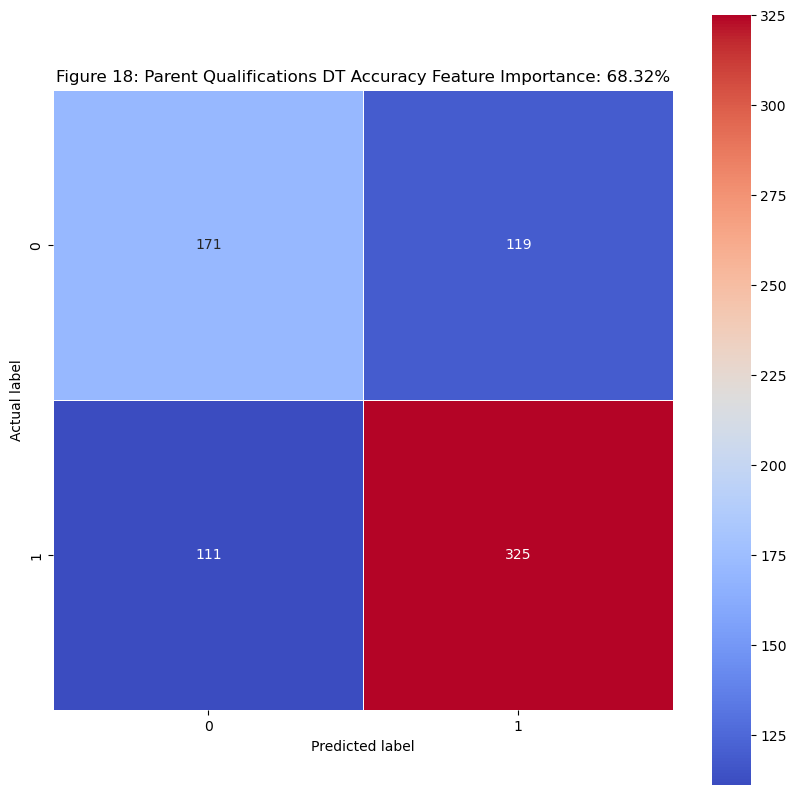

In [86]:
# get the reduced data based on feature importance for training and testing
X_dt_reduced = df_dt_parent_qualification_X_feature_importance
X_train_dt_reduced, X_test_dt_reduced, y_train_dt_reduced, y_test_dt_reduced = (
    train_test_split(X_dt_reduced, y, test_size=0.2, random_state=3)
)

# train the model
DT_parent_qualifications.fit(X_train_dt_reduced, y_train_dt_reduced)
y_pred_parent_qualifications_dt2 = DT_parent_qualifications.predict(X_test_dt_reduced)

# create a Parent Qualification heatmap with Decision Tree Feature Importance parameters
create_confusion_matrix_visual(
    y_test_dt_reduced,
    y_pred_parent_qualifications_dt2,
    DT_parent_qualifications,
    "Parent Qualifications DT Accuracy Feature Importance",
    X_test_dt_reduced,
    color="coolwarm",
    figure="Figure 18: ",
)

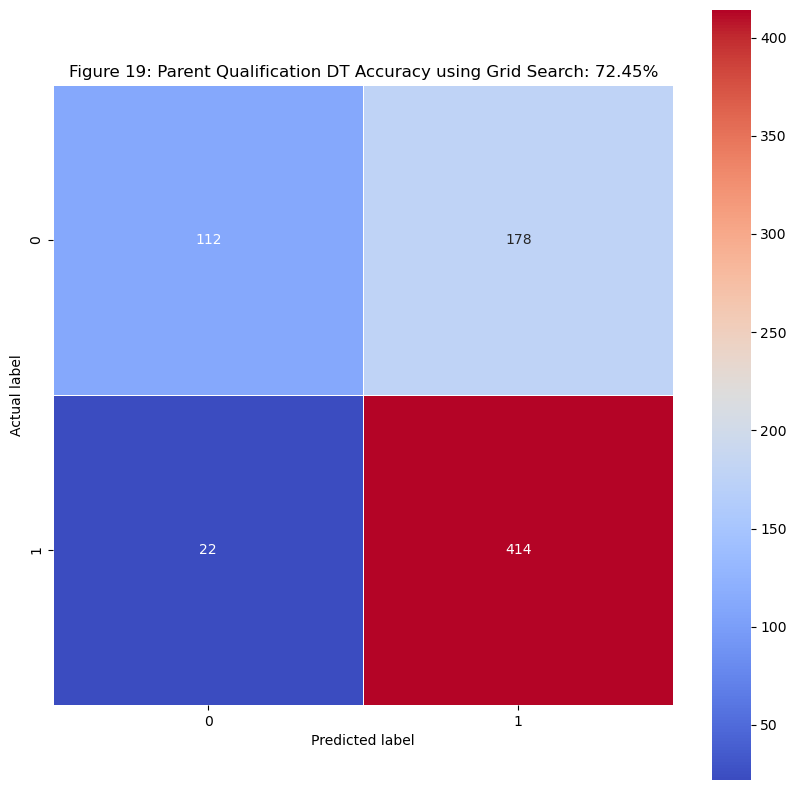

In [87]:
# Hyperparameter Tuning improved DT accuracy
# GRID SEARCH parameters found by executing function in lecture materials then using some of the values above which yielded the following:

dt_grid = DecisionTreeClassifier(
    random_state=3,
    criterion="gini",
    max_depth=4,
    max_features="sqrt",
    min_samples_leaf=5,
    min_samples_split=2,
)
dt_grid.fit(X_train_dt_reduced, y_train_dt_reduced)
y_pred_parent_qualifications_dt3 = dt_grid.predict(X_test_dt_reduced)

# create a Marital Status heatmap with Decision Tree Hyperparameter Tuning
create_confusion_matrix_visual(
    y_test_dt_reduced,
    y_pred_parent_qualifications_dt3,
    dt_grid,
    "Parent Qualification DT Accuracy using Grid Search",
    X_test_dt_reduced,
    color="coolwarm",
    figure="Figure 19: ",
)

In [88]:
# Tune Parent Qualifications random forest using feature importance
feature_importances = display_feature_importance(rf_parent_qualifications, X_train)
feature_importances

importance
Tuition_fees_up_to_date         0.154868
Admission_grade                 0.140338
Previous_qualification_grade    0.110018
Course                          0.104140
Application_mode                0.081657
Father's_occupation             0.078135
Mother's_occupation             0.069098
Mother's_qualification          0.058279
Father's_qualification          0.054359
Debtor                          0.035869
Application_order               0.034734
Previous_qualification          0.023860
Displaced                       0.020746
Marital_status                  0.016416
Daytime/evening_attendance      0.008699
Nationality                     0.006279
Educational_special_needs       0.002505

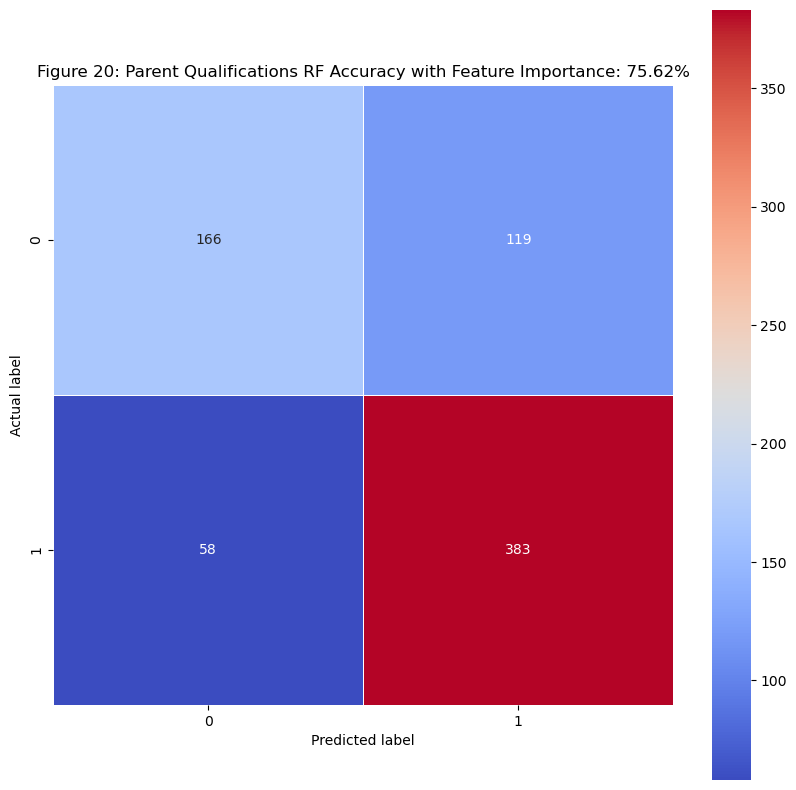

In [89]:
# Found the optimum colunns to keep using trial and error with the lowest importance values improve accuracy

df_parent_qualification_X_feature_importance = df_parent_qualification_X.loc[
    :, df_parent_qualification_X.columns.drop(["Mother's_occupation"])
]
df_parent_qualification_X_feature_importance

# get the reduced data based on feature importance for training and testing
X_rf_reduced = df_parent_qualification_X_feature_importance
X_train_rf_reduced, X_test_rf_reduced, y_train_rf_reduced, y_test_rf_reduced = (
    train_test_split(X_rf_reduced, y, test_size=0.2, random_state=2)
)

# train the model
rf_parent_qualifications.fit(X_train_rf_reduced, y_train_rf_reduced)
y_pred_parent_qualifications_rf2 = rf_parent_qualifications.predict(X_test_rf_reduced)

# create an International student heatmap with Random Forest Feature Importance parameters
create_confusion_matrix_visual(
    y_test_rf_reduced,
    y_pred_parent_qualifications_rf2,
    rf_parent_qualifications,
    "Parent Qualifications RF Accuracy with Feature Importance",
    X_test_rf_reduced,
    color="coolwarm",
    figure="Figure 20: ",
)

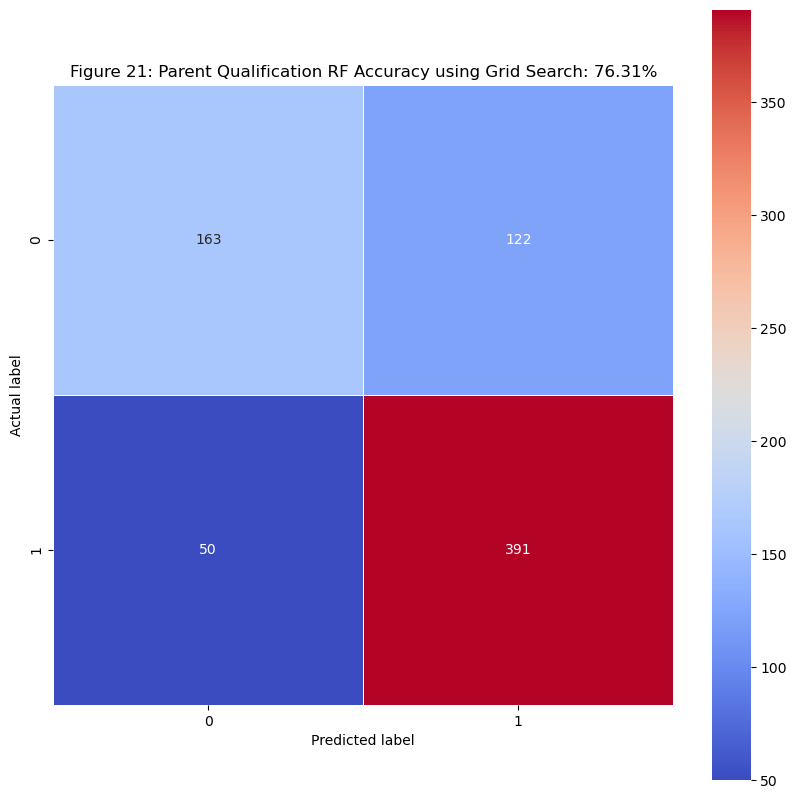

In [90]:
# GRID SEARCH parameters found by executing function in lecture materials then using some of the values above which yielded the following:

rf_grid = RandomForestClassifier(
    random_state=3,
    bootstrap=True,
    criterion="entropy",
    max_depth=15,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=500,
)
rf_grid.fit(X_train_rf_reduced, y_train_rf_reduced)
y_pred_parent_qualifications_rf3 = rf_grid.predict(X_test_rf_reduced)

# create a Parent Qualification heatmap with Random Forest Hyperparameter Tuning
create_confusion_matrix_visual(
    y_test_rf_reduced,
    y_pred_parent_qualifications_rf3,
    rf_grid,
    "Parent Qualification RF Accuracy using Grid Search",
    X_test_rf_reduced,
    color="coolwarm",
    figure="Figure 21: ",
)

#### Q3 Highest Accuracy Decision Tree Variable Set

In [91]:
# q3_dt_x_train = X_train_dt_reduced
# q3_dt_y_train = y_train_dt_reduced
q3_dt_accuracy = "72.45%"
q3_dt_title = "Parent Qualification Decision Tree model with accuracy " + q3_dt_accuracy
q3_dt_x_test = X_test_dt_reduced
q3_dt_y_test = y_test_dt_reduced
q3_dt_y_pred = y_pred_parent_qualifications_dt3
q3_dt = dt_grid
q3_dt_x = df_dt_parent_qualification_X_feature_importance
q3_dt_y = target_parent_qualification

# print('Accuracy Score:' + str(accuracy_score(q3_dt_y_test, q3_dt_y_pred)))
# print(f'Model Score:' + str(q3_dt.score(q3_dt_x_test.values, q3_dt_y_test.values)))

#### Q3 Highest Accuracy Random Forest Variable Set

In [92]:
# q3_rf_x_train = X_train_rf_reduced
# q3_rf_y_train = y_train_rf_reduced
q3_rf_accuracy = "76.31%"
q3_rf_title = "Parent Qualification Random Forest model with accuracy " + q3_rf_accuracy
q3_rf_x_test = X_test_rf_reduced
q3_rf_y_test = y_test_rf_reduced
q3_rf_y_pred = y_pred_parent_qualifications_rf3
q3_rf = rf_grid
q3_rf_x = df_parent_qualification_X_feature_importance
q3_rf_y = target_parent_qualification

# print('Accuracy Score:' + str(accuracy_score(q3_rf_y_test, q3_rf_y_pred)))
# print(f'Model Score:' + str(q3_rf.score(q3_rf_x_test.values, q3_rf_y_test.values)))

### Modeling for Q4: Unemployment Rate

In [93]:
# Preparing the data for Question 4: Unemployment Rate
target_unemployment_rate = df_unemployment_rate_correlation["Target"]
df_unemployment_rate_X = df_unemployment_rate_correlation.copy()
df_unemployment_rate_X = df_unemployment_rate_X.drop("Target", axis=1)

X = df_unemployment_rate_X
y = target_unemployment_rate

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (2904, 18)
Testing split input-  (726, 18)


In [94]:
# Create the tree with default parameters
DT_unemployment_rate = DecisionTreeClassifier(random_state=4)
DT_unemployment_rate.fit(X_train, y_train)

# Run the predictions
y_pred_unemployment_rate = DT_unemployment_rate.predict(X_test)
print(
    "Classification report (Unemployment Rate) - \n",
    classification_report(y_test, y_pred_unemployment_rate),
)

Classification report (Unemployment Rate) - 
               precision    recall  f1-score   support

           0       0.56      0.62      0.59       274
           2       0.75      0.70      0.73       452

    accuracy                           0.67       726
   macro avg       0.66      0.66      0.66       726
weighted avg       0.68      0.67      0.67       726



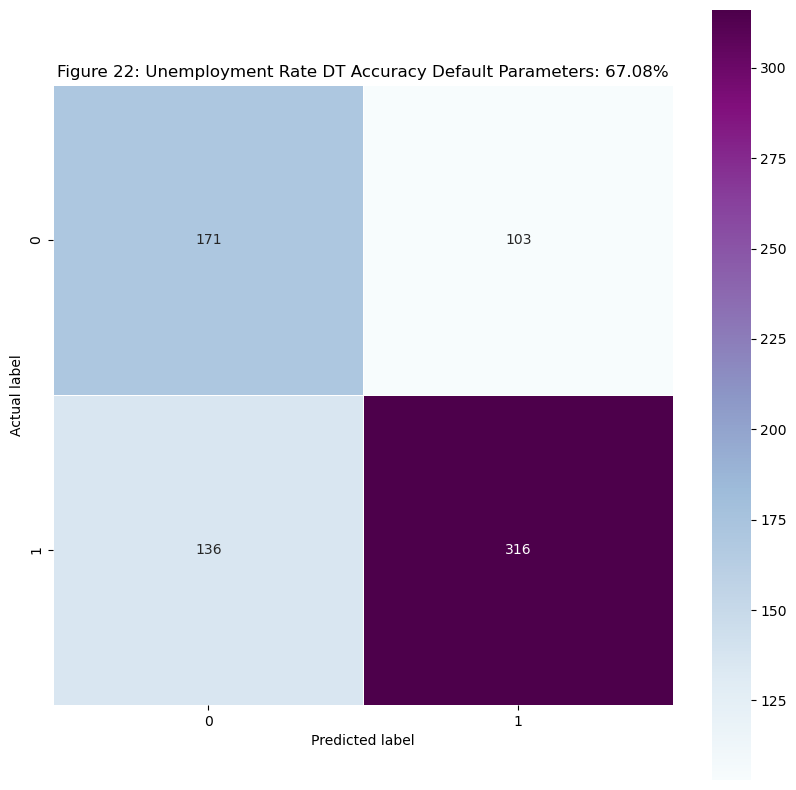

In [95]:
# create an Unemployment Rate heatmap with default Decision Tree parameters
create_confusion_matrix_visual(
    y_test,
    y_pred_unemployment_rate,
    DT_unemployment_rate,
    "Unemployment Rate DT Accuracy Default Parameters",
    X_test,
    color="BuPu",
    figure="Figure 22: ",
)

In [96]:
# Create a Random forest classifier based on lecture's from Week 5

rf_unemployment_rate = RandomForestClassifier(random_state=4)
rf_unemployment_rate.fit(X_train, y_train)
y_pred_unemployment_rate_rf = rf_unemployment_rate.predict(X_test)

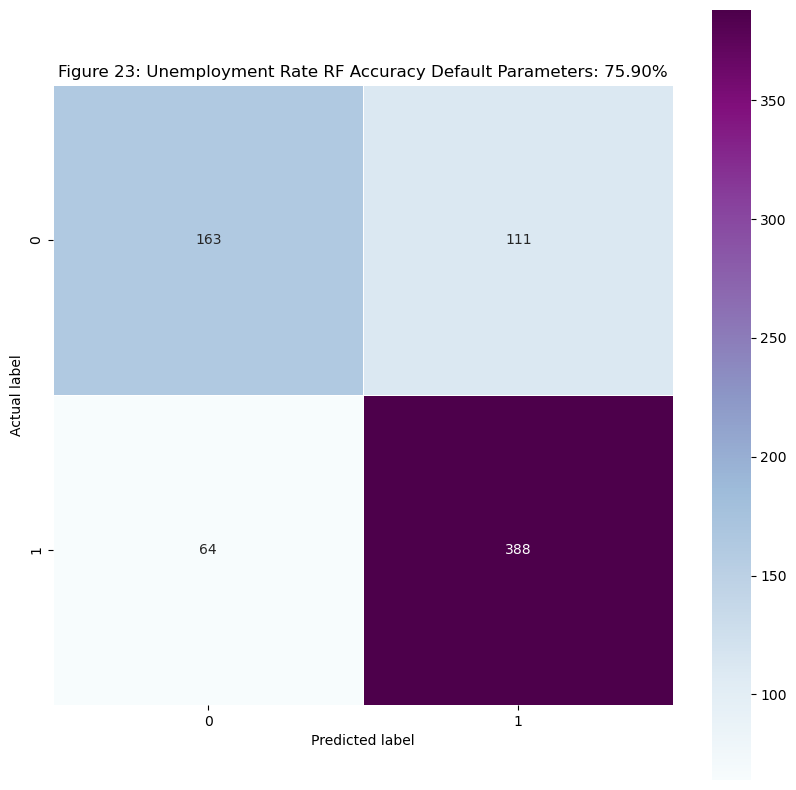

In [97]:
# create an Unemployment Rate heatmap with default Random Forest parameters
create_confusion_matrix_visual(
    y_test,
    y_pred_unemployment_rate_rf,
    rf_unemployment_rate,
    "Unemployment Rate RF Accuracy Default Parameters",
    X_test,
    color="BuPu",
    figure="Figure 23: ",
)

In [98]:
# tune the Unemployment Rate decision tree using feature importance
feature_importances = display_feature_importance(DT_unemployment_rate, X_train)
feature_importances

importance
Tuition_fees_up_to_date         0.189069
Admission_grade                 0.120256
Course                          0.103848
Unemployment rate               0.090996
Previous_qualification_grade    0.088787
Application_mode                0.087413
Father's_occupation             0.076219
Mother's_occupation             0.056517
Father's_qualification          0.040565
Mother's_qualification          0.035993
Application_order               0.030523
Displaced                       0.020862
Marital_status                  0.016053
Previous_qualification          0.015320
Debtor                          0.011161
Nationality                     0.007660
Daytime/evening_attendance      0.005063
Educational_special_needs       0.003696

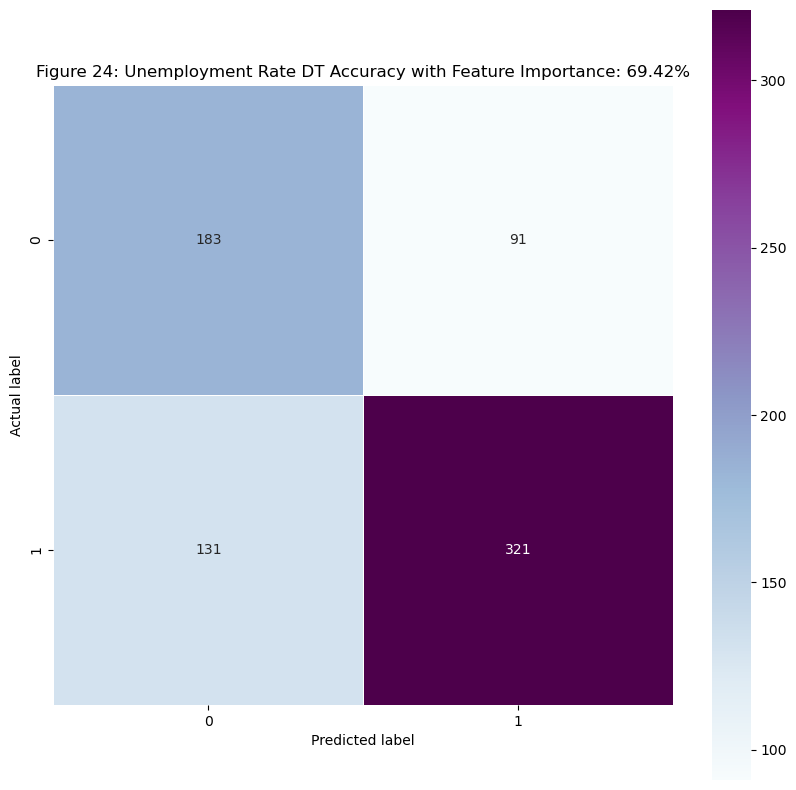

In [99]:
# Found the optimum colunns to keep using trial and error with the lowest importance values improve accuracy

df_dt_unemployment_rate_X_feature_importance = df_unemployment_rate_X.loc[
    :,
    df_unemployment_rate_X.columns.drop(
        [
            "Educational_special_needs",
            "Daytime/evening_attendance",
            "Nationality",
            "Debtor",
        ]
    ),
]
df_dt_unemployment_rate_X_feature_importance

# get the reduced data based on feature importance for training and testing
X_dt_reduced = df_dt_unemployment_rate_X_feature_importance
X_train_dt_reduced, X_test_dt_reduced, y_train_dt_reduced, y_test_dt_reduced = (
    train_test_split(X_dt_reduced, y, test_size=0.2, random_state=4)
)

# train the model
DT_unemployment_rate.fit(X_train_dt_reduced, y_train_dt_reduced)
y_pred_unemployment_rate_dt2 = DT_unemployment_rate.predict(X_test_dt_reduced)

# create an International student heatmap with Random Forest Feature Importance parameters
create_confusion_matrix_visual(
    y_test_dt_reduced,
    y_pred_unemployment_rate_dt2,
    DT_unemployment_rate,
    "Unemployment Rate DT Accuracy with Feature Importance",
    X_test_dt_reduced,
    color="BuPu",
    figure="Figure 24: ",
)

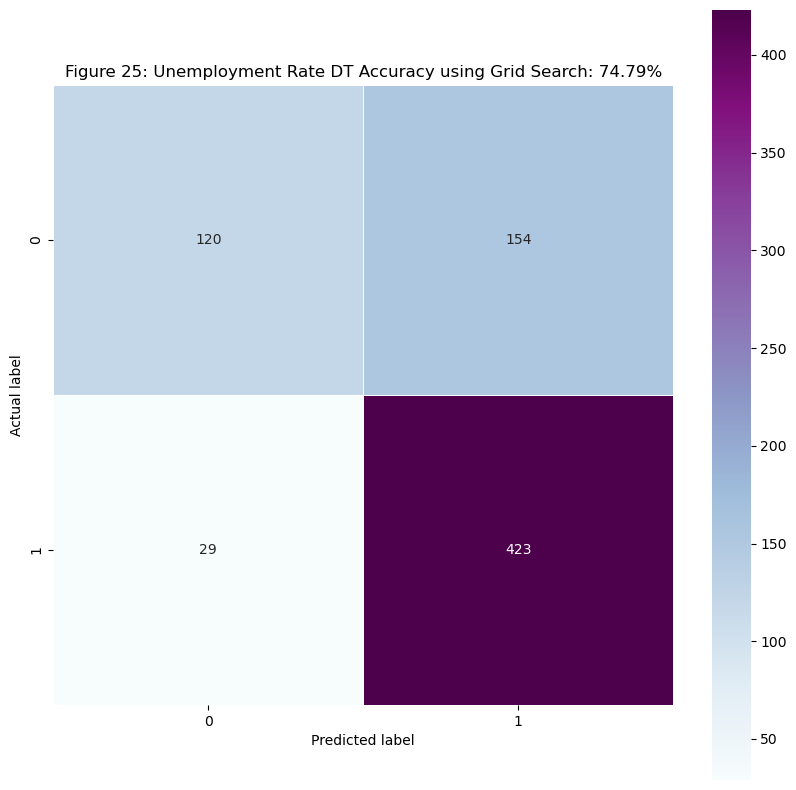

In [100]:
# Hyperparameter Tuning improved DT accuracy
# GRID SEARCH parameters found by executing function in lecture materials then using some of the values above which yielded the following:

dt_grid = DecisionTreeClassifier(
    random_state=4,
    criterion="gini",
    max_depth=4,
    max_features="sqrt",
    min_samples_leaf=5,
    min_samples_split=2,
)
dt_grid.fit(X_train_dt_reduced, y_train_dt_reduced)
y_pred_unemployment_rate_dt3 = dt_grid.predict(X_test_dt_reduced)

# create a Marital Status heatmap with Decision Tree Hyperparameter Tuning
create_confusion_matrix_visual(
    y_test_dt_reduced,
    y_pred_unemployment_rate_dt3,
    dt_grid,
    "Unemployment Rate DT Accuracy using Grid Search",
    X_test_dt_reduced,
    color="BuPu",
    figure="Figure 25: ",
)

#### Q4 Highest Accuracy Decision Tree Variable Set

In [101]:
# q4_dt_x_train = X_train_dt_reduced
# q4_dt_y_train = y_train_dt_reduced
q4_dt_accuracy = "74.79%"
q4_dt_title = "Unemployment Rate Decision Tree model with accuracy " + q4_dt_accuracy
q4_dt_x_test = X_test_dt_reduced
q4_dt_y_test = y_test_dt_reduced
q4_dt_y_pred = y_pred_unemployment_rate_dt3
q4_dt = dt_grid
q4_dt_x = df_dt_unemployment_rate_X_feature_importance
q4_dt_y = target_unemployment_rate

In [102]:
# Tune Unemployment Rate random forest using feature importance
feature_importances = display_feature_importance(rf_unemployment_rate, X_train)
feature_importances

importance
Tuition_fees_up_to_date         0.139064
Admission_grade                 0.121493
Previous_qualification_grade    0.101642
Course                          0.098764
Application_mode                0.077001
Unemployment rate               0.075522
Father's_occupation             0.075122
Mother's_occupation             0.067534
Father's_qualification          0.050196
Mother's_qualification          0.050082
Debtor                          0.037039
Application_order               0.030588
Previous_qualification          0.023332
Displaced                       0.020370
Marital_status                  0.014996
Daytime/evening_attendance      0.008864
Nationality                     0.005690
Educational_special_needs       0.002700

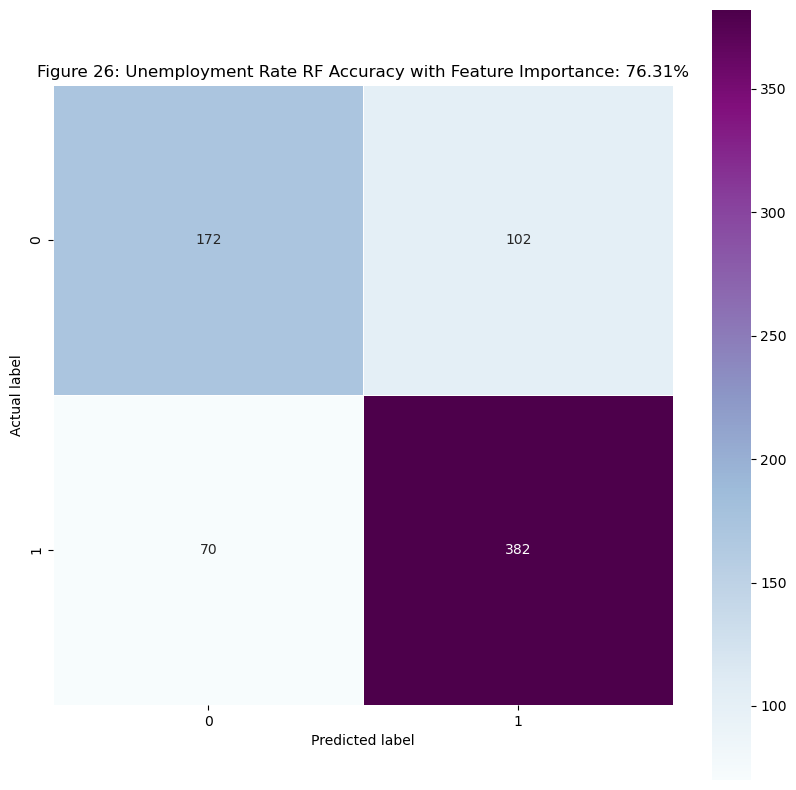

In [103]:
# Found the optimum colunns to keep using trial and error with the lowest importance values improve accuracy
df_unemployment_rate_X_feature_importance = df_unemployment_rate_X.loc[
    :,
    df_unemployment_rate_X.columns.drop(
        ["Educational_special_needs", "Marital_status"]
    ),
]
df_unemployment_rate_X_feature_importance

# get the reduced data based on feature importance for training and testing
X_rf_reduced = df_unemployment_rate_X_feature_importance
X_train_rf_reduced, X_test_rf_reduced, y_train_rf_reduced, y_test_rf_reduced = (
    train_test_split(X_rf_reduced, y, test_size=0.2, random_state=4)
)

# train the model
rf_unemployment_rate.fit(X_train_rf_reduced, y_train_rf_reduced)
y_pred_unemployment_rate_rf2 = rf_unemployment_rate.predict(X_test_rf_reduced)

# create an Unemployment Rate heatmap with Random Forest Feature Importance parameters
create_confusion_matrix_visual(
    y_test_rf_reduced,
    y_pred_unemployment_rate_rf2,
    rf_unemployment_rate,
    "Unemployment Rate RF Accuracy with Feature Importance",
    X_test_rf_reduced,
    color="BuPu",
    figure="Figure 26: ",
)

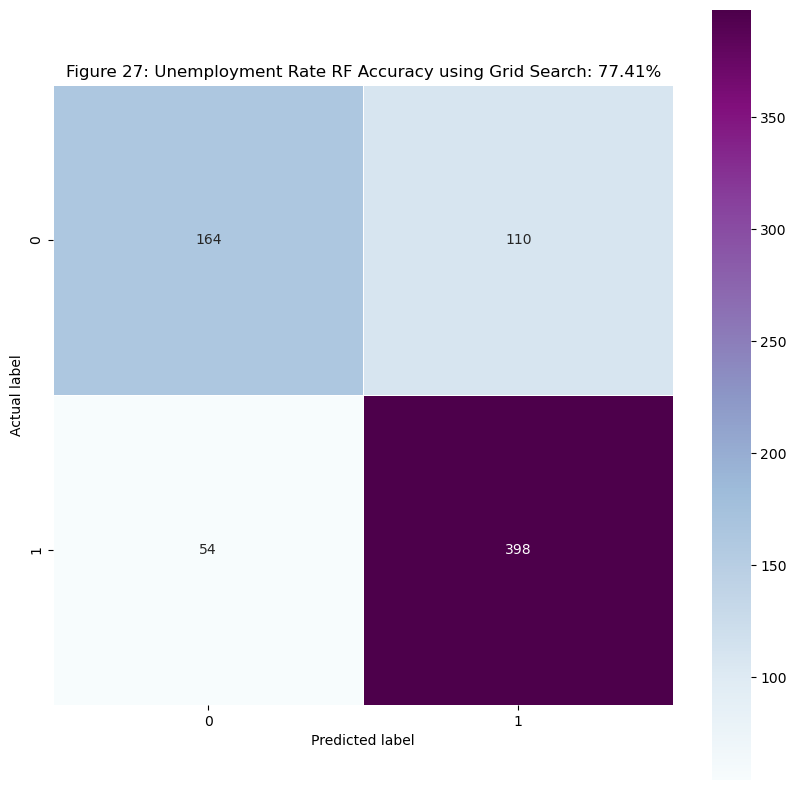

In [104]:
# GRID SEARCH parameters found by executing function in lecture materials then using some of the values above which yielded the following:

rf_grid_best = RandomForestClassifier(
    random_state=4,
    bootstrap=True,
    criterion="entropy",
    max_depth=15,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=500,
)
rf_grid_best.fit(X_train_rf_reduced, y_train_rf_reduced)
y_pred_unemployment_rate_rf3 = rf_grid_best.predict(X_test_rf_reduced)

# create a Parent Qualification heatmap with Random Forest Hyperparameter Tuning
create_confusion_matrix_visual(
    y_test_rf_reduced,
    y_pred_unemployment_rate_rf3,
    rf_grid_best,
    "Unemployment Rate RF Accuracy using Grid Search",
    X_test_rf_reduced,
    color="BuPu",
    figure="Figure 27: ",
)

# <span style="color:red">Highest model accuracy observed here (77.41%). Thus, we need to save the model for later prediction w/ the enrolled student data!</span>

In [105]:
# Save the model
import pickle

pickle.dump(rf_grid_best, open("rf_model", "wb"))

#### Q4 Highest Accuracy Random Forest Variable Set

In [106]:
q4_rf_accuracy = "77.41%"
q4_rf_title = "Unemployment Rate Random Forest model with accuracy " + q4_rf_accuracy
q4_rf_x_test = X_test_rf_reduced
q4_rf_y_test = y_test_rf_reduced
q4_rf_y_pred = y_pred_unemployment_rate_rf3
q4_rf = rf_grid_best
q4_rf_x = df_unemployment_rate_X_feature_importance
q4_rf_y = target_unemployment_rate

### Modeling for Q5: Father's Occupation

In [107]:
# Preparing the data for Question 5: Father's occupations

target_parent_occupations = df_parent_occupations_correlation["Target"]
df_parent_occupations_X = df_parent_occupations_correlation.copy()
df_parent_occupations_X = df_parent_occupations_X.drop("Target", axis=1)

X = df_parent_occupations_X
y = target_parent_occupations

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (2904, 16)
Testing split input-  (726, 16)


In [108]:
# Create the tree with default parameters
DT_parent_occupations = DecisionTreeClassifier()
DT_parent_occupations.fit(X_train, y_train)

# Run the predictions
y_pred_parent_occupations = DT_parent_occupations.predict(X_test)
print(
    "Classification report (Parent Occupations) - \n",
    classification_report(y_test, y_pred_parent_occupations),
)

Classification report (Parent Occupations) - 
               precision    recall  f1-score   support

           0       0.59      0.60      0.60       296
           2       0.72      0.71      0.72       430

    accuracy                           0.67       726
   macro avg       0.66      0.66      0.66       726
weighted avg       0.67      0.67      0.67       726



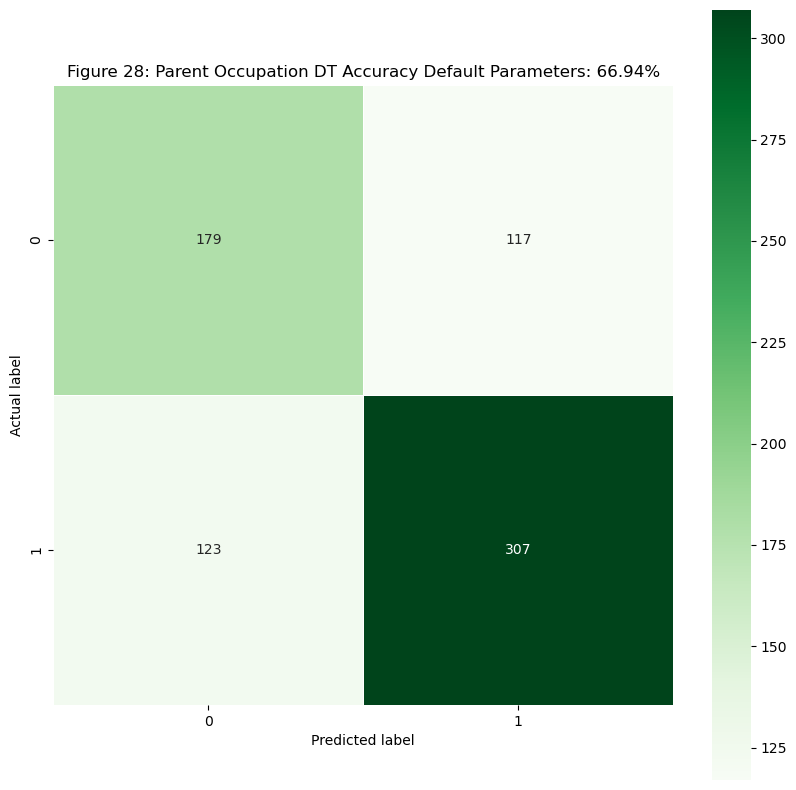

In [109]:
# create an Unemployment Rate heatmap with default Decision Tree parameters
create_confusion_matrix_visual(
    y_test,
    y_pred_parent_occupations,
    DT_parent_occupations,
    "Parent Occupation DT Accuracy Default Parameters",
    X_test,
    color="Greens",
    figure="Figure 28: ",
)

In [110]:
# Create a Random forest classifier based on lecture's from Week 5

rf_parent_occupations = RandomForestClassifier(random_state=5)
rf_parent_occupations.fit(X_train, y_train)
y_pred_parent_occupations_rf = rf_parent_occupations.predict(X_test)

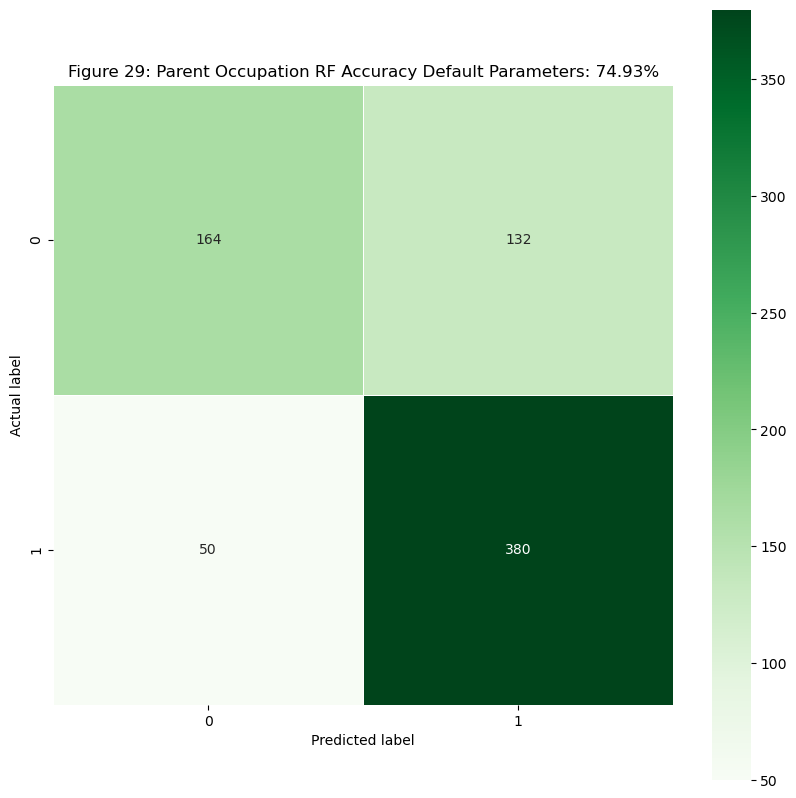

In [111]:
# create an Unemployment Rate heatmap with default Random Forest parameters
create_confusion_matrix_visual(
    y_test,
    y_pred_parent_occupations_rf,
    rf_parent_occupations,
    "Parent Occupation RF Accuracy Default Parameters",
    X_test,
    color="Greens",
    figure="Figure 29: ",
)

In [112]:
# tune the Parent Occupation decision tree using feature importance
feature_importances = display_feature_importance(DT_parent_occupations, X_train)
feature_importances

importance
Tuition_fees_up_to_date         0.205744
Admission_grade                 0.162130
Previous_qualification_grade    0.106830
Father's_occupation             0.093413
Application_mode                0.085306
Course                          0.084366
Mother's_qualification          0.075499
Father's_qualification          0.062887
Application_order               0.039879
Displaced                       0.026530
Previous_qualification          0.019634
Debtor                          0.015129
Marital_status                  0.009850
Daytime/evening_attendance      0.007104
Educational_special_needs       0.003131
Nationality                     0.002566

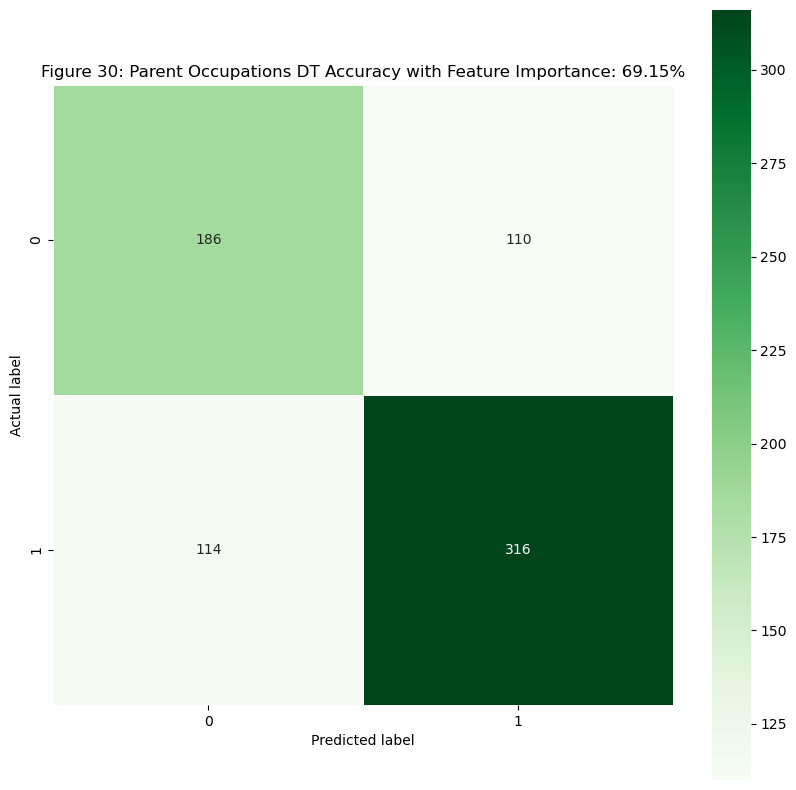

In [113]:
# Found the optimum colunns to keep using trial and error with the lowest importance values improve accuracy

df_dt_parent_occupations_X_feature_importance = df_parent_occupations_X.loc[
    :,
    df_parent_occupations_X.columns.drop(
        ["Educational_special_needs", "Daytime/evening_attendance", "Nationality"]
    ),
]
df_dt_parent_occupations_X_feature_importance

# get the reduced data based on feature importance for training and testing
X_dt_reduced = df_dt_parent_occupations_X_feature_importance
X_train_dt_reduced, X_test_dt_reduced, y_train_dt_reduced, y_test_dt_reduced = (
    train_test_split(X_dt_reduced, y, test_size=0.2, random_state=5)
)

# train the model
DT_parent_occupations.fit(X_train_dt_reduced, y_train_dt_reduced)
y_pred_parent_occupations_dt2 = DT_parent_occupations.predict(X_test_dt_reduced)

# create a Parent Occupations heatmap with Decision Tree Feature Importance parameters
create_confusion_matrix_visual(
    y_test_dt_reduced,
    y_pred_parent_occupations_dt2,
    DT_parent_occupations,
    "Parent Occupations DT Accuracy with Feature Importance",
    X_test_dt_reduced,
    color="Greens",
    figure="Figure 30: ",
)

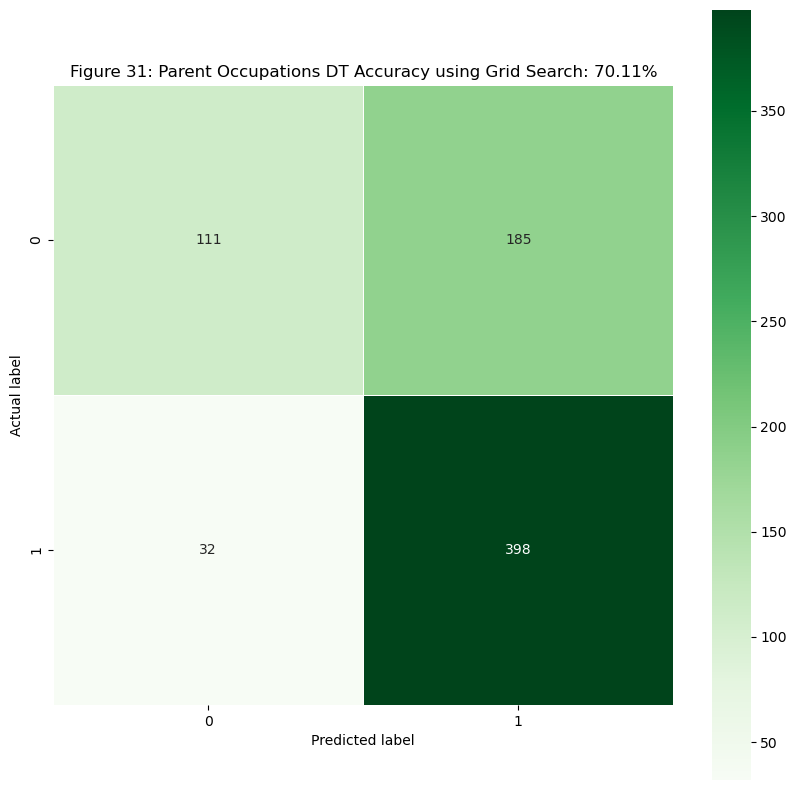

In [114]:
# Hyperparameter Tuning improved DT accuracy
# GRID SEARCH parameters found by executing function in lecture materials then using some of the values above which yielded the following:

dt_grid = DecisionTreeClassifier(
    random_state=5,
    criterion="gini",
    max_depth=4,
    max_features="sqrt",
    min_samples_leaf=5,
    min_samples_split=2,
)
dt_grid.fit(X_train_dt_reduced, y_train_dt_reduced)
y_pred_parent_occupations_dt3 = dt_grid.predict(X_test_dt_reduced)

# create a Marital Status heatmap with Decision Tree Hyperparameter Tuning
create_confusion_matrix_visual(
    y_test_dt_reduced,
    y_pred_parent_occupations_dt3,
    dt_grid,
    "Parent Occupations DT Accuracy using Grid Search",
    X_test_dt_reduced,
    color="Greens",
    figure="Figure 31: ",
)

#### Q5 Highest Accuracy Decision Tree Variable Set

In [115]:
# q5_dt_x_train = X_train_dt_reduced
# q5_dt_y_train = y_train_dt_reduced
q5_dt_accuracy = "70.11%"
q5_dt_title = "Parent Occupation Decision Tree model with accuracy " + q5_dt_accuracy
q5_dt_x_test = X_test_dt_reduced
q5_dt_y_test = y_test_dt_reduced
q5_dt_y_pred = y_pred_parent_occupations_dt3
q5_dt = dt_grid
q5_dt_x = df_dt_parent_occupations_X_feature_importance
q5_dt_y = target_parent_occupations

In [116]:
# Tune Parent Occupations random forest using feature importance
feature_importances = display_feature_importance(rf_parent_occupations, X_train)
feature_importances

importance
Admission_grade                 0.150623
Tuition_fees_up_to_date         0.150224
Previous_qualification_grade    0.124280
Course                          0.112179
Father's_occupation             0.094872
Application_mode                0.081264
Mother's_qualification          0.064513
Father's_qualification          0.060978
Debtor                          0.040186
Application_order               0.036803
Previous_qualification          0.025732
Displaced                       0.021901
Marital_status                  0.017403
Daytime/evening_attendance      0.009730
Nationality                     0.006177
Educational_special_needs       0.003133

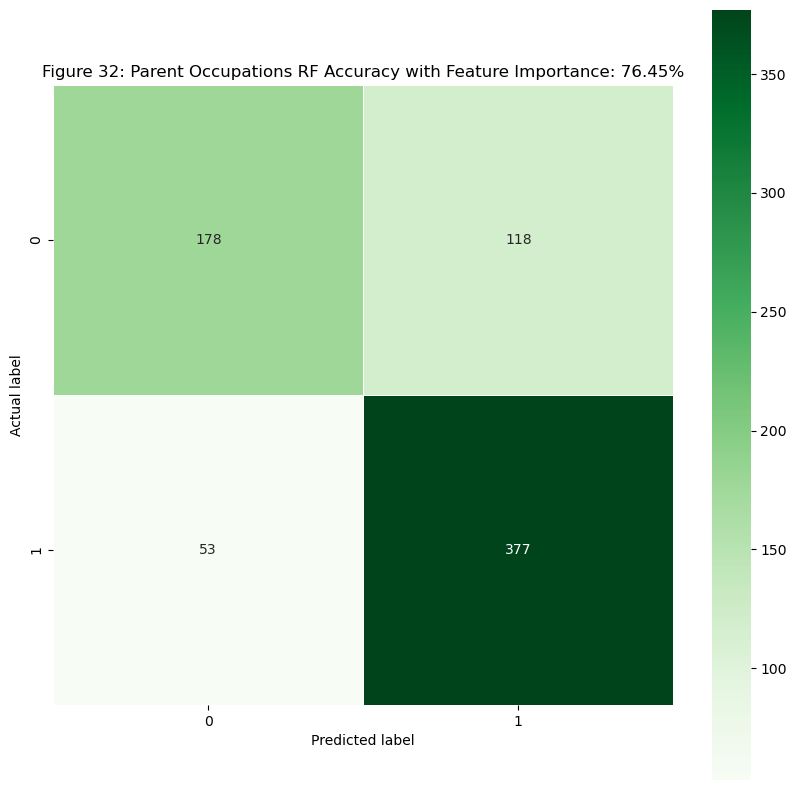

In [117]:
# Found the optimum colunns to keep using trial and error with the lowest importance values improve accuracy

df_parent_occupations_X_feature_importance = df_parent_occupations_X.loc[
    :, df_parent_occupations_X.columns.drop(["Daytime/evening_attendance"])
]
df_parent_occupations_X_feature_importance

# get the reduced data based on feature importance for training and testing
X_rf_reduced = df_parent_occupations_X_feature_importance
X_train_rf_reduced, X_test_rf_reduced, y_train_rf_reduced, y_test_rf_reduced = (
    train_test_split(X_rf_reduced, y, test_size=0.2, random_state=5)
)

# train the model
rf_parent_occupations.fit(X_train_rf_reduced, y_train_rf_reduced)
y_pred_parent_occupations_rf2 = rf_parent_occupations.predict(X_test_rf_reduced)

# create an Parent Occupations heatmap with Random Forest Feature Importance parameters
create_confusion_matrix_visual(
    y_test_rf_reduced,
    y_pred_parent_occupations_rf2,
    rf_parent_occupations,
    "Parent Occupations RF Accuracy with Feature Importance",
    X_test_rf_reduced,
    color="Greens",
    figure="Figure 32: ",
)

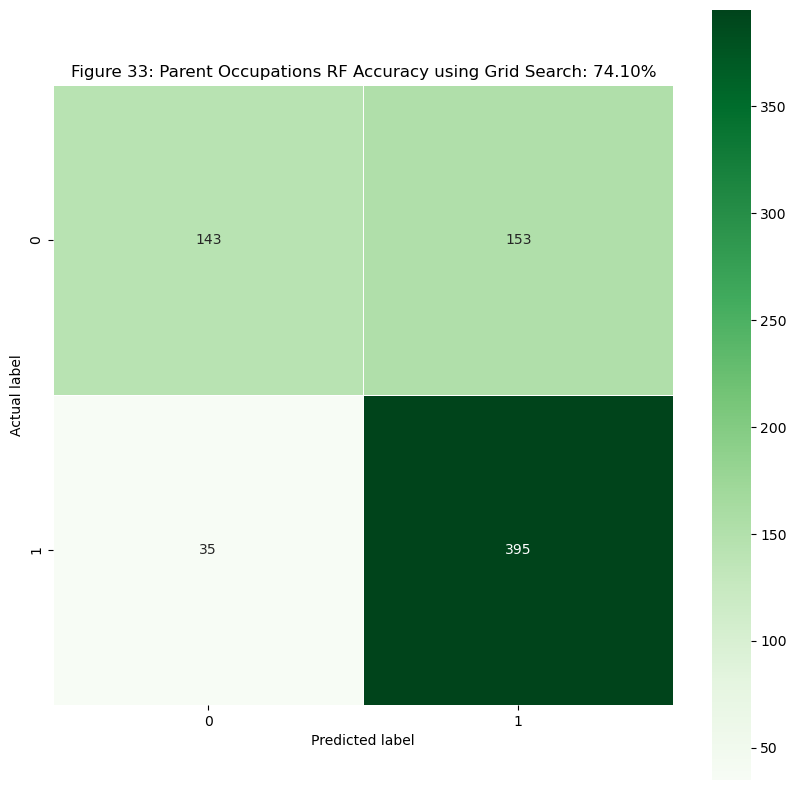

In [118]:
# GRID SEARCH parameters found by executing function in lecture materials then using some of the values above which yielded the following:

rf_grid = RandomForestClassifier(
    random_state=5,
    bootstrap=True,
    criterion="entropy",
    max_depth=10,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=500,
)
rf_grid.fit(X_train_rf_reduced, y_train_rf_reduced)
y_pred_parent_occupations_rf3 = rf_grid.predict(X_test_rf_reduced)

# create a Parent Qualification heatmap with Random Forest Hyperparameter Tuning
create_confusion_matrix_visual(
    y_test_rf_reduced,
    y_pred_parent_occupations_rf3,
    rf_grid,
    "Parent Occupations RF Accuracy using Grid Search",
    X_test_rf_reduced,
    color="Greens",
    figure="Figure 33: ",
)

#### Q5 Highest Accuracy Random Forest Variable Set

In [119]:
q5_rf_accuracy = "76.45%"
q5_rf_title = "Parent Occupations Random Forest model with accuracy " + q5_rf_accuracy
q5_rf_x_test = X_test_rf_reduced
q5_rf_y_test = y_test_rf_reduced
q5_rf_y_pred = y_pred_parent_occupations_rf3
q5_rf = rf_grid
q5_rf_x = df_parent_occupations_X_feature_importance
q5_rf_y = target_parent_occupations

## Step 5: Evaluate The Model Performance

+ Each of the Decision Tree and Random Forest model classifiers for the 5 Questions which yielded the highest accuracy will be run again using K-Fold cross validation 
    + The Decision Trees will use 20 fold values (can be customized very easily by changing the calls to the function)
    + The Random Forests wiil use 10 fold values (can be customized very easily by changing the calls to the function)
    + Some of the code in this section was taken and modified from the class lectures
+ The parameters needed for each K-Fold cross validation were defined and used in Step 4 of this notebook
+ The expectation is that the K-fold
    + mean accuracy will be within 1 standard deviation from the models' maximum accuracy values in Step 4 
    + standard deviation will be low indicating low variability due to having completed the recommended Data Cleaning and EDA steps

### Function that runs the K-Fold Algorithm against the models with the highest accuracy

In [120]:
# Taken from lecture material and modified for the project:

# https://www.kaggle.com/cesartrevisan/scikit-learn-and-gridsearchcv

from sklearn.model_selection import KFold


def run_kfold(model, split_val, X, y, description, figure):
    """
    Required Parameters:

    model: machine learning model for k fold cross validation
    split_val: number of splits
    X: X values from the model
    y: y values from the model
    description: Describes the tuned model before K-Fold cross validation

    Optional Parameters:
    figure: Text to label figure number in notebook
    Returns:
    None"""

    print(figure + "Running k-fold against tuned " + description + "\n")
    kf = KFold(n_splits=split_val)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("\tFold {0} accuracy: {1}".format(fold, accuracy))
    mean_outcome = np.mean(outcomes)
    print("\tMean Accuracy: {0:.2f}".format((mean_outcome) * 100) + "%")
    std_outcome = np.std(outcomes)
    print("\tStd Accuracy: {0:.2f}".format((std_outcome) * 100) + "%")
    # print("\tMaximum Accuracy(Mean + Std): {0:.2f}".format((mean_outcome+std_outcome)*100) +'%')

### Q1: Marital Status

In [121]:
run_kfold(q1_dt, 20, q1_dt_x, q1_dt_y, q1_dt_title, figure="Figure 34: ")

Figure 34: Running k-fold against tuned Martial Status Decision Tree model with accuracy 74.24%

	Fold 1 accuracy: 0.6923076923076923
	Fold 2 accuracy: 0.7692307692307693
	Fold 3 accuracy: 0.7362637362637363
	Fold 4 accuracy: 0.6978021978021978
	Fold 5 accuracy: 0.6813186813186813
	Fold 6 accuracy: 0.7142857142857143
	Fold 7 accuracy: 0.6813186813186813
	Fold 8 accuracy: 0.7032967032967034
	Fold 9 accuracy: 0.7307692307692307
	Fold 10 accuracy: 0.7802197802197802
	Fold 11 accuracy: 0.580110497237569
	Fold 12 accuracy: 0.6740331491712708
	Fold 13 accuracy: 0.7016574585635359
	Fold 14 accuracy: 0.6850828729281768
	Fold 15 accuracy: 0.6850828729281768
	Fold 16 accuracy: 0.6298342541436464
	Fold 17 accuracy: 0.6906077348066298
	Fold 18 accuracy: 0.6850828729281768
	Fold 19 accuracy: 0.7237569060773481
	Fold 20 accuracy: 0.6961325966850829
	Mean Accuracy: 69.69%
	Std Accuracy: 4.22%


In [122]:
run_kfold(q1_rf, 10, q1_rf_x, q1_rf_y, q1_rf_title, figure="Figure 35: ")

Figure 35: Running k-fold against tuned Marital Status Random Forest model with accuracy 77.13%

	Fold 1 accuracy: 0.7713498622589532
	Fold 2 accuracy: 0.7851239669421488
	Fold 3 accuracy: 0.7741046831955923
	Fold 4 accuracy: 0.7768595041322314
	Fold 5 accuracy: 0.7851239669421488
	Fold 6 accuracy: 0.7052341597796143
	Fold 7 accuracy: 0.7520661157024794
	Fold 8 accuracy: 0.7465564738292011
	Fold 9 accuracy: 0.7355371900826446
	Fold 10 accuracy: 0.7548209366391184
	Mean Accuracy: 75.87%
	Std Accuracy: 2.39%


### Q2: International

In [123]:
run_kfold(q2_dt, 20, q2_dt_x, q2_dt_y, q2_dt_title, figure="Figure 36: ")

Figure 36: Running k-fold against tuned International Student Decision Tree model with accuracy 72.87%

	Fold 1 accuracy: 0.7142857142857143
	Fold 2 accuracy: 0.7802197802197802
	Fold 3 accuracy: 0.7582417582417582
	Fold 4 accuracy: 0.7637362637362637
	Fold 5 accuracy: 0.7582417582417582
	Fold 6 accuracy: 0.7802197802197802
	Fold 7 accuracy: 0.7527472527472527
	Fold 8 accuracy: 0.7362637362637363
	Fold 9 accuracy: 0.7527472527472527
	Fold 10 accuracy: 0.8021978021978022
	Fold 11 accuracy: 0.6574585635359116
	Fold 12 accuracy: 0.712707182320442
	Fold 13 accuracy: 0.712707182320442
	Fold 14 accuracy: 0.7182320441988951
	Fold 15 accuracy: 0.7403314917127072
	Fold 16 accuracy: 0.7016574585635359
	Fold 17 accuracy: 0.6850828729281768
	Fold 18 accuracy: 0.7348066298342542
	Fold 19 accuracy: 0.7458563535911602
	Fold 20 accuracy: 0.7292817679558011
	Mean Accuracy: 73.69%
	Std Accuracy: 3.36%


In [124]:
run_kfold(q2_rf, 10, q2_rf_x, q2_rf_y, q2_rf_title, figure="Figure 37: ")

Figure 37: Running k-fold against tuned International Student Random Forest model with accuracy 76.58%

	Fold 1 accuracy: 0.7630853994490359
	Fold 2 accuracy: 0.7768595041322314
	Fold 3 accuracy: 0.790633608815427
	Fold 4 accuracy: 0.7823691460055097
	Fold 5 accuracy: 0.7961432506887053
	Fold 6 accuracy: 0.71900826446281
	Fold 7 accuracy: 0.7410468319559229
	Fold 8 accuracy: 0.7465564738292011
	Fold 9 accuracy: 0.743801652892562
	Fold 10 accuracy: 0.7548209366391184
	Mean Accuracy: 76.14%
	Std Accuracy: 2.35%


### Q3: Parent Qualifications

In [125]:
run_kfold(q3_dt, 20, q3_dt_x, q3_dt_y, q3_dt_title, figure="Figure 38: ")

Figure 38: Running k-fold against tuned Parent Qualification Decision Tree model with accuracy 72.45%

	Fold 1 accuracy: 0.6923076923076923
	Fold 2 accuracy: 0.8186813186813187
	Fold 3 accuracy: 0.7417582417582418
	Fold 4 accuracy: 0.7472527472527473
	Fold 5 accuracy: 0.7637362637362637
	Fold 6 accuracy: 0.7692307692307693
	Fold 7 accuracy: 0.7637362637362637
	Fold 8 accuracy: 0.7362637362637363
	Fold 9 accuracy: 0.7417582417582418
	Fold 10 accuracy: 0.7967032967032966
	Fold 11 accuracy: 0.6298342541436464
	Fold 12 accuracy: 0.6906077348066298
	Fold 13 accuracy: 0.7679558011049724
	Fold 14 accuracy: 0.6961325966850829
	Fold 15 accuracy: 0.7292817679558011
	Fold 16 accuracy: 0.6906077348066298
	Fold 17 accuracy: 0.6519337016574586
	Fold 18 accuracy: 0.7292817679558011
	Fold 19 accuracy: 0.7292817679558011
	Fold 20 accuracy: 0.7182320441988951
	Mean Accuracy: 73.02%
	Std Accuracy: 4.48%


In [126]:
run_kfold(q3_rf, 10, q3_rf_x, q3_rf_y, q3_rf_title, figure="Figure 39: ")

Figure 39: Running k-fold against tuned Parent Qualification Random Forest model with accuracy 76.31%

	Fold 1 accuracy: 0.7823691460055097
	Fold 2 accuracy: 0.7823691460055097
	Fold 3 accuracy: 0.7961432506887053
	Fold 4 accuracy: 0.768595041322314
	Fold 5 accuracy: 0.7988980716253443
	Fold 6 accuracy: 0.71900826446281
	Fold 7 accuracy: 0.7493112947658402
	Fold 8 accuracy: 0.7603305785123967
	Fold 9 accuracy: 0.7382920110192838
	Fold 10 accuracy: 0.7548209366391184
	Mean Accuracy: 76.50%
	Std Accuracy: 2.44%


### Q4: Unemployment Rate

In [127]:
run_kfold(q4_dt, 20, q4_dt_x, q4_dt_y, q4_dt_title, figure="Figure 40: ")

Figure 40: Running k-fold against tuned Unemployment Rate Decision Tree model with accuracy 74.79%

	Fold 1 accuracy: 0.7032967032967034
	Fold 2 accuracy: 0.8076923076923077
	Fold 3 accuracy: 0.7527472527472527
	Fold 4 accuracy: 0.7307692307692307
	Fold 5 accuracy: 0.7362637362637363
	Fold 6 accuracy: 0.8076923076923077
	Fold 7 accuracy: 0.7307692307692307
	Fold 8 accuracy: 0.7747252747252747
	Fold 9 accuracy: 0.7472527472527473
	Fold 10 accuracy: 0.8241758241758241
	Fold 11 accuracy: 0.6298342541436464
	Fold 12 accuracy: 0.7071823204419889
	Fold 13 accuracy: 0.7458563535911602
	Fold 14 accuracy: 0.6961325966850829
	Fold 15 accuracy: 0.7292817679558011
	Fold 16 accuracy: 0.6740331491712708
	Fold 17 accuracy: 0.6685082872928176
	Fold 18 accuracy: 0.7513812154696132
	Fold 19 accuracy: 0.7790055248618785
	Fold 20 accuracy: 0.7458563535911602
	Mean Accuracy: 73.71%
	Std Accuracy: 4.77%


In [128]:
run_kfold(q4_rf, 10, q4_rf_x, q4_rf_y, q4_rf_title, figure="Figure 41: ")

Figure 41: Running k-fold against tuned Unemployment Rate Random Forest model with accuracy 77.41%

	Fold 1 accuracy: 0.7768595041322314
	Fold 2 accuracy: 0.7851239669421488
	Fold 3 accuracy: 0.7878787878787878
	Fold 4 accuracy: 0.7713498622589532
	Fold 5 accuracy: 0.790633608815427
	Fold 6 accuracy: 0.7162534435261708
	Fold 7 accuracy: 0.7493112947658402
	Fold 8 accuracy: 0.7465564738292011
	Fold 9 accuracy: 0.7493112947658402
	Fold 10 accuracy: 0.7575757575757576
	Mean Accuracy: 76.31%
	Std Accuracy: 2.23%


### Q5: Parent Occupations

In [129]:
run_kfold(q5_dt, 20, q5_dt_x, q5_dt_y, q5_dt_title, figure="Figure 42: ")

Figure 42: Running k-fold against tuned Parent Occupation Decision Tree model with accuracy 70.11%

	Fold 1 accuracy: 0.6373626373626373
	Fold 2 accuracy: 0.7527472527472527
	Fold 3 accuracy: 0.6813186813186813
	Fold 4 accuracy: 0.7362637362637363
	Fold 5 accuracy: 0.7032967032967034
	Fold 6 accuracy: 0.7527472527472527
	Fold 7 accuracy: 0.7032967032967034
	Fold 8 accuracy: 0.7252747252747253
	Fold 9 accuracy: 0.7142857142857143
	Fold 10 accuracy: 0.7582417582417582
	Fold 11 accuracy: 0.569060773480663
	Fold 12 accuracy: 0.6850828729281768
	Fold 13 accuracy: 0.6519337016574586
	Fold 14 accuracy: 0.6850828729281768
	Fold 15 accuracy: 0.7016574585635359
	Fold 16 accuracy: 0.5911602209944752
	Fold 17 accuracy: 0.6519337016574586
	Fold 18 accuracy: 0.6353591160220995
	Fold 19 accuracy: 0.7292817679558011
	Fold 20 accuracy: 0.6961325966850829
	Mean Accuracy: 68.81%
	Std Accuracy: 5.08%


In [130]:
run_kfold(q5_rf, 10, q5_rf_x, q5_rf_y, q5_rf_title, figure="Figure 43: ")

Figure 43: Running k-fold against tuned Parent Occupations Random Forest model with accuracy 76.45%

	Fold 1 accuracy: 0.7851239669421488
	Fold 2 accuracy: 0.7713498622589532
	Fold 3 accuracy: 0.790633608815427
	Fold 4 accuracy: 0.7658402203856749
	Fold 5 accuracy: 0.790633608815427
	Fold 6 accuracy: 0.7134986225895317
	Fold 7 accuracy: 0.7465564738292011
	Fold 8 accuracy: 0.7355371900826446
	Fold 9 accuracy: 0.7493112947658402
	Fold 10 accuracy: 0.7630853994490359
	Mean Accuracy: 76.12%
	Std Accuracy: 2.39%


## Step 6: Describe And Interpret The Model

In [131]:
# Inference summary and conclusion
"""
Write a summary of what you’ve learned from the analysis
Include interesting insights and graphs from previous sections
Share ideas for future work 
Share the links to resources used
"""

'\nWrite a summary of what you’ve learned from the analysis\nInclude interesting insights and graphs from previous sections\nShare ideas for future work \nShare the links to resources used\n'

## Summary

### Model Comparisons/Insights:

1. For the decision tree models, the general trend was that, in terms of model accuracy, GridSearch > Feature Importance > default parameters. This was true in all cases, as indicated by the positive slopes of each decision tree trendline, except for the marital_stats model. In this singular case, Feature Importance produced the lowest accuracy, however the GridSearch function still produced the highest overall accuracy.

2. Similarily, the Random Forest models had the same general trend. However, in the singular case of the Father's Occupation model, it can be seen that GridSearch returned the lowest accuracy.

3. In all 30 models we produced 3 Decision Trees and 3 Random Forests for each of the 5 hypothesized variables (3_dts + 3_rfs) x 5_variables = 30_models. 90% of the time, the GridSearch models returned the highest model accuracy.

4. In 15/15 cases, the RF models outperformed the DT models, with an average model accuracy increase of 6.57%
5. Early on, the decision to remove the "enrolled" students from the dataset also significantly reduced noise in the data and improved all model accuracies by >10%
6. Working with smaller datasets afeter applying eigenvalues and retaining only high-value coefficients reduced multicollinearity

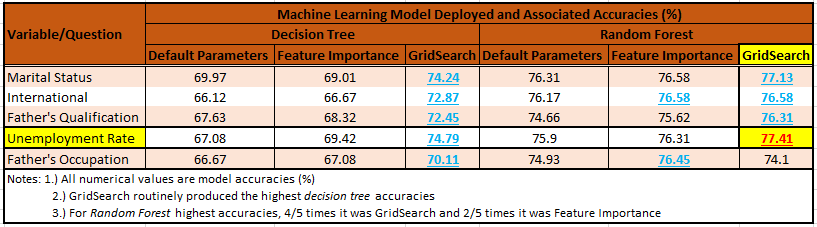

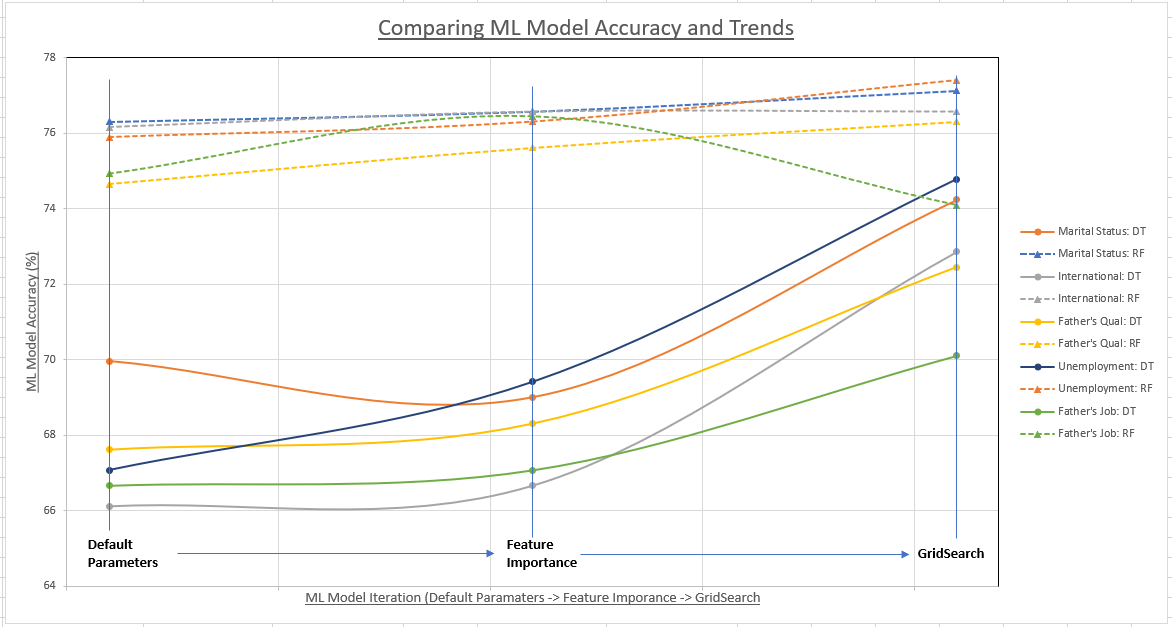

### Enrolled Student Predictions

In [132]:
# Display enrolled student DataFrame
df_enrolled

Marital_status  Application_mode  Application_order  Course  \
16                 1                18                  1    9238   
19                 1                 1                  1    9853   
21                 1                18                  4    9556   
25                 1                 1                  1    9238   
27                 1                 1                  1    9085   
...              ...               ...                ...     ...   
4397               1                 5                  4    9853   
4402               1                18                  2    9853   
4406               1                 1                  1    9070   
4412               1                43                  1    9070   
4413               1                43                  1      33   

      Daytime/evening_attendance  Previous_qualification  \
16                             1                       1   
19                             1                       1   
21                             1                       1   
25                             1                       1   
27                             1                       1   
...                          ...                     ...   
4397                           1                       1   
4402                           1                       1   
4406                           1                       1   
4412                           1                       1   
4413                           1                       1   

      Previous_qualification_grade  Nationality  Mother's_qualification  \
16                           137.0            1                      19   
19                           140.0            1                      19   
21                           127.0            1                       1   
25                           151.0            1                      19   
27                           138.0            1                      19   
...                            ...          ...                     ...   
4397                         116.0            1                       3   
4402                         168.0            1                       1   
4406                         145.0            1                       1   
4412                         125.0            1                      19   
4413                         143.0            1                      37   

      Father's_qualification  ...  Curricular_units_2nd_sem_credited  \
16                        38  ...                                  0   
19                        19  ...                                  0   
21                        38  ...                                  0   
25                        38  ...                                  0   
27                        19  ...                                  0   
...                      ...  ...                                ...   
4397                      38  ...                                  0   
4402                      19  ...                                  0   
4406                      38  ...                                  0   
4412                      19  ...                                  2   
4413                       1  ...                                  2   

      Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  \
16                                    6                                    14   
19                                    7                                     8   
21                                    8                                     9   
25                                    6                                    12   
27                                    5                                     7   
...                                 ...                                   ...   
4397                                  6                                     9   
4402                                  6   

#### Note: We have trained the rf models on the data where we positively knew the target outcome (student graduate/dropout, therefore success/failure). We now need to deploy our highest accuracy model to predict the target outcome for the enrolled student dataset.

### Recall that we saved the best model using pickle.dump() above. Here, we will load this model:

In [133]:
# Load previously saved rf model
rf_loaded = pickle.load(open("rf_model", "rb"))

In [134]:
# Need to modify shape of df_enrolled to match the shape of the rf model data (i.e. get the same columns)

# Get the same columns as the training data set and store in a list
titles = list(q4_rf_x_test.columns.values)

# Transform df_enrolled to match shape of rf model training/test data
df_enrolled_X_test = df_enrolled[titles]

# For uniformity, save df into X_test variable to pass into rf model for prediction
X_test = df_enrolled_X_test

# Use our best rf model to predict outcomes for enrolled students!
y_pred_enrolled = rf_loaded.predict(X_test)

### Final step: Analyze Results

In [135]:
# Get unique values and counts of results, store in a dictionary
unique, counts = np.unique(y_pred_enrolled, return_counts=True)
prediction_results_dict = dict(zip(unique, counts))

# Print results
print(
    f"Final prediction results of the model:\nOf the {counts.sum()} currently enrolled students, {prediction_results_dict[0]} will Dropout and {prediction_results_dict[2]} will Graduate"
)

Final prediction results of the model:
Of the 794 currently enrolled students, 183 will Dropout and 611 will Graduate


<div class = 'alert alert-block alert-success'>
<b>FOR THE ENROLLED STUDENTS, WE ARE PREDICTING THAT 76.95% WILL GRADUATE IN THE FUTURE (611 out of 794), AND 23.05% WILL DROPOUT (183 out of 794).</b>
</div>